In [303]:
from IPython import display
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import ast
import glob
import os
import sacredfig
sacredfig.style['mathtext.sf']='sans:italic'
import numpy as np
import seaborn as sns
from scipy import stats
import squarify
import plotly.graph_objects as go

import numpy as np
import statsmodels.api as sm

In [304]:
plt.style.use(sacredfig.style)

In [305]:
import warnings
warnings.filterwarnings('ignore')

In [306]:
def get_figsize(columnwidth = 426.79135, wf=0.5, hf=(5.**0.5-1.0)/2.0, ):
    fig_width_pt = columnwidth*wf 
    inches_per_pt = 1.0/72.27               # Convert pt to inch
    fig_width = fig_width_pt*inches_per_pt  # width in inches
    fig_height = fig_width*hf      # height in inches
    return [fig_width, fig_height]

In [307]:
get_figsize()

[2.95275598450256, 1.8249035589072402]

In [632]:
# bright version:
algorithm_colours = {'Random': '#1b9e77', 'Elo': '#d95f02', 'Euclidean': '#7570b3'}
# more muted version: (both color brewer)
algorithm_colours = {'Random': '#66c2a5', 'Elo': '#fc8d62', 'Euclidean': '#8da0cb'}






### Loading in filtered and structured dataframes from experiment
(See creating_data_structures.ipynb for info on how structure was created from empirica export)

In [309]:
combined_path = '/Users/franziskahafner/Desktop/oii/trinity/thesis/experiment_data/prolific_data/combined_experiment_data/'
character_df = pd.read_csv(combined_path + "character_df.csv")
player_df = pd.read_csv(combined_path + "player_df.csv")
characterChoiceSurvey_df = pd.read_csv(combined_path + "characterChoiceSurvey_df.csv")
SwipeDecision_df = pd.read_csv(combined_path + "SwipeDecision_df.csv")
endRecSystemSurvey_df = pd.read_csv(combined_path + "endRecSystemSurvey_df.csv")
endDatingAppSurvey_df = pd.read_csv(combined_path + "endDatingAppSurvey_df.csv")
SwipeProfileRecSystemSurvey_df = pd.read_csv(combined_path + "SwipeProfileRecSystemSurvey_df.csv")
SwipeProfileProfileChoiceSurvey_df = pd.read_csv(combined_path + "SwipeProfileProfileChoiceSurvey_df.csv")
SwipeProfileRecSystemSurvey_df = SwipeProfileRecSystemSurvey_df.merge(SwipeDecision_df[['id', 'roundsPlayed']], on = 'id', how = 'left')

In [310]:
# test_participantIdentifier = ['60bd67598f9ff4818f8f8444',
# '660b46f30e0078173c658320',
# '5f0f2ff0762218000970c967',
# '61015f63f9a351d3171a0f98',
# '6658b182bb57e6360147f2f5']

# player_df.loc[player_df['participantIdentifier'].isin(test_player_ids), 'recAlgorithm'] = 'test'

In [311]:
player_df[player_df['recAlgorithm']=='test']

Empty DataFrame
Columns: [id, chosenProfile, playerID, participantIdentifier, recAlgorithm, ended, feedback, Status, Started at, Completed at, Time taken, Dating apps, Gender, Age, Sex, Ethnicity simplified, Country of birth, Country of residence, Nationality, Language, Student status, Employment status]
Index: []

[0 rows x 22 columns]

In [312]:
elo_ranking_df = pd.read_csv('/Users/franziskahafner/Desktop/oii/trinity/thesis/dating-app-experiment-analysis/elo_ranking_df.csv')


In [313]:
preferences_mean_df = pd.read_csv('/Users/franziskahafner/Desktop/oii/trinity/thesis/dating-app-experiment-analysis/preferences_data/preferences_mean_df.csv')
preferences_variance_df = pd.read_csv('/Users/franziskahafner/Desktop/oii/trinity/thesis/dating-app-experiment-analysis/preferences_data/preferences_variance_df.csv')
preferences_n_df = pd.read_csv('/Users/franziskahafner/Desktop/oii/trinity/thesis/dating-app-experiment-analysis/preferences_data/preferences_n_df.csv')

In [314]:
character_df_encoded = pd.read_csv('/Users/franziskahafner/Desktop/oii/trinity/thesis/dating-app-experiment-analysis/preferences_data/character_df_encoded.csv')

In [315]:
player_df['Country of residence'].value_counts()

United States     150
United Kingdom    150
Name: Country of residence, dtype: int64

In [316]:
player_df['Gender'].value_counts()

Man (including Trans Male/Trans Man)           120
Woman (including Trans Female/Trans Woman)     120
Non-binary (would like to give more detail)     60
Name: Gender, dtype: int64

In [317]:
len(player_df['chosenProfile'].value_counts())

131

### ER-Diagram with all Data Frame names, columns, and relationships

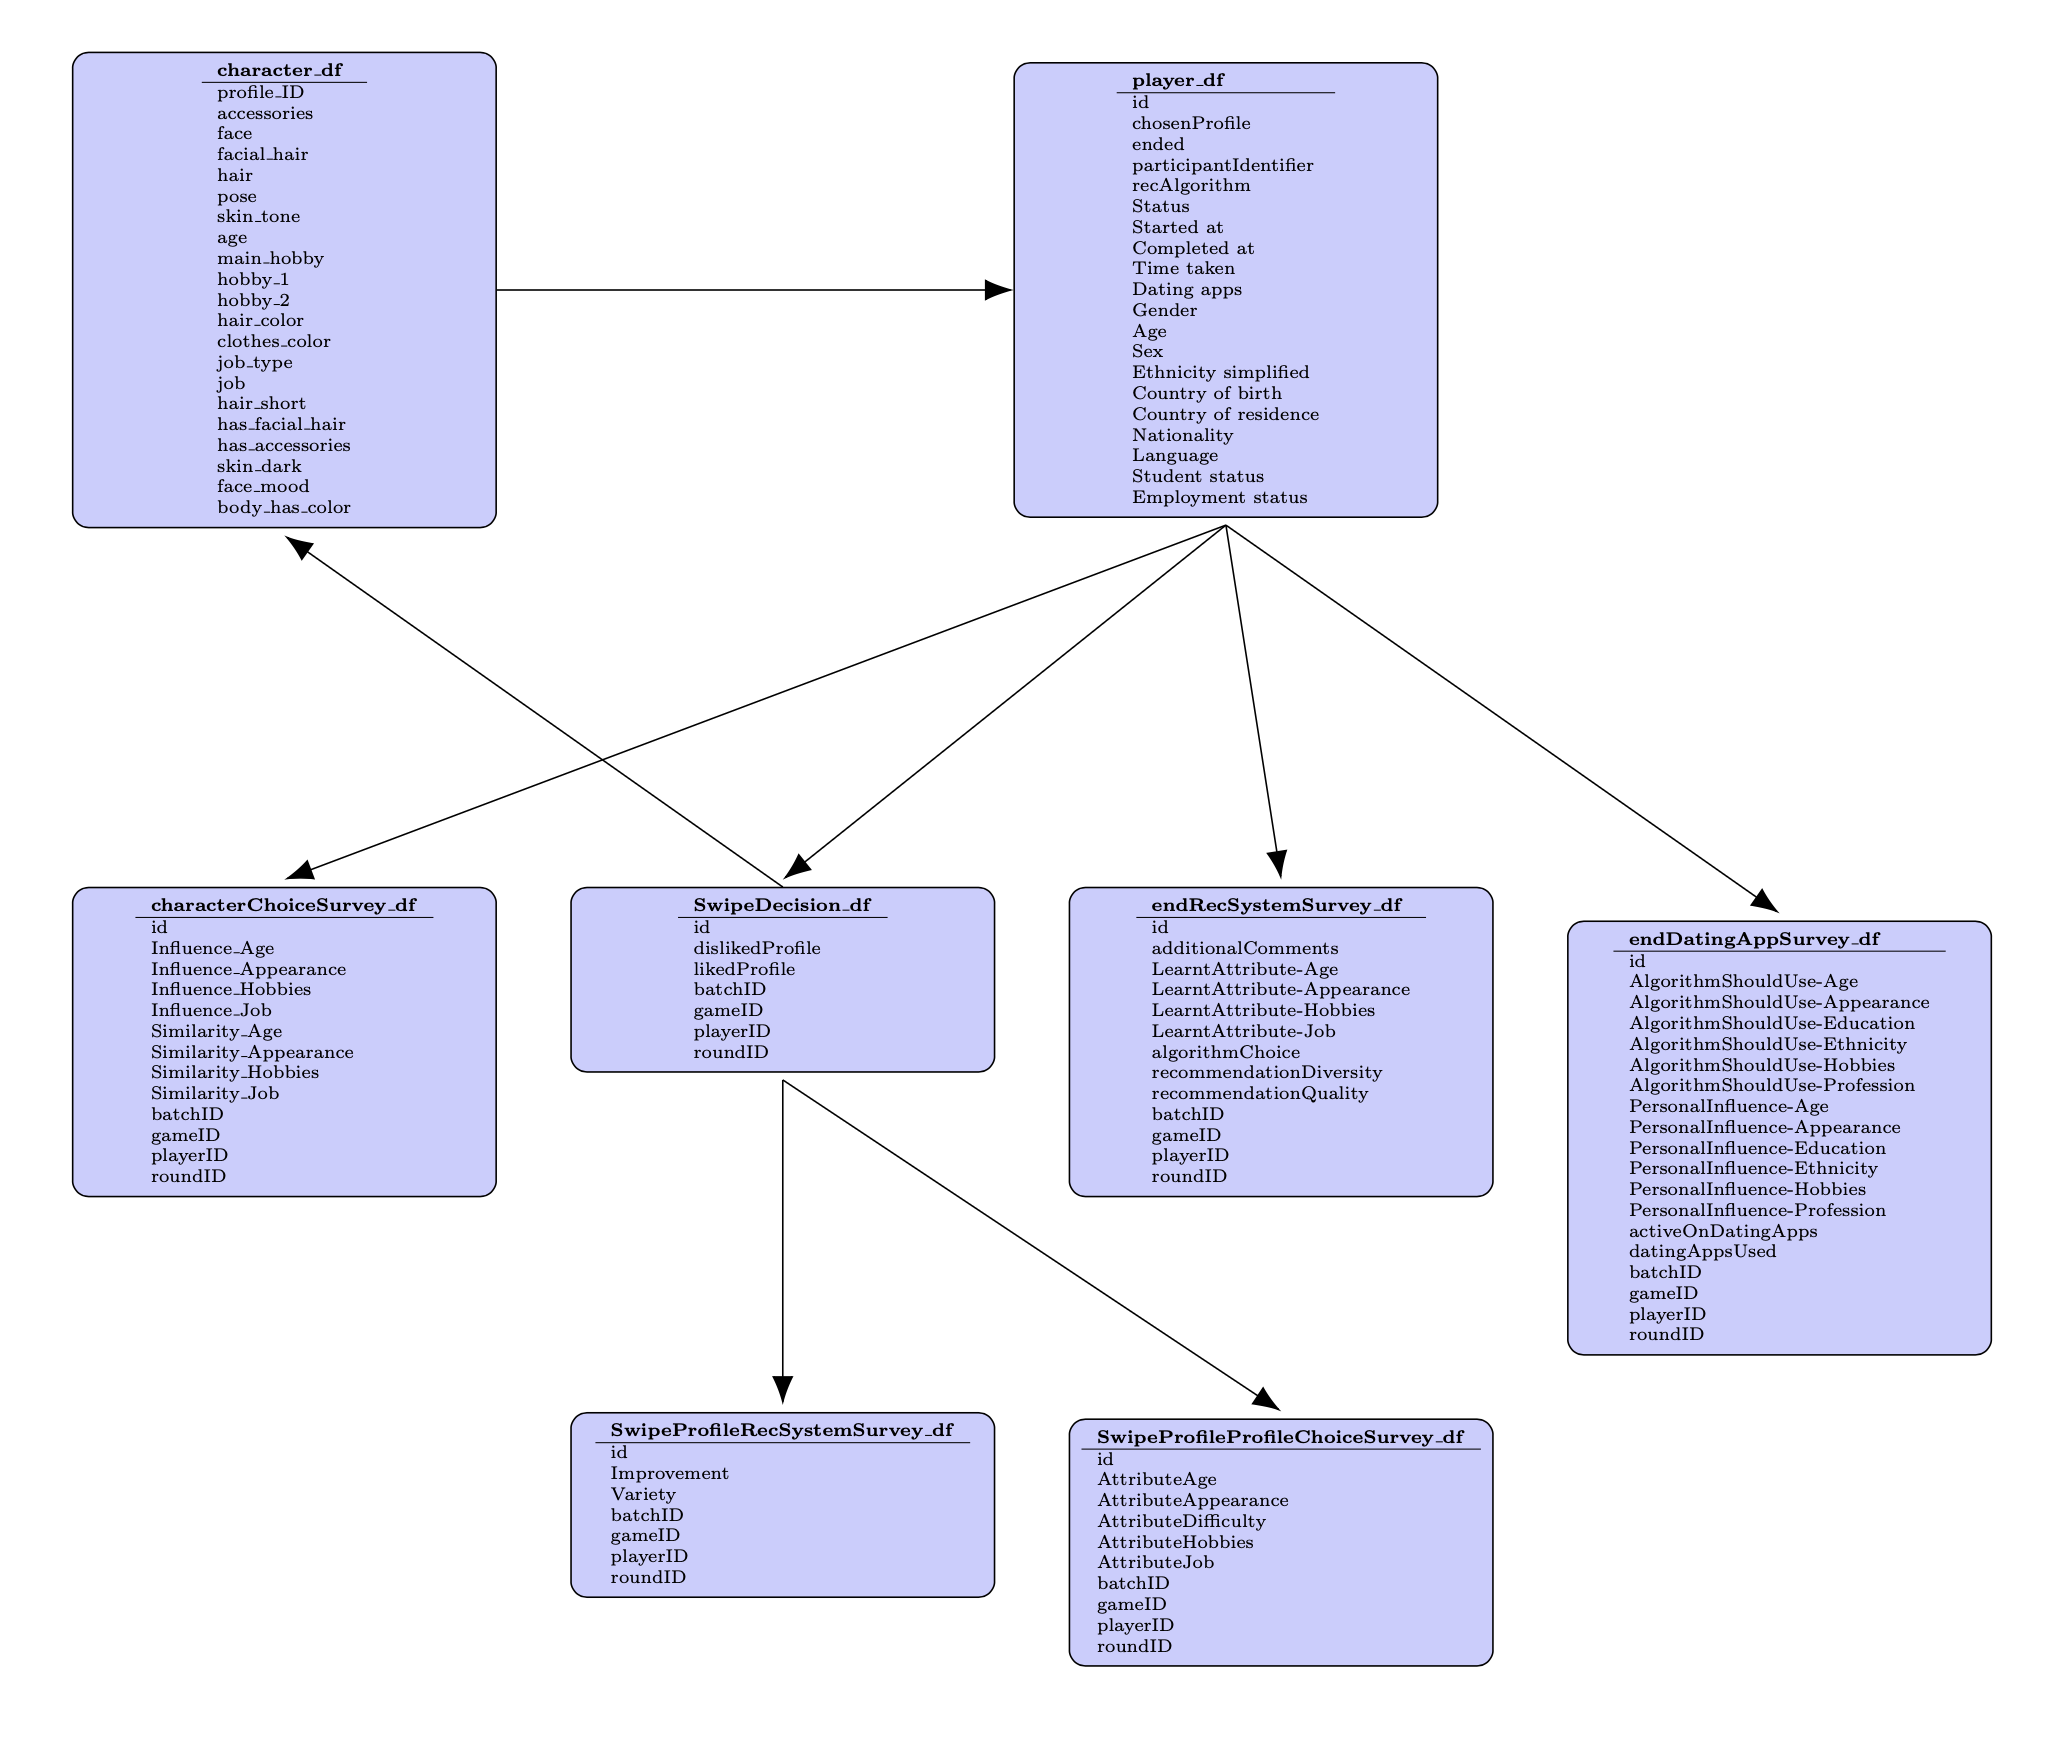

In [318]:
display.Image("ER_Diagram.png")

In [319]:
player_df['recAlgorithm'] = player_df['recAlgorithm'].str.capitalize()

In [320]:
SwipeDecision_df[SwipeDecision_df['strongPreferenceDetected']==True]

id  roundsPlayed  dislikedProfile  \
0      01J1TR1HBWA0YCE280W5QA1AQ3            16              100   
1      01J1TR7AY5SYQ27XHTWJJW301H            34              222   
3      01J1TR898ZC78RADMRK2XW52DZ            36              160   
4      01J1TSRNZNS22RVTRHRSC6CPD8            23              106   
5      01J1TSXMY48JKXGV0S0XXSQWYK            45              110   
...                           ...           ...              ...   
15088  01J3DSB1FEA872DAMXSEVFN4JN            36               81   
15089  01J3DT5B4F5ZCP36FY1RXYN0K4            16              141   
15090  01J3DWGC7TERQS485FMSA3X437            18              244   
15091  01J3DN751Q1H93PDFNTTG6N389            47              146   
15094  01J3DPVGVSJ4E8ZZ2SVRMA52CS            20               93   

       likedProfile strongPreferenceDetected strongPreferences  \
0               248                     True      ["longHair"]   
1               236                     True       ["noBeard"]   
3               244                     True       ["noBeard"]   
4               244                     True      ["longHair"]   
5               121                     True      ["longHair"]   
...             ...                      ...               ...   
15088            85                     True         ["beard"]   
15089           179                     True       ["noBeard"]   
15090           162                     True      ["longHair"]   
15091           225                     True       ["noBeard"]   
15094            89                     True     ["shortHair"]   

                          batchID                      gameID  \
0      01J1TPRQR0AQARK30XQ4RJQ9N2  01J1TPRQT9BCPBZG5ERGXTEXZV   
1      01J1TPRQR0AQARK30XQ4RJQ9N2  01J1TPRQTDR101X78RW058CF7R   
3      01J1TPRQR0AQARK30XQ4RJQ9N2  01J1TPRQTDR101X78RW058CF7R   
4      01J1TPRQR0AQARK30XQ4RJQ9N2  01J1TPRQT4AFY9Y2QS6V17HQ2C   
5      01J1TPRQR0AQARK30XQ4RJQ9N2  01J1TPRQT4AFY9Y2QS6V17HQ2C   
...                           ...                         ...   
15088  01J3DMCSNHRP3MV6GSMWBFJ55D  01J3DMCSZJ23RWWSQ3WSPN26PH   
15089  01J3DMCSNHRP3MV6GSMWBFJ55D  01J3DMCSTN295EK243ATR6T7HY   
15090  01J3DMCSNHRP3MV6GSMWBFJ55D  01J3DMCSWMJEDA9MGRRNZE7B13   
15091  01J3DMCSNHRP3MV6GSMWBFJ55D  01J3DMCSYKB1JW04XV82JQRBZZ   
15094  01J3DMCSNHRP3MV6GSMWBFJ55D  01J3DMCSVR9D1AHTY0G7M2TSAE   

                         playerID                     roundID  
0      01J1TQTERTVXPBN1RB1E4KVWQV  01J1TQTNV52EW3B4TYHC3WYEWJ  
1      01J1TQNANBFZV7M6VRM670890H  01J1TQNP821H2EBMD82PJEAKSC  
3      01J1TQNANBFZV7M6VRM670890H  01J1TQNP821H2EBMD82PJEAKSC  
4      01J1TSBC1JBYGJ3PRK05CRMF3K  01J1TSGN9YTNGTEYV5SKHKV94H  
5      01J1TSBC1JBYGJ3PRK05CRMF3K  01J1TSGN9YTNGTEYV5SKHKV94H  
...                           ...                         ...  
15088  01J3DRZ2FXGSPQ0JM3BAS09Z24  01J3DRZMKVS7FVDV3XJPK9PD5H  
15089  01J3DSZ85N6EVCPQD2Y4ECHV5C  01J3DSZFXR10CTSNHHBAT3F9YN  
15090  01J3DW7BFGW00NGZEDMCDNV5HW  01J3DW7S90VG8C5CT6ZAM00ZAA  
15091  01J3DMV4NFWCMY4DZVJPZZTJNC  01J3DMV7SB73WDQPXFQFSPPAHW  
15094  01J3DPJNJCDP0FQ5GTE9697DAV  01J3DPK03X5KSWPHRJ5AVYVPFK  

[7063 rows x 10 columns]

### Making sure there were no recommendation errors:

In [321]:
def count_preferences(pref_string):
    if pd.isna(pref_string):
        return np.nan
    try:
        preferences = ast.literal_eval(pref_string)
        return len(preferences)
    except (ValueError, SyntaxError):
        return np.nan

SwipeDecision_df['number_of_strong_preferences'] = SwipeDecision_df['strongPreferences'].apply(count_preferences)

In [322]:
all_profiles = pd.concat([SwipeDecision_df[['playerID', 'likedProfile']].rename(columns={'likedProfile': 'profileID'}),
                          SwipeDecision_df[['playerID', 'dislikedProfile']].rename(columns={'dislikedProfile': 'profileID'})])
profile_counts = all_profiles.groupby(['playerID', 'profileID']).size().reset_index(name='count')
players_with_duplicates = profile_counts[profile_counts['count'] > 1]['playerID'].unique()
players_with_duplicates = list(players_with_duplicates)

In [323]:
profile_counts[profile_counts['count']>2]

playerID  profileID  count
23042  01J3DNB2WTA36FBBSGZXB2CJTS         48      3
23044  01J3DNB2WTA36FBBSGZXB2CJTS         55      3
25140  01J3DYXB6V59ZTCV5359G8HTV4        110      3
28603  01J3E8VE5D0KEKY8A9859BZ3WR        104      3
28635  01J3E8VE5D0KEKY8A9859BZ3WR        195      3

### Open Text Questions:

In [324]:
player_id_random = list(player_df[player_df['recAlgorithm']=='random']['playerID'])
player_id_elo = list(player_df[player_df['recAlgorithm']=='elo']['playerID'])
player_id_bandit = list(player_df[player_df['recAlgorithm']=='siameseBandit']['playerID'])

Random Algorithm Feedback:

In [325]:
list(endRecSystemSurvey_df[endRecSystemSurvey_df['playerID'].isin(player_id_random)][endRecSystemSurvey_df[endRecSystemSurvey_df['playerID'].isin(player_id_random)]['additionalComments'].notna()]['additionalComments'])

[]

Elo Algorithm Feedback:

In [326]:
list(endRecSystemSurvey_df[endRecSystemSurvey_df['playerID'].isin(player_id_elo)][endRecSystemSurvey_df[endRecSystemSurvey_df['playerID'].isin(player_id_elo)]['additionalComments'].notna()]['additionalComments'])


[]

Bandit Algorithm Feedback:

In [327]:
list(endRecSystemSurvey_df[endRecSystemSurvey_df['playerID'].isin(player_id_bandit)][endRecSystemSurvey_df[endRecSystemSurvey_df['playerID'].isin(player_id_bandit)]['additionalComments'].notna()]['additionalComments'])


[]

### What were the demographics of prolific participants?

In [328]:
player_df["Time taken"] = pd.to_numeric(player_df["Time taken"], errors='coerce')
player_df["Age"] = pd.to_numeric(player_df["Age"], errors='coerce')

player_df['Time taken'] = player_df['Time taken'] / 60

continuous_columns = ['Time taken', 'Age']
categorical_columns = [
    'Gender', 'Sex', 'Ethnicity simplified', 'Country of birth', 
    'Country of residence', 'Nationality', 'Language', 'Student status', 
    'Employment status'
]

for column in categorical_columns:
    counts = player_df[column].value_counts()
    rare_values = counts[counts < 5].index
    player_df[column] = player_df[column].apply(lambda x: 'Other' if x in rare_values else x)

continuous_summary = {}
categorical_summaries = {}

for algorithm in player_df['recAlgorithm'].unique():
    continuous_summary[algorithm] = {}
    categorical_summaries[algorithm] = {}
    
    df_alg = player_df[player_df['recAlgorithm'] == algorithm]
    
    for column in continuous_columns:
        continuous_summary[algorithm][column] = {
            'mean': df_alg[column].mean(),
            'median': df_alg[column].median(),
            'max': df_alg[column].max(),
            'min': df_alg[column].min(),
            'std_dev': df_alg[column].std()
        }
    
    for column in categorical_columns:
        categorical_summaries[algorithm][column] = df_alg[column].value_counts().to_dict()

In [329]:
categorical_summaries

{'Random': {'Gender': {'Man (including Trans Male/Trans Man)': 40,
   'Woman (including Trans Female/Trans Woman)': 40,
   'Non-binary (would like to give more detail)': 20},
  'Sex': {'Female': 53, 'Male': 45, 'Other': 2},
  'Ethnicity simplified': {'White': 61,
   'Black': 17,
   'Asian': 10,
   'Mixed': 9,
   'Other': 3},
  'Country of birth': {'United States': 39,
   'United Kingdom': 38,
   'Other': 18,
   'Nigeria': 5},
  'Country of residence': {'United States': 50, 'United Kingdom': 50},
  'Nationality': {'United States': 42,
   'United Kingdom': 40,
   'Other': 14,
   'Nigeria': 4},
  'Language': {'English': 90, 'Other': 9, 'Spanish': 1},
  'Student status': {'No': 67, 'Yes': 19, 'DATA_EXPIRED': 13, 'Other': 1},
  'Employment status': {'Full-Time': 42,
   'Part-Time': 17,
   'Unemployed (and job seeking)': 16,
   'DATA_EXPIRED': 13,
   "Not in paid work (e.g. homemaker', 'retired or disabled)": 6,
   'Due to start a new job within the next month': 4,
   'Other': 2}},
 'Elo': {

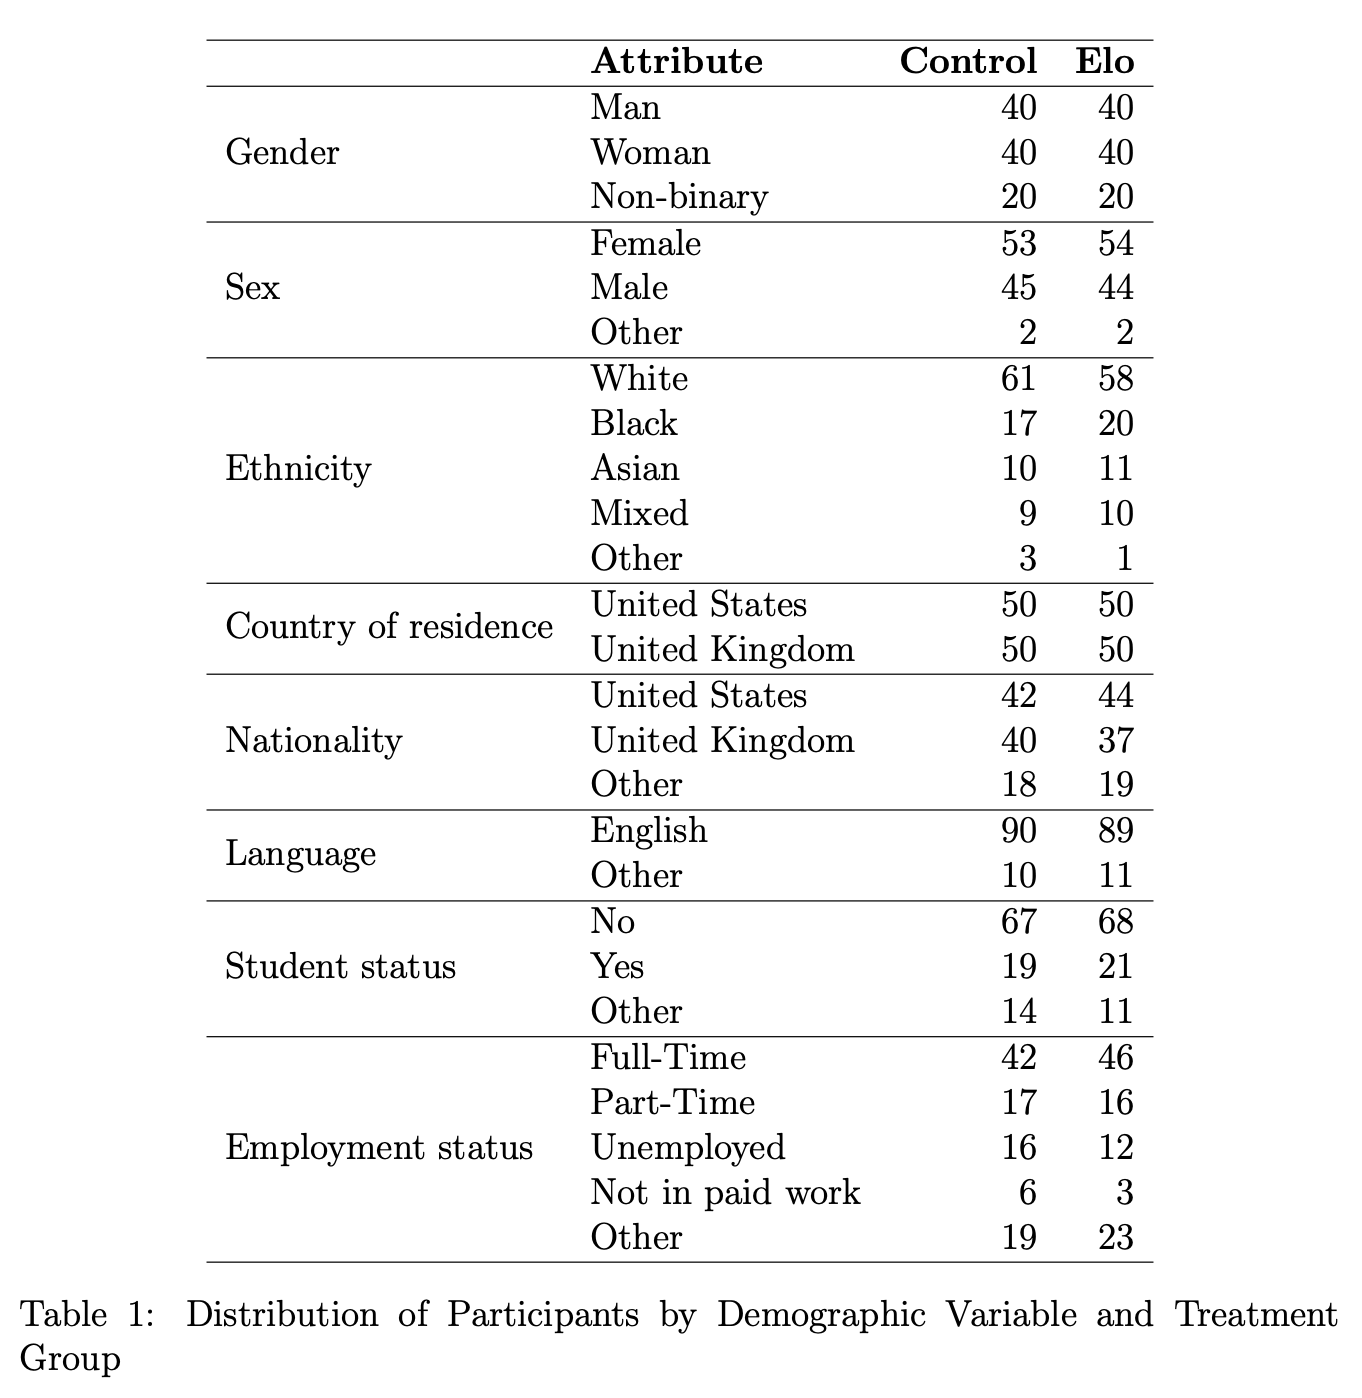

In [330]:
display.Image("Demographic_Info.png")

### What kinds of characters did they pick to play?

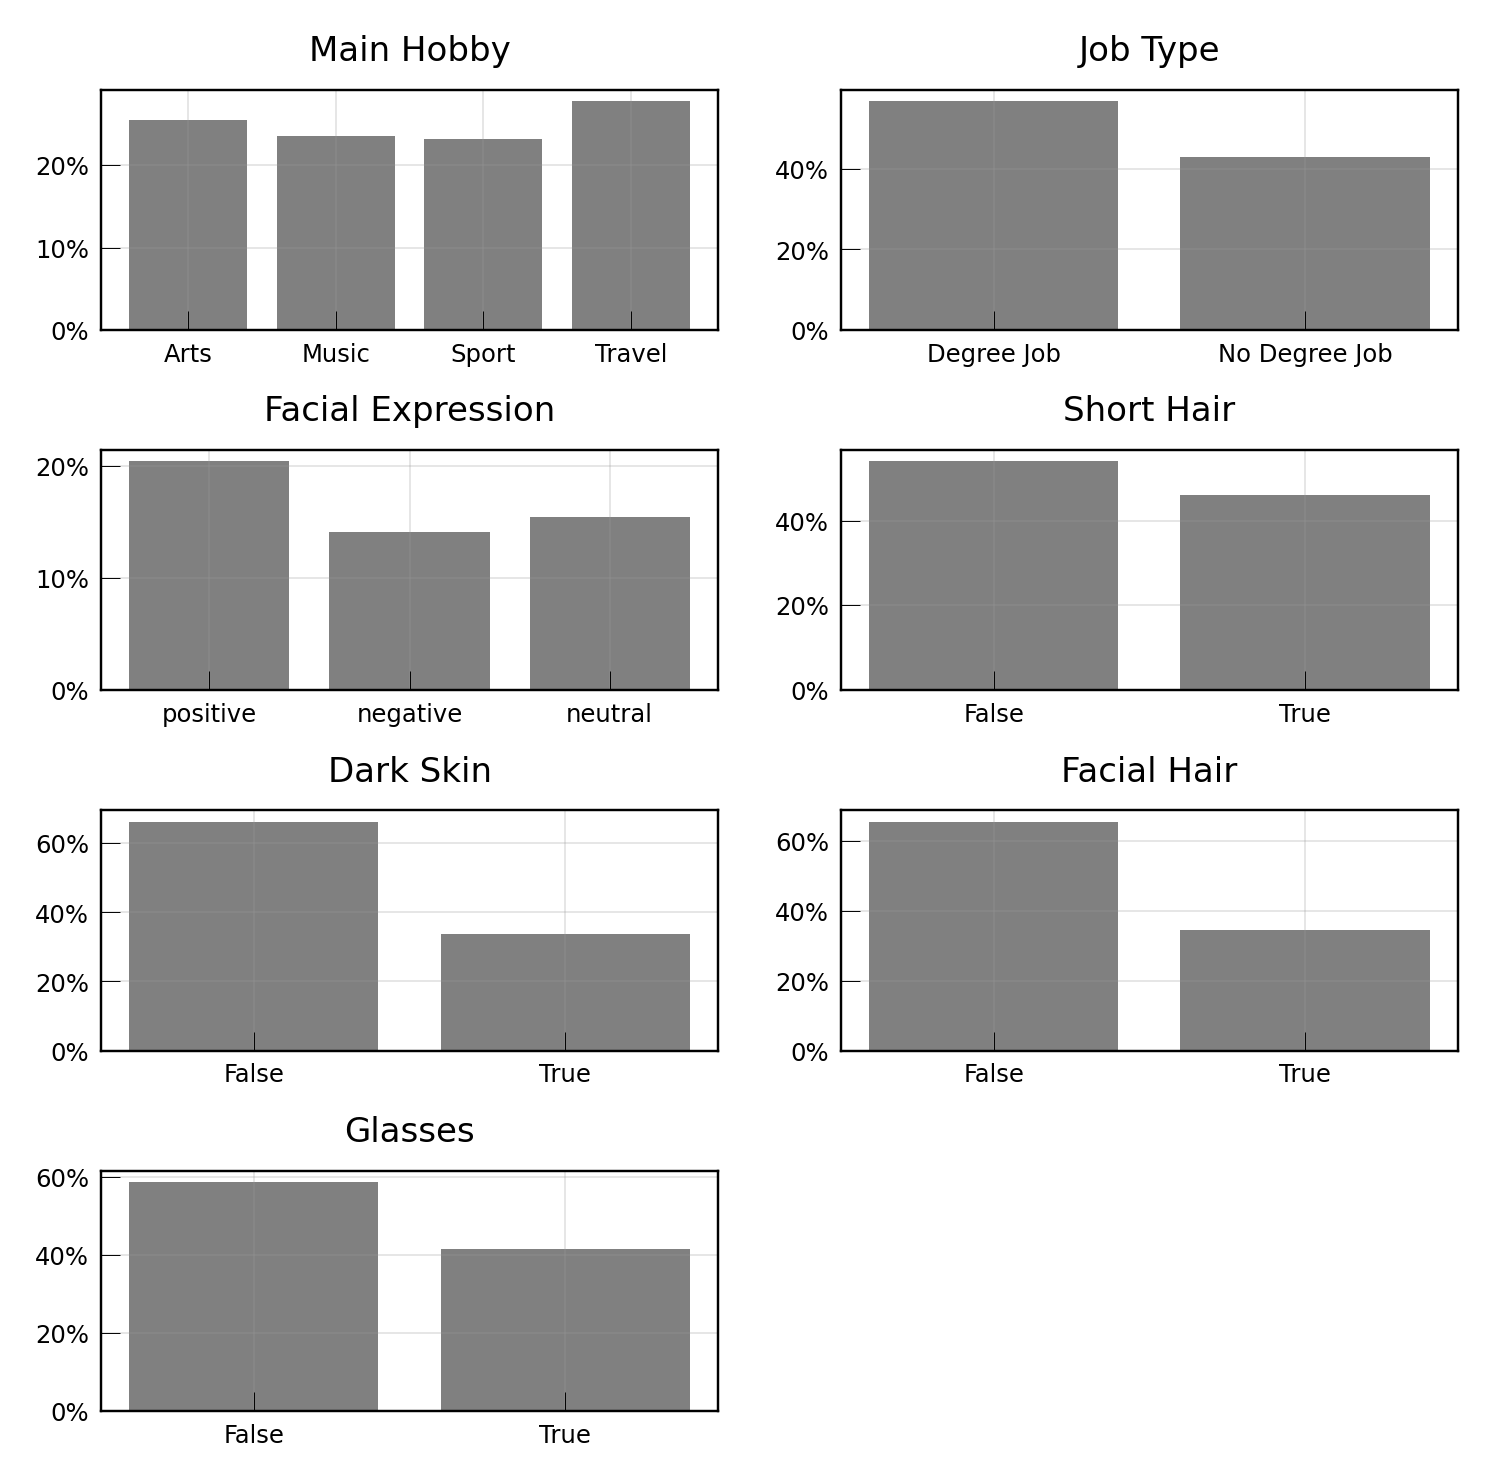

In [331]:
character_df['job_type'] = character_df['job_type'].replace({
    'No Higher Education Job': 'No Degree Job',
    'Higher Education Job': 'Degree Job'
})



merged_df = pd.merge(player_df, character_df, left_on='chosenProfile', right_on='profile_ID')

character_columns = ['main_hobby', 'job_type', 
                     'face_mood', 'hair_short', 'skin_dark', 
                     'has_facial_hair', 'has_accessories']

column_titles = {
    'main_hobby': 'Main Hobby',
    'job_type': 'Job Type',
    'face_mood': 'Facial Expression',
    'hair_short': 'Short Hair',
    'skin_dark': 'Dark Skin',
    'has_facial_hair': 'Facial Hair',
    'has_accessories': 'Glasses'
}

rows = 4
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(5, 5), dpi=350)
axes = axes.flatten()

for i, column in enumerate(character_columns):
    total_value_counts = character_df[column].value_counts()
    picked_value_counts = merged_df[column].value_counts()
    normalized_counts = (picked_value_counts / total_value_counts).fillna(0)
    normalized_counts = (normalized_counts / normalized_counts.sum()) * 100  # Normalize to get percentages
    
    if column in ['hair_short', 'skin_dark', 'has_facial_hair', 'has_accessories']:
        normalized_counts.index = normalized_counts.index.map({False: 'False', True: 'True'})
    
    axes[i].bar(normalized_counts.index, normalized_counts.values, color='grey')
    axes[i].set_title(column_titles[column])
    axes[i].set_yticklabels([f'{int(tick)}%' for tick in axes[i].get_yticks()])
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x')

fig.delaxes(axes[-1])

plt.subplots_adjust(hspace=0.5)
plt.savefig("visualisations/attributes_of_picked_characters.pdf", bbox_inches='tight')
plt.show()

In [332]:
from matplotlib.sankey import Sankey

In [333]:
player_df.columns

Index(['id', 'chosenProfile', 'playerID', 'participantIdentifier',
       'recAlgorithm', 'ended', 'feedback', 'Status', 'Started at',
       'Completed at', 'Time taken', 'Dating apps', 'Gender', 'Age', 'Sex',
       'Ethnicity simplified', 'Country of birth', 'Country of residence',
       'Nationality', 'Language', 'Student status', 'Employment status'],
      dtype='object')

In [334]:
elo_ranking_df.columns

Index(['Profile', 'Elo Rating'], dtype='object')

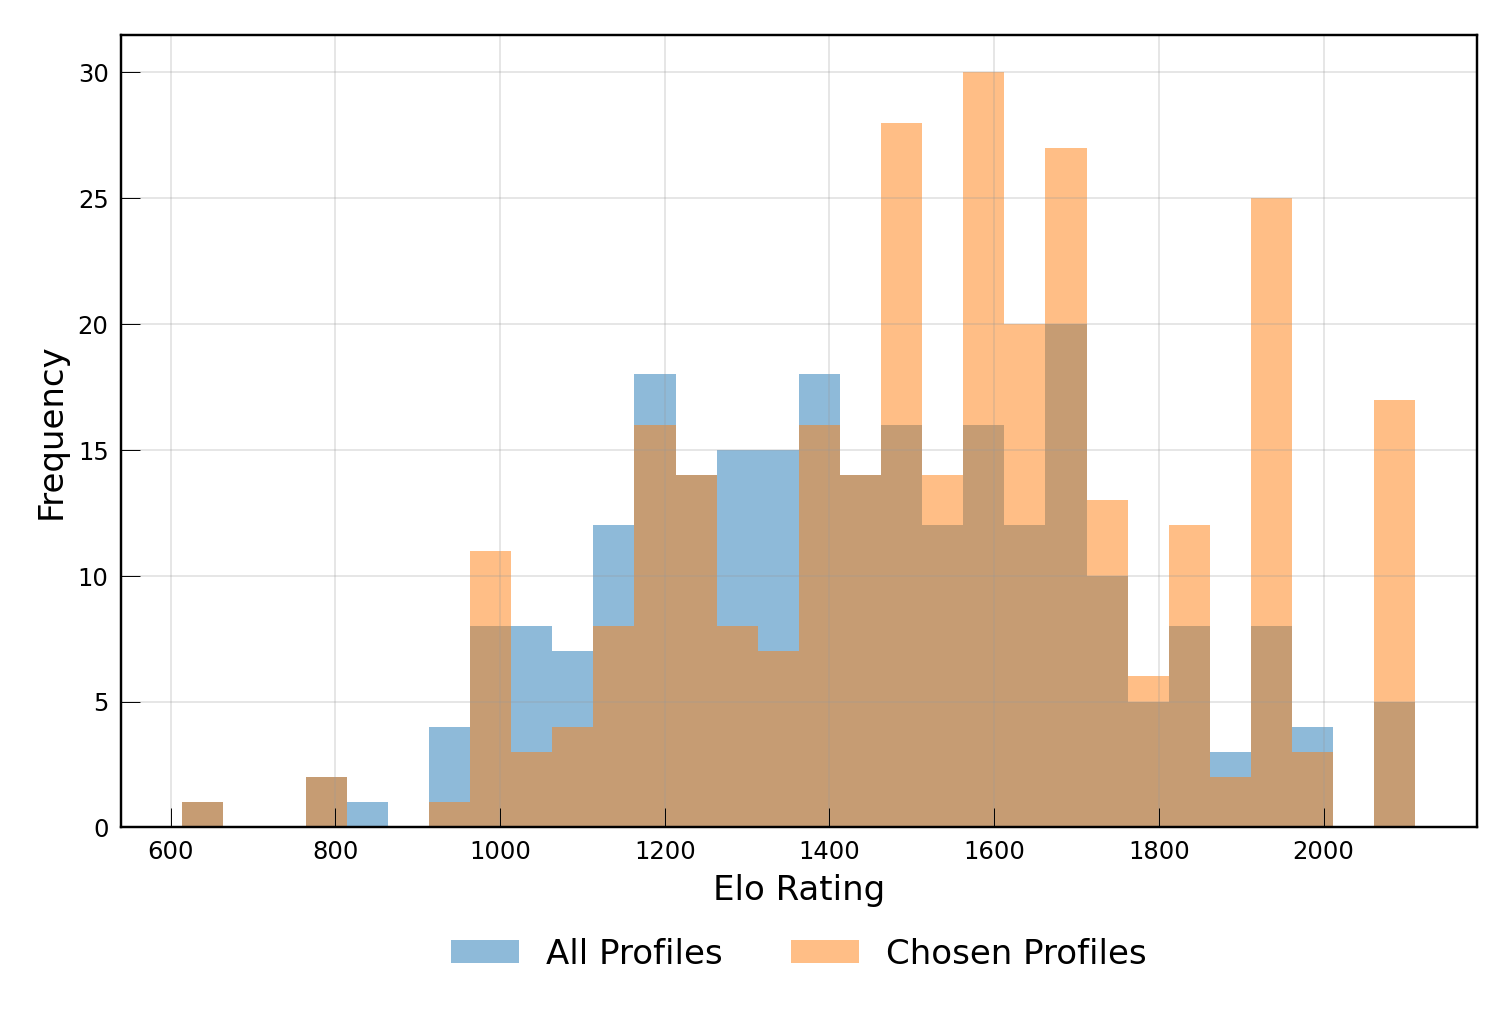

In [335]:
merged_df = player_df.merge(elo_ranking_df, left_on='chosenProfile', right_on='Profile')

all_elo_ratings = elo_ranking_df['Elo Rating']
chosen_elo_ratings = merged_df['Elo Rating']

plt.figure(figsize=(5, 3), dpi=350)

plt.hist(all_elo_ratings, bins=30, alpha=0.5, label='All Profiles')
plt.hist(chosen_elo_ratings, bins=30, alpha=0.5, label='Chosen Profiles')

plt.xlabel('Elo Rating')
plt.ylabel('Frequency')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.savefig("visualisations/elo_of_ell_vs_picked_characters.pdf", bbox_inches='tight')
plt.show()

In [352]:
character_df

accessories           face       facial_hair           hair  \
0      GlassesTwo          Angry      MustacheThin       ShortTwo   
1     GlassesFive         Cheeky  MustacheThinBull       ShortTwo   
2      Sunglasses  ConcernedFear              Full      TwistsTwo   
3      GlassesSix    EatingHappy      MustacheThin      ShavedOne   
4    GlassesThree          Blank  MustacheThinBull      ShortFour   
..            ...            ...               ...            ...   
251          None            Awe              None  CornrowsLight   
252          None           Fear              None      DreadsOne   
253          None  ConcernedFear              None       BangsTwo   
254          None         Driven              None       BangsTwo   
255          None  ConcernedFear              None      MediumTwo   

                  pose skin_tone  age main_hobby           hobby_1    hobby_2  \
0             GymShirt   #ffe7d1   32      Sport          Swimming     Soccer   
1            TeeSelena   #e6bc98   28      Sport            Skiing     Soccer   
2           Explaining   #73412f   37      Sport  Horseback Riding   Swimming   
3             Computer   #e6bc98   28      Sport            Hiking     Soccer   
4               Coffee   #3b2219   30      Sport           Bowling  Wrestling   
..                 ...       ...  ...        ...               ...        ...   
251         Turtleneck   #3b2219   36      Music           Singing  Composing   
252          ShirtCoat   #3b2219   27      Music           Karaoke     Violin   
253  StrippedPocketTee   #ffe7d1   28      Music     Country Music       Jazz   
254        PoloSweater   #d4aa78   32      Music         Pop Music    Hip Hop   
255          TeeSelena   #a16e4b   31      Music             DJing  Composing   

     ... has_facial_hair has_accessories profile_ID has_degree_job  \
0    ...            True            True          0          False   
1    ...            True            True          1           True   
2    ...            True            True          2          False   
3    ...            True            True          3           True   
4    ...            True            True          4           True   
..   ...             ...             ...        ...            ...   
251  ...           False           False        251          False   
252  ...           False           False        252          False   
253  ...           False           False        253           True   
254  ...           False           False        254          False   
255  ...           False           False        255           True   

     has_positive_face_mood has_sport_hobby  has_art_hobby  has_travel_hobby  \
0                     False            True          False             False   
1                      True            True          False             False   
2                     False            True          False             False   
3                      True            True          False             False   
4                     False            True          False             False   
..                      ...             ...            ...               ...   
251                    True           False          False             False   
252                   False           False          False             False   
253                   False           False          False             False   
254                    True           False          False             False   
255                   False           False          False             False   

     has_music_hobby  young  
0              False   True  
1              False   True  
2              False  False  
3              False   True  
4              False   True  
..               ...    ...  
251             True  False  
252             True   True  
253             True   True  
254             True   True  
255             True   True  

[256 rows x 28 columns]

In [353]:

character_df['has_degree_job'] = character_df['job_type']== 'Degree Job'
character_df['has_positive_face_mood'] = character_df['face_mood']== 'positive'

character_df['has_sport_hobby'] = character_df['main_hobby']== 'Sport'
character_df['has_art_hobby'] = character_df['main_hobby']== 'Arts'
character_df['has_travel_hobby'] = character_df['main_hobby']== 'Travel'
character_df['has_music_hobby'] = character_df['main_hobby']== 'Music'
character_df['young']=character_df['age']<=32

In [354]:
character_df#.columns

accessories           face       facial_hair           hair  \
0      GlassesTwo          Angry      MustacheThin       ShortTwo   
1     GlassesFive         Cheeky  MustacheThinBull       ShortTwo   
2      Sunglasses  ConcernedFear              Full      TwistsTwo   
3      GlassesSix    EatingHappy      MustacheThin      ShavedOne   
4    GlassesThree          Blank  MustacheThinBull      ShortFour   
..            ...            ...               ...            ...   
251          None            Awe              None  CornrowsLight   
252          None           Fear              None      DreadsOne   
253          None  ConcernedFear              None       BangsTwo   
254          None         Driven              None       BangsTwo   
255          None  ConcernedFear              None      MediumTwo   

                  pose skin_tone  age main_hobby           hobby_1    hobby_2  \
0             GymShirt   #ffe7d1   32      Sport          Swimming     Soccer   
1            TeeSelena   #e6bc98   28      Sport            Skiing     Soccer   
2           Explaining   #73412f   37      Sport  Horseback Riding   Swimming   
3             Computer   #e6bc98   28      Sport            Hiking     Soccer   
4               Coffee   #3b2219   30      Sport           Bowling  Wrestling   
..                 ...       ...  ...        ...               ...        ...   
251         Turtleneck   #3b2219   36      Music           Singing  Composing   
252          ShirtCoat   #3b2219   27      Music           Karaoke     Violin   
253  StrippedPocketTee   #ffe7d1   28      Music     Country Music       Jazz   
254        PoloSweater   #d4aa78   32      Music         Pop Music    Hip Hop   
255          TeeSelena   #a16e4b   31      Music             DJing  Composing   

     ... has_facial_hair has_accessories profile_ID has_degree_job  \
0    ...            True            True          0          False   
1    ...            True            True          1           True   
2    ...            True            True          2          False   
3    ...            True            True          3           True   
4    ...            True            True          4           True   
..   ...             ...             ...        ...            ...   
251  ...           False           False        251          False   
252  ...           False           False        252          False   
253  ...           False           False        253           True   
254  ...           False           False        254          False   
255  ...           False           False        255           True   

     has_positive_face_mood has_sport_hobby  has_art_hobby  has_travel_hobby  \
0                     False            True          False             False   
1                      True            True          False             False   
2                     False            True          False             False   
3                      True            True          False             False   
4                     False            True          False             False   
..                      ...             ...            ...               ...   
251                    True           False          False             False   
252                   False           False          False             False   
253                   False           False          False             False   
254                    True           False          False             False   
255                   False           False          False             False   

     has_music_hobby  young  
0              False   True  
1              False   True  
2              False  False  
3              False   True  
4              False   True  
..               ...    ...  
251             True  False  
252             True   True  
253             True   True  
254             True   True  
255             True   True  

[256 rows x 28 columns]

In [355]:
# elo_bins = pd.cut(merged_df['Elo Rating'], bins=10) 

# merged_df = pd.merge(elo_ranking_df, character_df, left_on='Profile', right_on='profile_ID')

# proportions = merged_df.groupby(elo_bins)[boolean_columns].mean()
# counts = merged_df.groupby(elo_bins)[boolean_columns].count()

# num_attributes = len(boolean_columns)
# cols = 2  
# rows = (num_attributes // cols) + (num_attributes % cols > 0)

# fig, axes = plt.subplots(rows, cols, figsize=(5, rows * 1), dpi=350)
# axes = axes.flatten()

# title_dict = {
#     'hair_short': 'Short Hair',
#     'has_facial_hair': 'Beard',
#     'has_accessories': 'Glasses',
#     'skin_dark': 'Dark Skin',
#     'has_positive_face_mood': 'Positive Mood',
#     'young':'Young',
    
#     'has_degree_job': 'Degree Job',
#         'has_art_hobby': 'Art',
#         'has_music_hobby': 'Music',
    
#     'has_sport_hobby': 'Sport',

#     'has_travel_hobby': 'Travel',

# }

# third_row_left_index = 2 * 2

# for i, column in enumerate(boolean_columns):
#     # Calculate the standard error
#     se = np.sqrt(proportions[column] * (1 - proportions[column]) / counts[column])
    
#     # Calculate the 95% confidence intervals
#     ci_lower = proportions[column] - 1.96 * se
#     ci_upper = proportions[column] + 1.96 * se
    
#     # Plot the proportions line
#     axes[i].plot(proportions.index.categories.mid, proportions[column], label=column, color='darkgrey')
    
#     # Fill the area between the confidence intervals
#     axes[i].fill_between(proportions.index.categories.mid, ci_lower, ci_upper, color='gray', alpha=0.2)
    
#     axes[i].set_title(title_dict[column])
#     axes[i].set_ylim(-0.02, 1.02) 
    
#     if i != third_row_left_index:
#         axes[i].set_ylabel('')
#     else:
#         axes[i].set_ylabel('Proportion of Profiles with Attribute', fontsize=8, labelpad=10) 
    
#     if i < len(axes) - cols:
#         axes[i].set_xlabel('')
#     else:
#         axes[i].set_xlabel('')

#     axes[i].grid(True)

# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])
    
# fig.supxlabel('Elo Rating', fontsize=8)

# plt.tight_layout()

# plt.savefig("visualisations/correlation_profile_attributes_elo.pdf", bbox_inches='tight')

# plt.show()


In [358]:
boolean_columns = ['hair_short',
 'skin_dark',
 'has_facial_hair',
 'has_accessories',
 'has_degree_job',
 'has_positive_face_mood',
 'has_sport_hobby',
 'has_art_hobby',
 'has_travel_hobby',
 'has_music_hobby',
                  'young']


title_dict = {
    'hair_short': 'Short Hair',
    'has_facial_hair': 'Beard',
    'has_accessories': 'Glasses',
    'skin_dark': 'Dark Skin',
    'has_positive_face_mood': 'Positive Mood',
    'young':'Young',
    'has_degree_job': 'Degree Job',
        'has_art_hobby': 'Art',
        'has_music_hobby': 'Music',
    'has_sport_hobby': 'Sport',
    'has_travel_hobby': 'Travel',

}

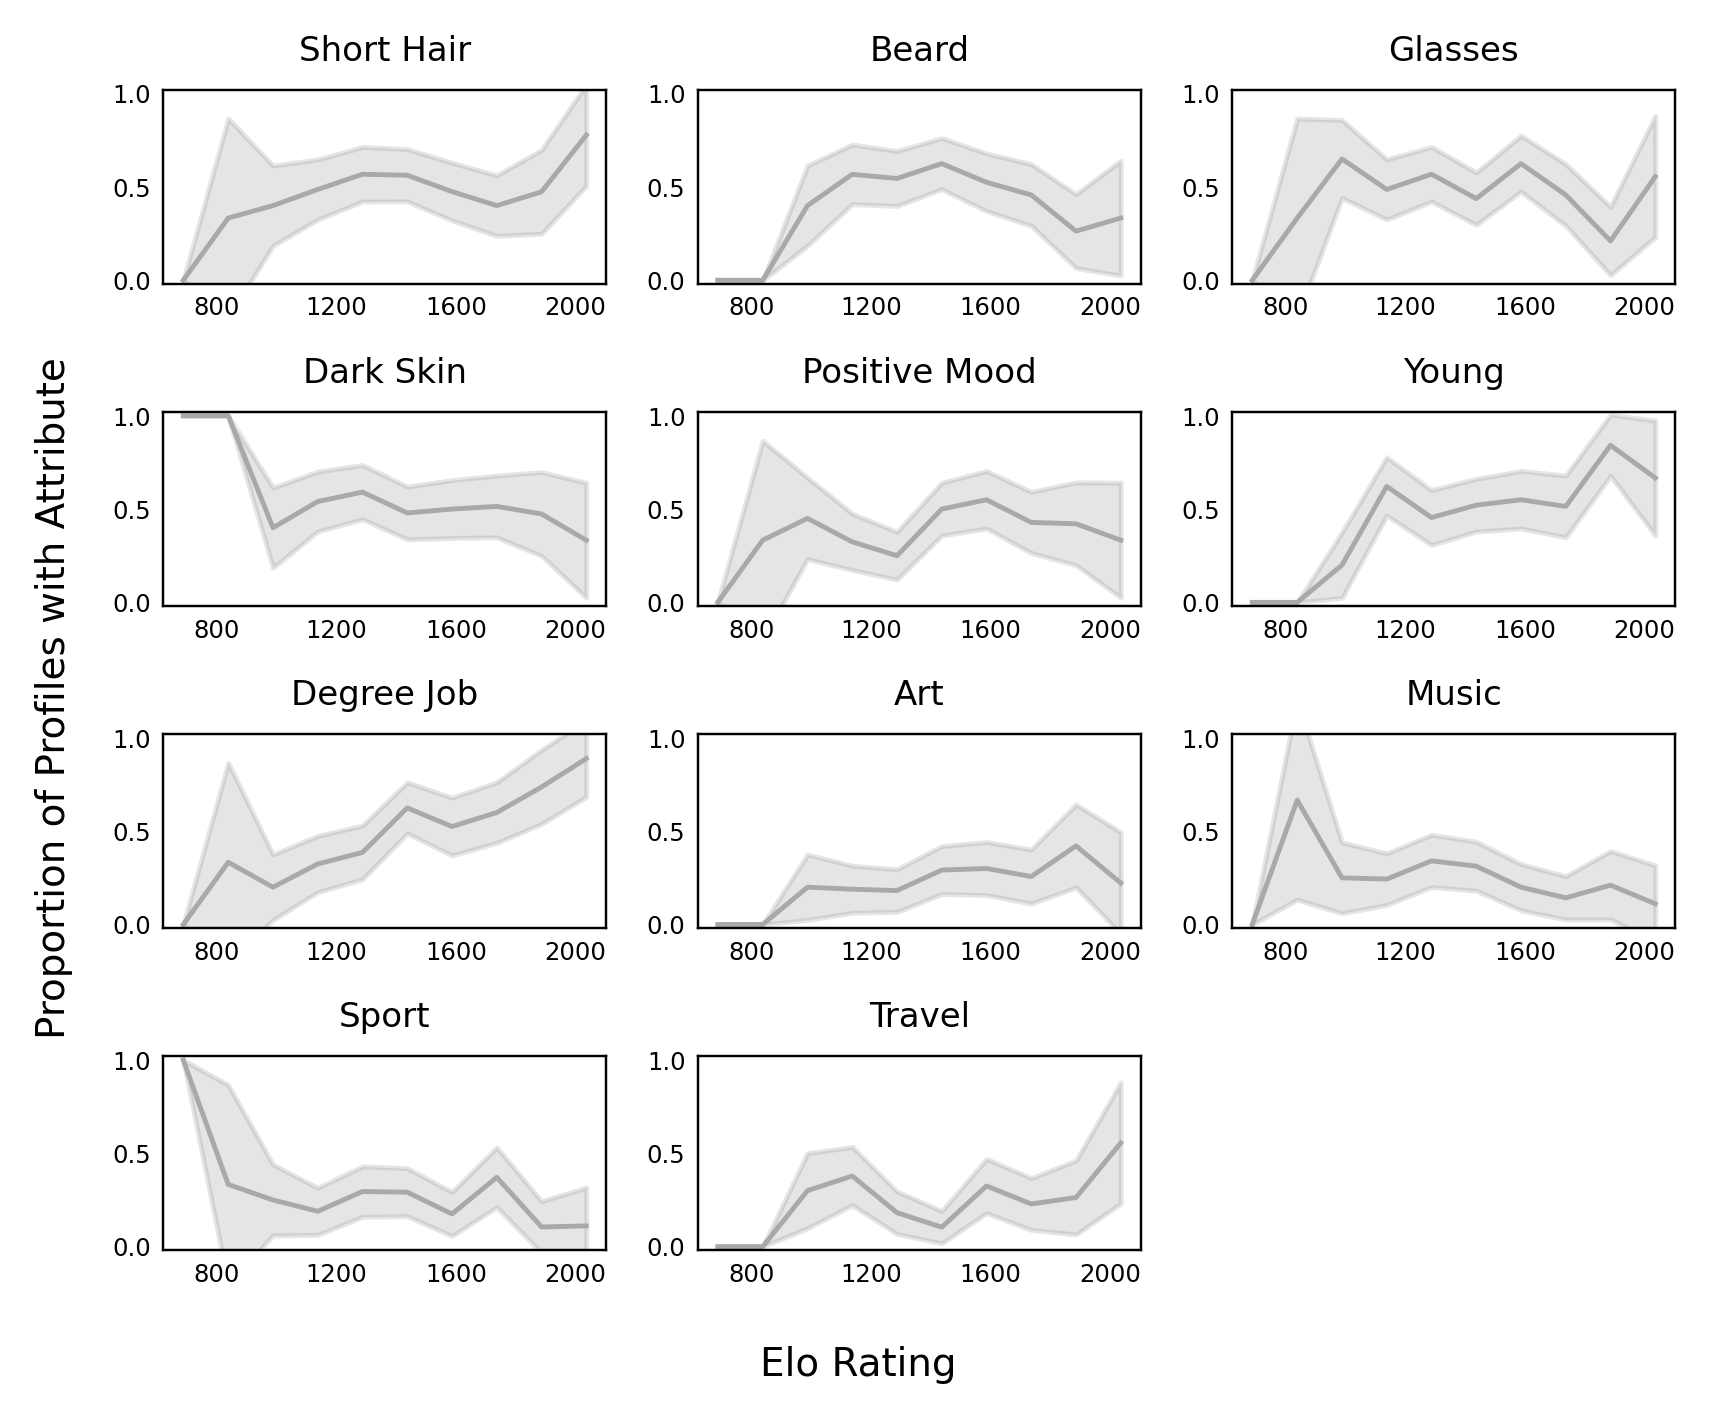

In [446]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator

# Assuming 'elo_ranking_df' and 'character_df' are already defined
elo_bins = pd.cut(merged_df['Elo Rating'], bins=10) 

merged_df = pd.merge(elo_ranking_df, character_df, left_on='Profile', right_on='profile_ID')

proportions = merged_df.groupby(elo_bins)[boolean_columns].mean()
counts = merged_df.groupby(elo_bins)[boolean_columns].count()

# Ensure boolean_columns are ordered according to title_dict
ordered_columns = list(title_dict.keys())

num_attributes = len(ordered_columns)
cols = 3
rows = (num_attributes // cols) + (num_attributes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(4.9, rows * 1), dpi=350)
axes = axes.flatten()

third_row_left_index = 2 * 2

for i, column in enumerate(ordered_columns):
    if column in proportions.columns:
        # Calculate the standard error
        se = np.sqrt(proportions[column] * (1 - proportions[column]) / counts[column])

        # Calculate the 95% confidence intervals
        ci_lower = proportions[column] - 1.96 * se
        ci_upper = proportions[column] + 1.96 * se

        # Plot the proportions line
        axes[i].plot(proportions.index.categories.mid, proportions[column], label=column, color='darkgrey')

        # Fill the area between the confidence intervals
        axes[i].fill_between(proportions.index.categories.mid, ci_lower, ci_upper, color='gray', alpha=0.2)

        axes[i].set_title(title_dict[column])
        axes[i].set_ylim(-0.02, 1.02)

        if i != third_row_left_index:
            axes[i].set_ylabel('')
        else:
            axes[i].set_ylabel('', fontsize=8, labelpad=10)

        if i < len(axes) - cols:
            axes[i].set_xlabel('')
        else:
            axes[i].set_xlabel('')

        axes[i].grid(False)

        axes[i].tick_params(axis='both', which='both', length=0)

        # Set the number of x-ticks to 5
        axes[i].xaxis.set_major_locator(MaxNLocator(nbins=4))

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a shared x-axis label
fig.supxlabel('Elo Rating', fontsize=8)

# Add a shared y-axis label
fig.supylabel('Proportion of Profiles with Attribute', fontsize=8)

plt.tight_layout()

plt.savefig("visualisations/correlation_profile_attributes_elo.pdf", bbox_inches='tight')

plt.show()


In [362]:
learnt_preferences_by_participant = pd.read_csv('/Users/franziskahafner/Desktop/oii/trinity/thesis/dating-app-experiment-analysis/preferences_data/preferences_mean_df.csv')


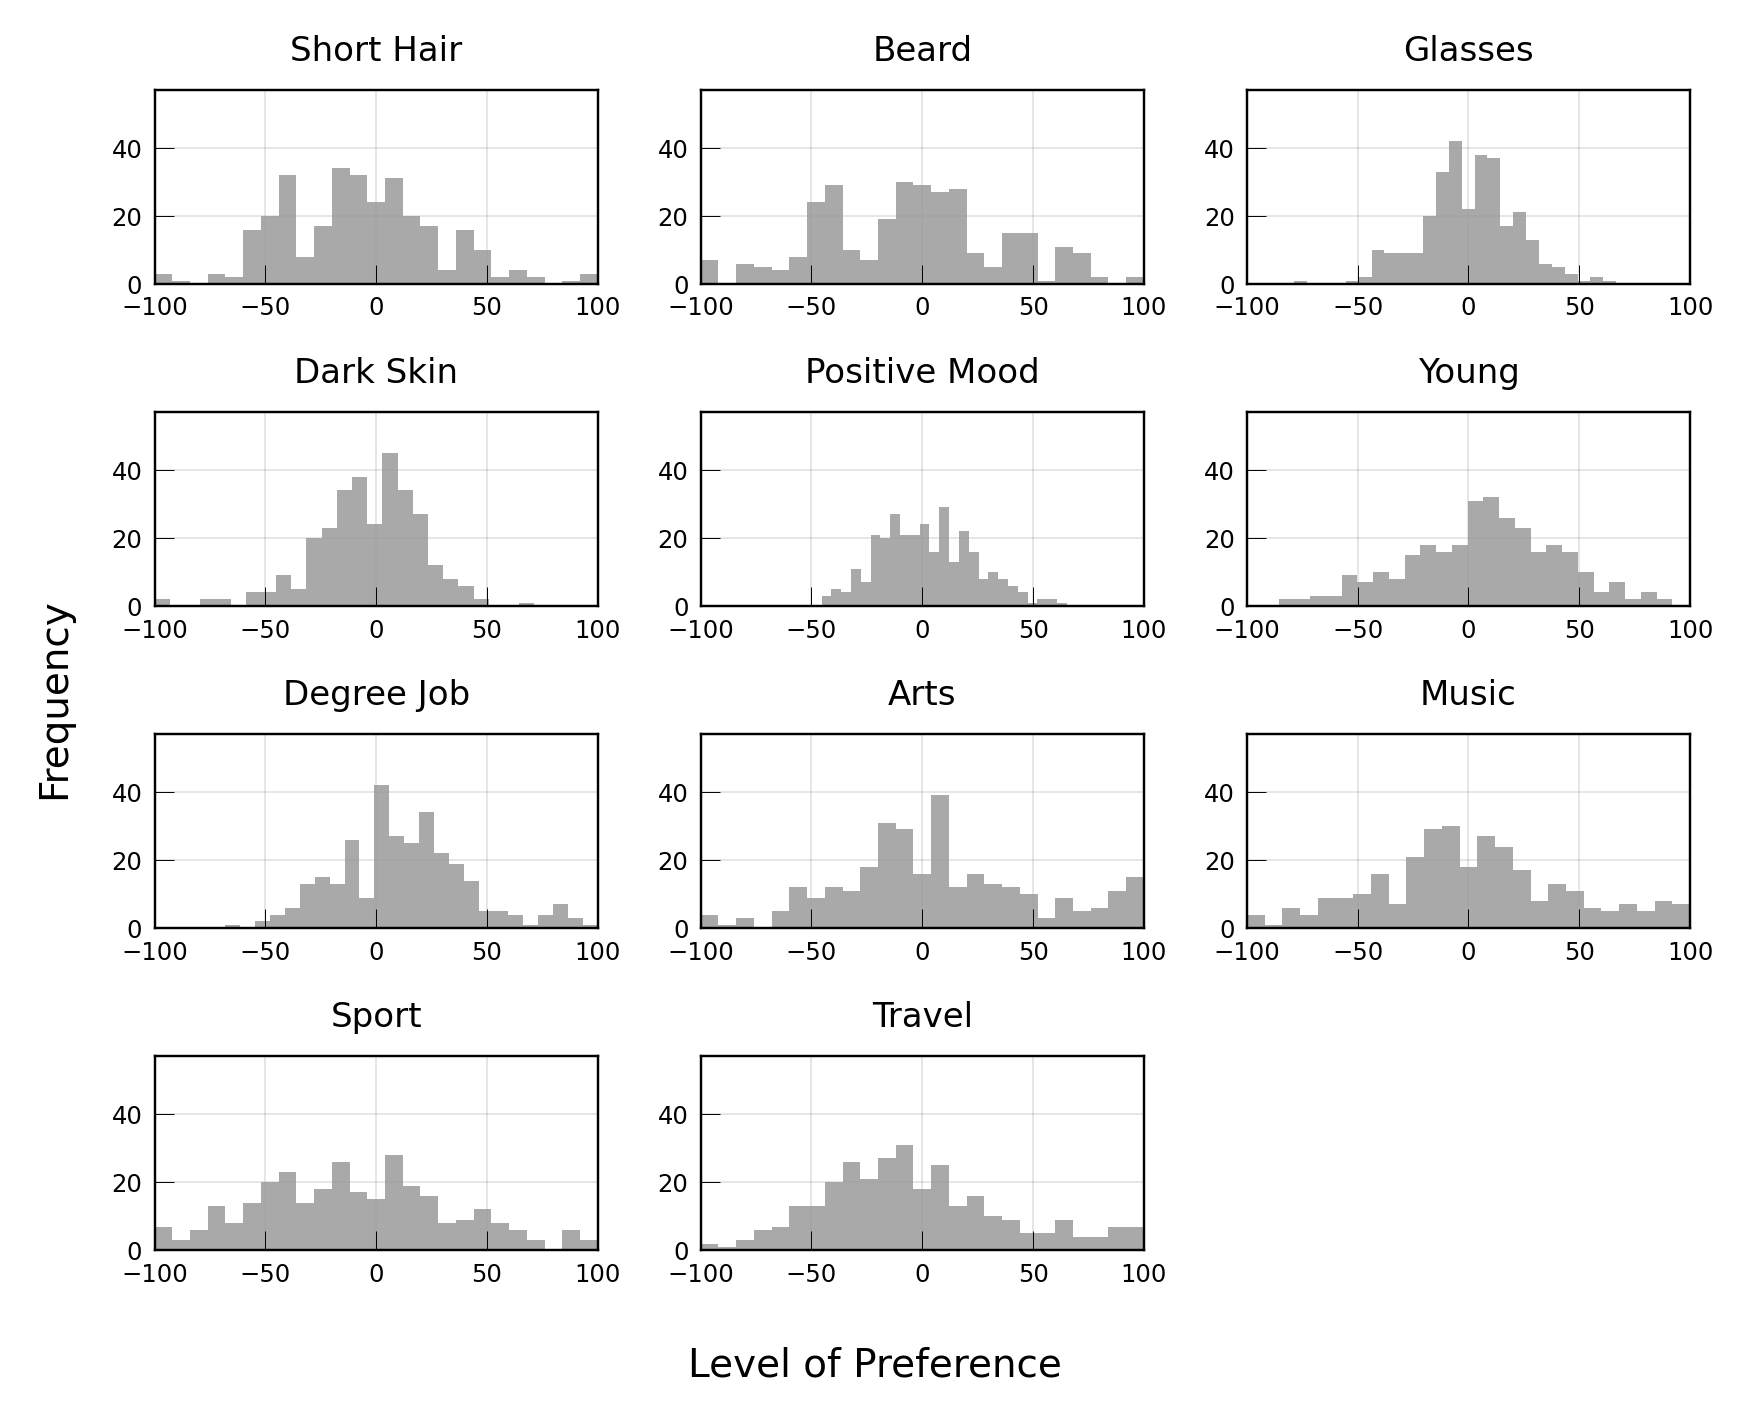

In [381]:
import matplotlib.pyplot as plt

# Dictionary mapping the original column names to more readable titles
column_titles = {
    'hair_short': 'Short Hair',
    'has_facial_hair': 'Beard',
    'has_accessories': 'Glasses',
    'skin_dark': 'Dark Skin',
    'face_positive': 'Positive Mood',
    
    'young': 'Young',
    
    
    
    
    'job_type_higher_ed': 'Degree Job',
    
    'main_hobby_Arts': 'Arts',
    'main_hobby_Music': 'Music',
    'main_hobby_Sport': 'Sport',
    'main_hobby_Travel': 'Travel'
}




# title_dict = {
#     'hair_short': 'Short Hair',
#     'has_facial_hair': 'Beard',
#     'has_accessories': 'Glasses',
#     'skin_dark': 'Dark Skin',
#     'has_positive_face_mood': 'Positive Mood',
#     'young':'Young',
#     'has_degree_job': 'Degree Job',
#         'has_art_hobby': 'Art',
#         'has_music_hobby': 'Music',
#     'has_sport_hobby': 'Sport',
#     'has_travel_hobby': 'Travel',

# }

# Get the keys of the dictionary in order (this will define the order of the subplots)
columns_to_plot = list(column_titles.keys())

# Determine the layout of the small multiples plot
num_attributes = len(columns_to_plot)
cols = 3
rows = (num_attributes // cols) + (num_attributes % cols > 0)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5, rows * 1), dpi=350)
axes = axes.flatten()

# Loop through each attribute and plot its distribution
for i, column in enumerate(columns_to_plot):
    if column in learnt_preferences_by_participant.columns:
        # Plot the histogram of the column
        axes[i].hist(learnt_preferences_by_participant[column], bins=25, color='darkgrey')
        
        # Set title for the subplot using the dictionary
        axes[i].set_title(column_titles[column])
        
        # Set y-axis limit to be consistent across all plots
        axes[i].set_ylim(0, 57)
        axes[i].set_xlim(-100, 100)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a shared x-axis label
fig.supxlabel('Level of Preference', fontsize=8)

# Add a shared y-axis label
fig.supylabel('Frequency', fontsize=8)

# Adjust layout to make room for the labels
plt.tight_layout()

# Save the figure
plt.savefig("visualisations/learnt_preferences_distribution.pdf", bbox_inches='tight')

# Display the plot
plt.show()


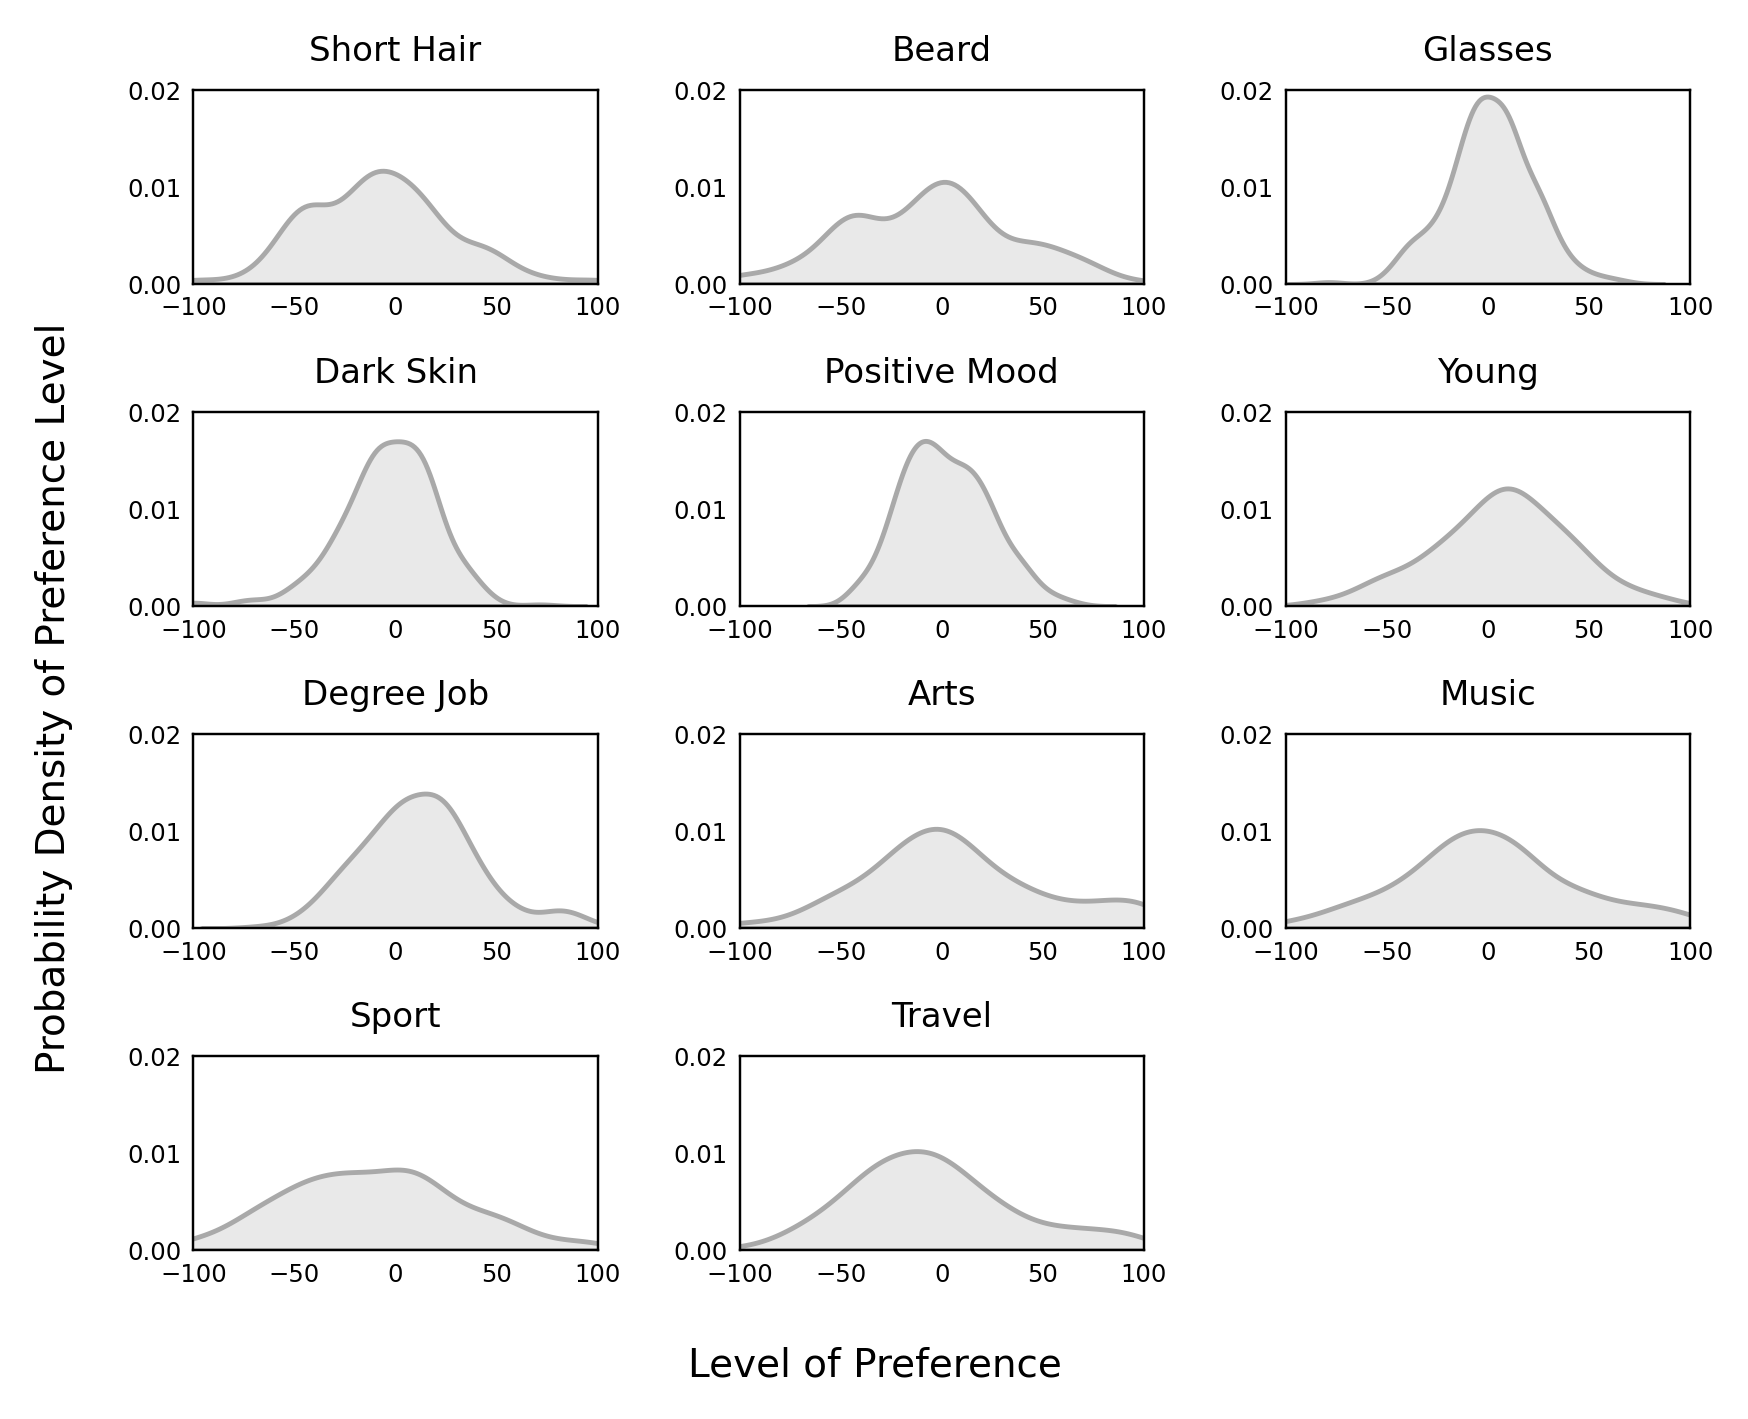

In [434]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary mapping the original column names to more readable titles
column_titles = {
    'hair_short': 'Short Hair',
    'has_facial_hair': 'Beard',
    'has_accessories': 'Glasses',
    'skin_dark': 'Dark Skin',
    'face_positive': 'Positive Mood',
    'young': 'Young',
    'job_type_higher_ed': 'Degree Job',
    'main_hobby_Arts': 'Arts',
    'main_hobby_Music': 'Music',
    'main_hobby_Sport': 'Sport',
    'main_hobby_Travel': 'Travel'
}

# Get the keys of the dictionary in order (this will define the order of the subplots)
columns_to_plot = list(column_titles.keys())

# Determine the layout of the small multiples plot
num_attributes = len(columns_to_plot)
cols = 3
rows = (num_attributes // cols) + (num_attributes % cols > 0)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5, rows * 1), dpi=350)
axes = axes.flatten()

# Loop through each attribute and plot its distribution
for i, column in enumerate(columns_to_plot):
    if column in learnt_preferences_by_participant.columns:
        # Plot the smooth distribution of the column using kdeplot
        sns.kdeplot(learnt_preferences_by_participant[column], ax=axes[i], color='darkgrey', fill=True)
        
        # Set title for the subplot using the dictionary
        axes[i].set_title(column_titles[column])
        
        # Set y-axis limit to be consistent across all plots
        axes[i].set_ylim(0, 0.02)  # Adjust this based on your data
        axes[i].set_xlim(-100, 100)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        
        # Remove grid and ticks but keep tick labels
        axes[i].grid(False)
        axes[i].tick_params(axis='both', which='both', length=0)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a shared x-axis label
fig.supxlabel('Level of Preference', fontsize=8)

# Add a shared y-axis label
fig.supylabel('Probability Density of Preference Level', fontsize=8)

# Adjust layout to make room for the labels
plt.tight_layout()

# Save the figure
plt.savefig("visualisations/learnt_preferences_distribution.pdf", bbox_inches='tight')

# Display the plot
plt.show()


### What attributes influenced them to pick the character? In which attributes do they consider themselves to be similar to their character?

Survey Questions: 
- Check whether the character you chose is similar to you or not
- How much did each characteristic influence your decision to choose this character?

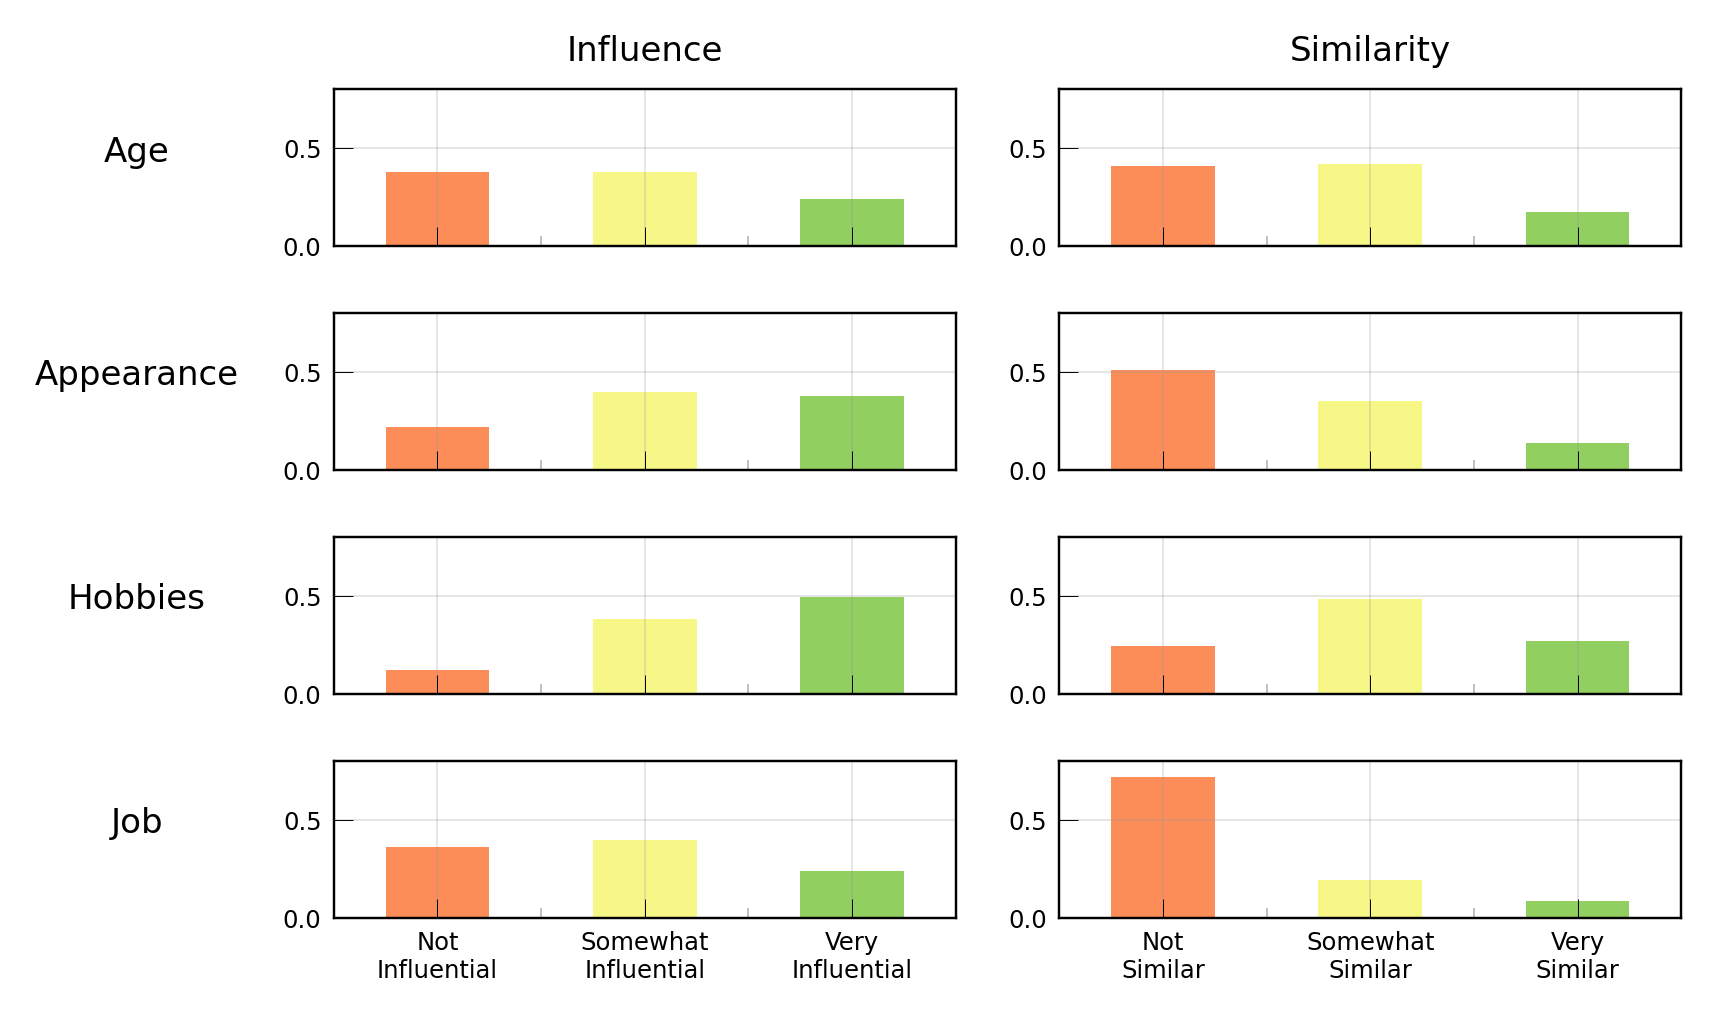

In [32]:
influence_columns = [col for col in characterChoiceSurvey_df.columns if 'Influence' in col]
similarity_columns = [col for col in characterChoiceSurvey_df.columns if 'Similarity' in col]
influence_categories = ['notInfluential', 'somewhatInfluential', 'veryInfluential']
similarity_categories = ['notSimilar', 'somewhatSimilar', 'verySimilar']

influence_counts = {col: characterChoiceSurvey_df[col].value_counts(normalize=True).reindex(influence_categories, fill_value=0) for col in influence_columns}
similarity_counts = {col: characterChoiceSurvey_df[col].value_counts(normalize=True).reindex(similarity_categories, fill_value=0) for col in similarity_columns}
fig, axs = plt.subplots(len(influence_columns), 2, figsize=(5, 3), sharex='col', dpi=350)

colors = ['#fc8d59', '#f7f788', '#91cf60']

for row, (col, counts) in enumerate(influence_counts.items()):
    counts.plot(kind='bar', ax=axs[row, 0], color=colors, legend=False)
    axs[row, 0].set_ylabel(col.replace('_', ' ').replace('Influence ', ''), rotation=0, labelpad=30)
    axs[row, 0].set_xlabel('')
    if row == len(influence_columns) - 1:  
        axs[row, 0].set_xticklabels(['Not\nInfluential', 'Somewhat\nInfluential', 'Very\nInfluential'], rotation=0)
    axs[row, 0].set_ylim(0, 0.8)

for row, (col, counts) in enumerate(similarity_counts.items()):
    counts.plot(kind='bar', ax=axs[row, 1], color=colors, legend=False)
    axs[row, 1].set_ylabel('')
    axs[row, 1].set_xlabel('')
    if row == len(similarity_columns) - 1: 
        axs[row, 1].set_xticklabels(['Not\nSimilar', 'Somewhat\nSimilar', 'Very\nSimilar'], rotation=0)
    axs[row, 1].set_ylim(0, 0.8)

axs[0, 0].set_title('Influence')
axs[0, 1].set_title('Similarity')

plt.tight_layout()
plt.subplots_adjust(left=0.2, top=0.9)

plt.savefig("visualisations/survey_influence_vs_similarity_when_picking_character.pdf", bbox_inches='tight')

plt.show()


To Do:
calculate correlation between similarity and influence

### Which types of characters did they like/dislike during swiping?

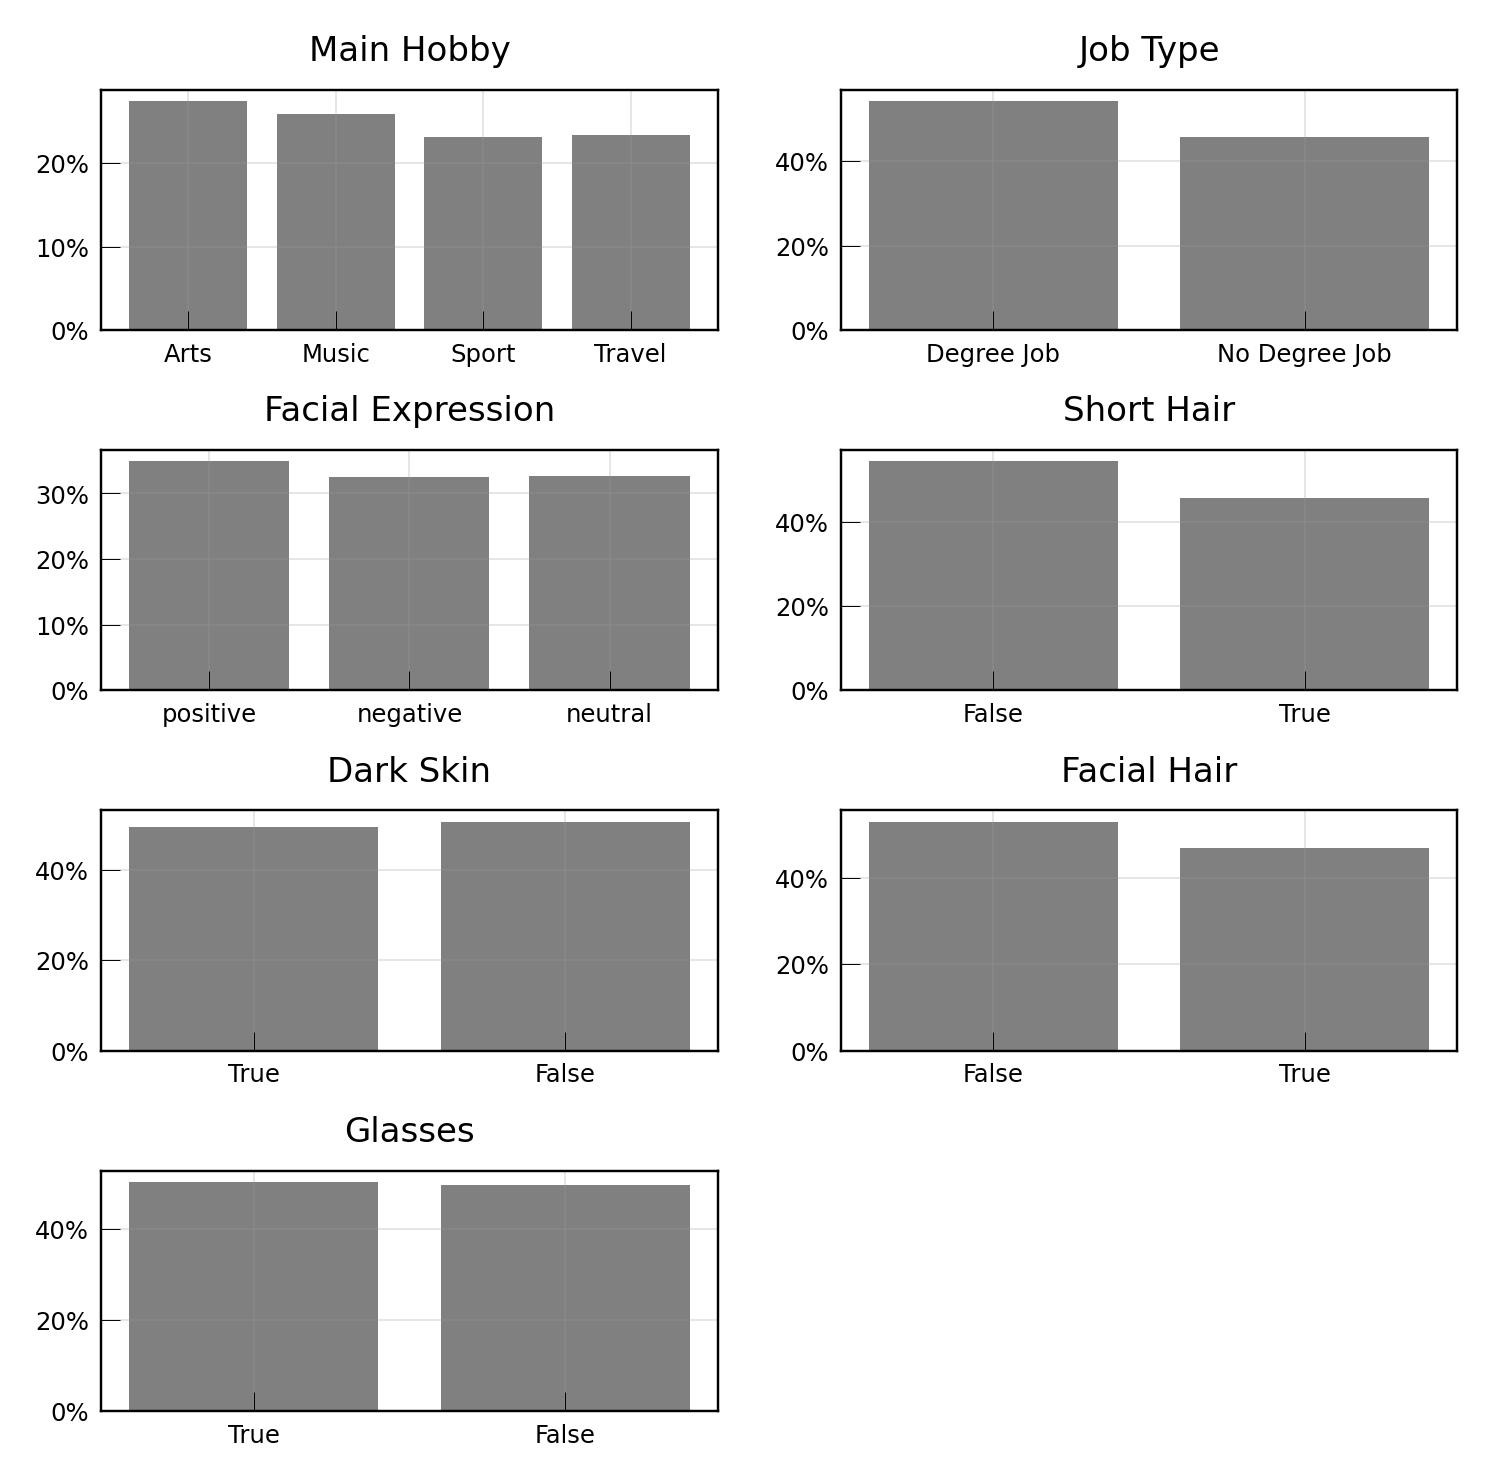

In [33]:
merged_df = pd.merge(SwipeDecision_df, character_df, left_on='likedProfile', right_on='profile_ID')
character_columns = ['main_hobby', 'job_type', 
                     'face_mood', 'hair_short', 'skin_dark', 
                     'has_facial_hair', 'has_accessories']

column_titles = {
    'main_hobby': 'Main Hobby',
    'job_type': 'Job Type',
    'face_mood': 'Facial Expression',
    'hair_short': 'Short Hair',
    'skin_dark': 'Dark Skin',
    'has_facial_hair': 'Facial Hair',
    'has_accessories': 'Glasses'
}

rows = 4
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(5, 5), dpi=350)
axes = axes.flatten()

for i, column in enumerate(character_columns):
    total_value_counts = character_df[column].value_counts()
    picked_value_counts = merged_df[column].value_counts()
    normalized_counts = (picked_value_counts / total_value_counts).fillna(0)
    normalized_counts = (normalized_counts / normalized_counts.sum()) * 100  # Normalize to get percentages
    
    if column in ['hair_short', 'skin_dark', 'has_facial_hair', 'has_accessories']:
        normalized_counts.index = normalized_counts.index.map({False: 'False', True: 'True'})
    
    axes[i].bar(normalized_counts.index, normalized_counts.values, color='grey')
    axes[i].set_title(column_titles[column])
    axes[i].set_yticklabels([f'{int(tick)}%' for tick in axes[i].get_yticks()])
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x')

fig.delaxes(axes[-1])

plt.subplots_adjust(hspace=0.5)
plt.savefig("visualisations/attributes_of_liked_characters.pdf", bbox_inches='tight')
plt.show()

### Which types of characters were they recommended?

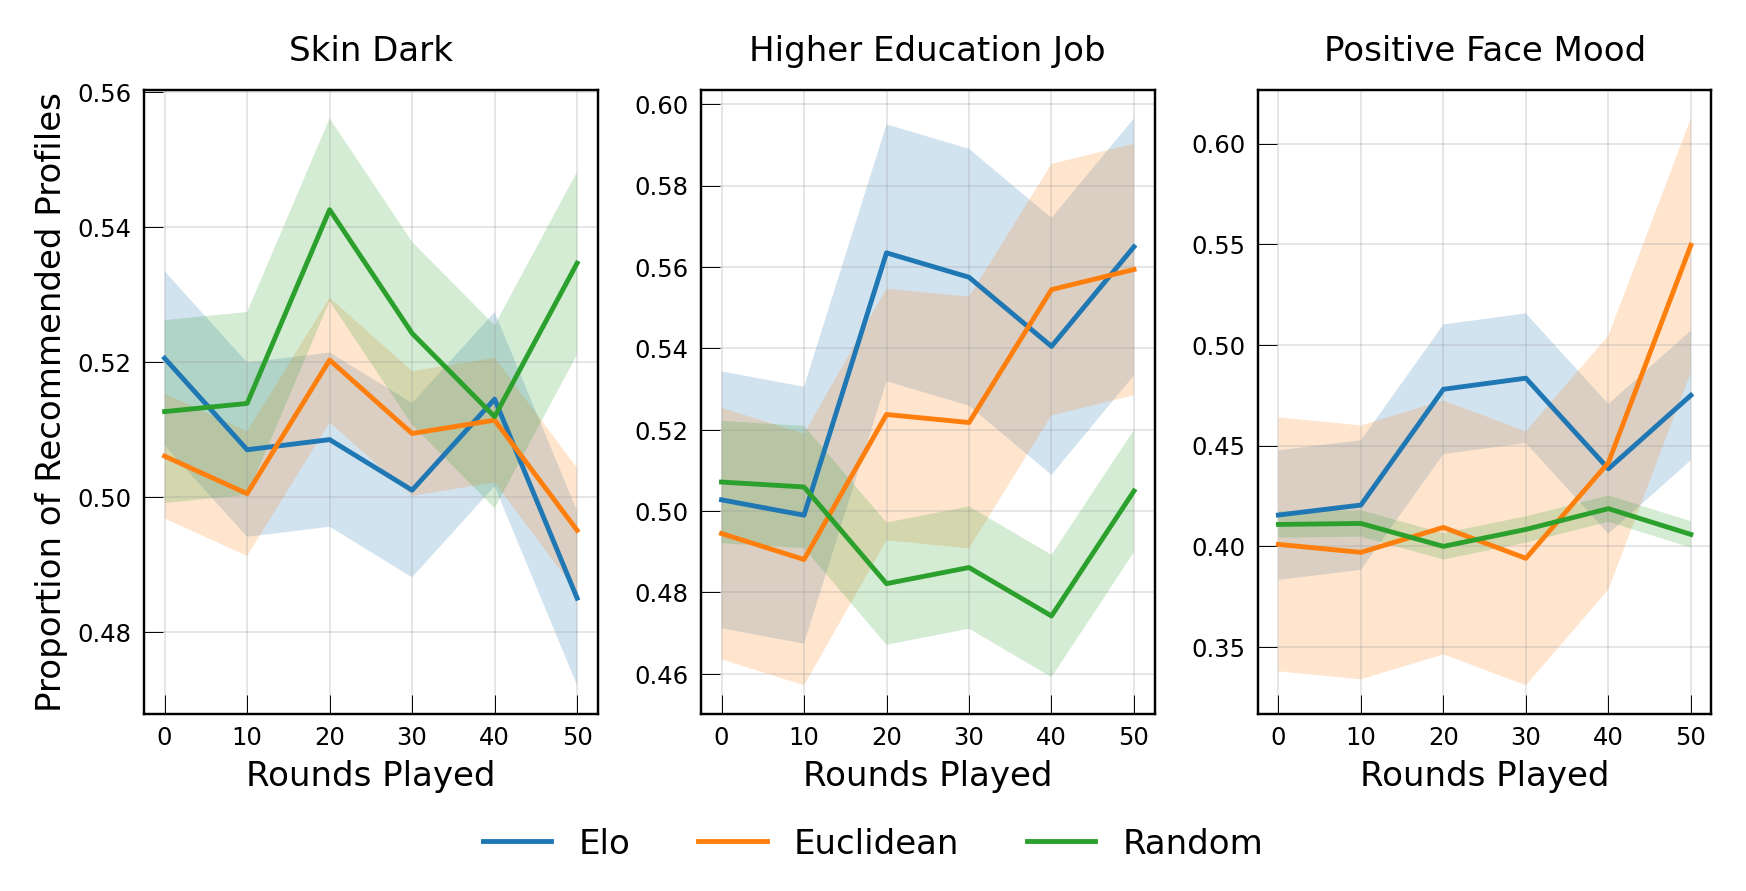

In [198]:
def bin_rounds(roundsPlayed, bin_size=10):
    return np.floor(roundsPlayed / bin_size) * bin_size

disliked_profiles = SwipeDecision_df.merge(character_df, left_on='dislikedProfile', right_on='profile_ID', suffixes=('', '_disliked'))
liked_profiles = SwipeDecision_df.merge(character_df, left_on='likedProfile', right_on='profile_ID', suffixes=('', '_liked'))
combined_profiles = pd.concat([disliked_profiles, liked_profiles])
combined_profiles = combined_profiles.merge(player_df, left_on='playerID', right_on='playerID')

# Binning roundsPlayed
combined_profiles['binned_rounds'] = bin_rounds(combined_profiles['roundsPlayed'])

proportions = combined_profiles.groupby(['recAlgorithm', 'binned_rounds']).apply(lambda x: pd.Series({
    'proportion_skin_dark': x['skin_dark'].mean(),
    'proportion_higher_education_job': (x['job_type'] == 'Degree Job').mean(),
    'proportion_positive_mood': (x['face_mood'] == 'positive').mean()
})).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(5, 2.5), dpi=350)

plot_params = [
    ('proportion_skin_dark', 'Skin Dark'),
    ('proportion_higher_education_job', 'Higher Education Job'),
    ('proportion_positive_mood', 'Positive Face Mood')
]

for ax, (y, title) in zip(axes, plot_params):
    for algo in proportions['recAlgorithm'].unique():
        data = proportions[proportions['recAlgorithm'] == algo]
        x = data['binned_rounds']
        y_vals = data[y]
        y_err = stats.sem(y_vals) * stats.t.ppf((1 + 0.95) / 2., len(y_vals)-1)
        
        ax.plot(x, y_vals, label=algo)
        ax.fill_between(x, y_vals - y_err, y_vals + y_err, alpha=0.2)
    
    ax.set_title(title)
    ax.set_xlabel('Rounds Played')
    ax.set_ylabel('')
#     ax.set_ylim(0.2, 0.7)

axes[0].set_ylabel('Proportion of Recommended Profiles')

for ax in axes:
    ax.legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, [label.capitalize() for label in labels], loc='lower center', ncol=len(labels), title='')

plt.tight_layout(rect=[0, 0.05, 1, 1])

plt.savefig("visualisations/attributes_of_recommended_characters.pdf", bbox_inches='tight')

plt.show()


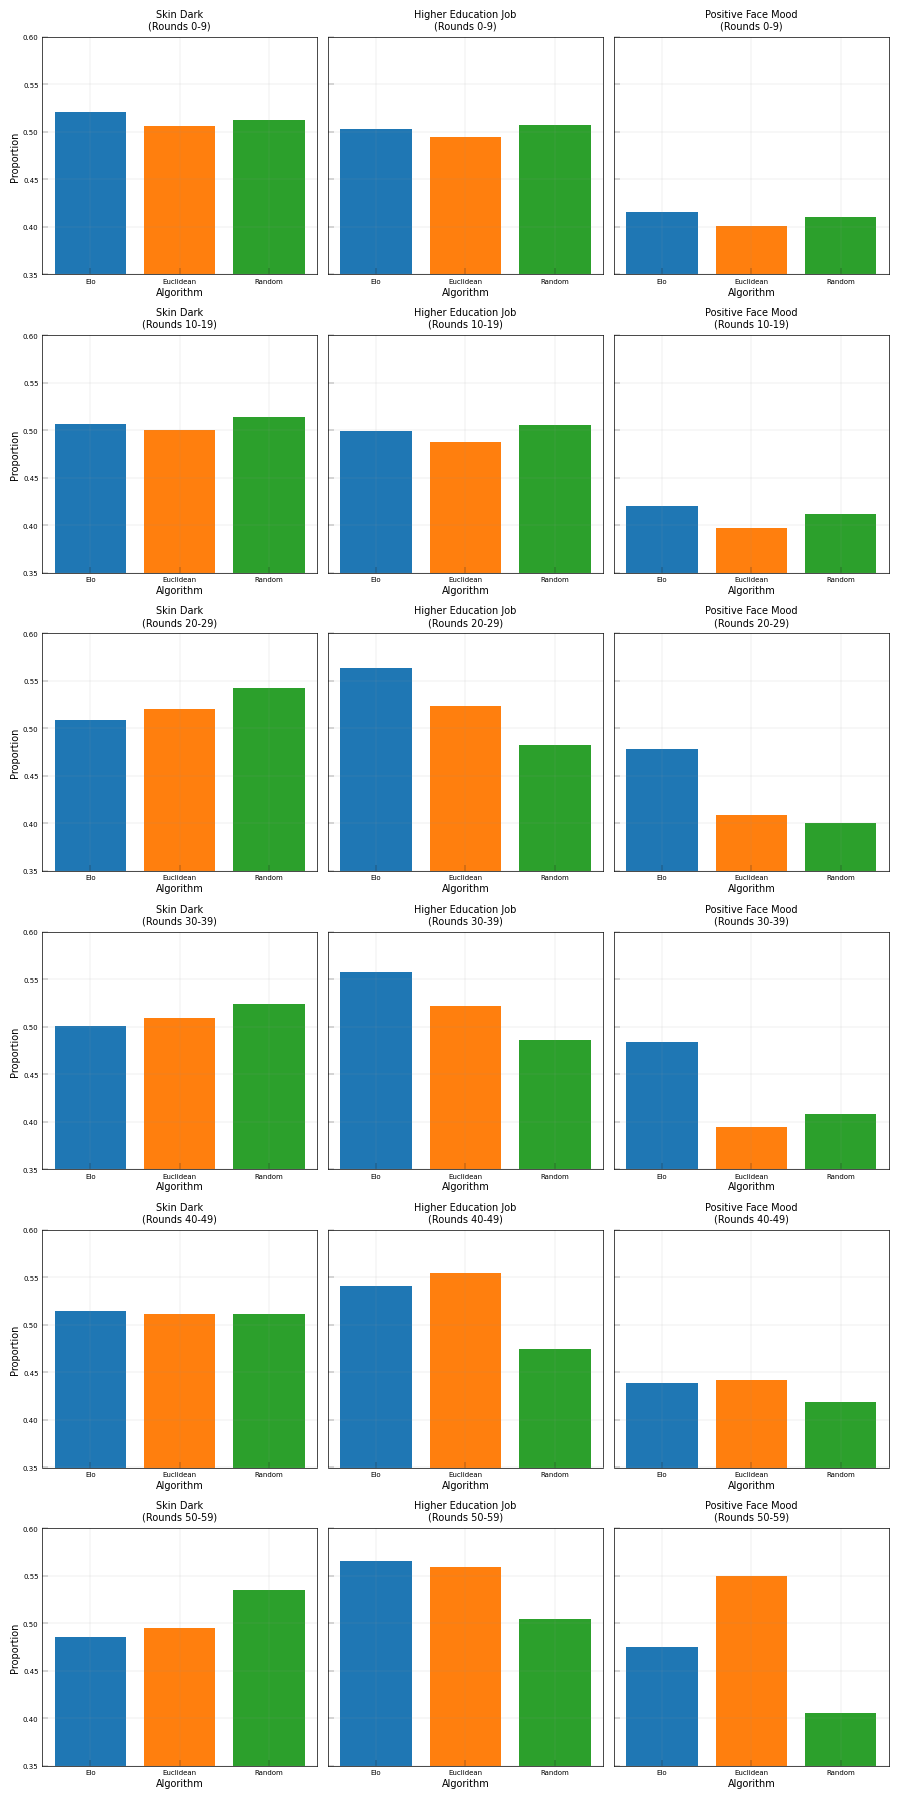

In [203]:
# Assuming SwipeDecision_df, character_df, player_df are predefined DataFrames
disliked_profiles = SwipeDecision_df.merge(character_df, left_on='dislikedProfile', right_on='profile_ID', suffixes=('', '_disliked'))
liked_profiles = SwipeDecision_df.merge(character_df, left_on='likedProfile', right_on='profile_ID', suffixes=('', '_liked'))
combined_profiles = pd.concat([disliked_profiles, liked_profiles])
combined_profiles = combined_profiles.merge(player_df, left_on='playerID', right_on='playerID')

# Binning roundsPlayed
combined_profiles['binned_rounds'] = bin_rounds(combined_profiles['roundsPlayed'])

proportions = combined_profiles.groupby(['recAlgorithm', 'binned_rounds']).apply(lambda x: pd.Series({
    'proportion_skin_dark': x['skin_dark'].mean(),
    'proportion_higher_education_job': (x['job_type'] == 'Degree Job').mean(),
    'proportion_positive_mood': (x['face_mood'] == 'positive').mean()
})).reset_index()

# Attributes and Binned Rounds
attributes = ['proportion_skin_dark', 'proportion_higher_education_job', 'proportion_positive_mood']
attribute_titles = ['Skin Dark', 'Higher Education Job', 'Positive Face Mood']
binned_rounds = sorted(proportions['binned_rounds'].unique())
algorithms = proportions['recAlgorithm'].unique()

# Subplot grid setup
n_rows = len(binned_rounds)
n_cols = len(attributes)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3), dpi=100, sharey=True)

# Creating the bar plots
for i, binned_round in enumerate(binned_rounds):
    for j, (attribute, title) in enumerate(zip(attributes, attribute_titles)):
        ax = axes[i, j]
        for algo in algorithms:
            data = proportions[(proportions['recAlgorithm'] == algo) & (proportions['binned_rounds'] == binned_round)]
            y_vals = data[attribute]
            y_err = stats.sem(y_vals) * stats.t.ppf((1 + 0.95) / 2., len(y_vals)-1)
            ax.bar(algo, y_vals, yerr=y_err, capsize=5)
        
        ax.set_title(f'{title}\n(Rounds {int(binned_round)}-{int(binned_round + 9)})')
        ax.set_xlabel('Algorithm')
        if j == 0:
            ax.set_ylabel('Proportion')
        if i == n_rows - 1:
            ax.set_xticklabels(algo for algo in algorithms)
        ax.set_ylim(0.35, 0.6)

plt.tight_layout()
plt.show()

### In what features were they similar to the characters they were recommended?

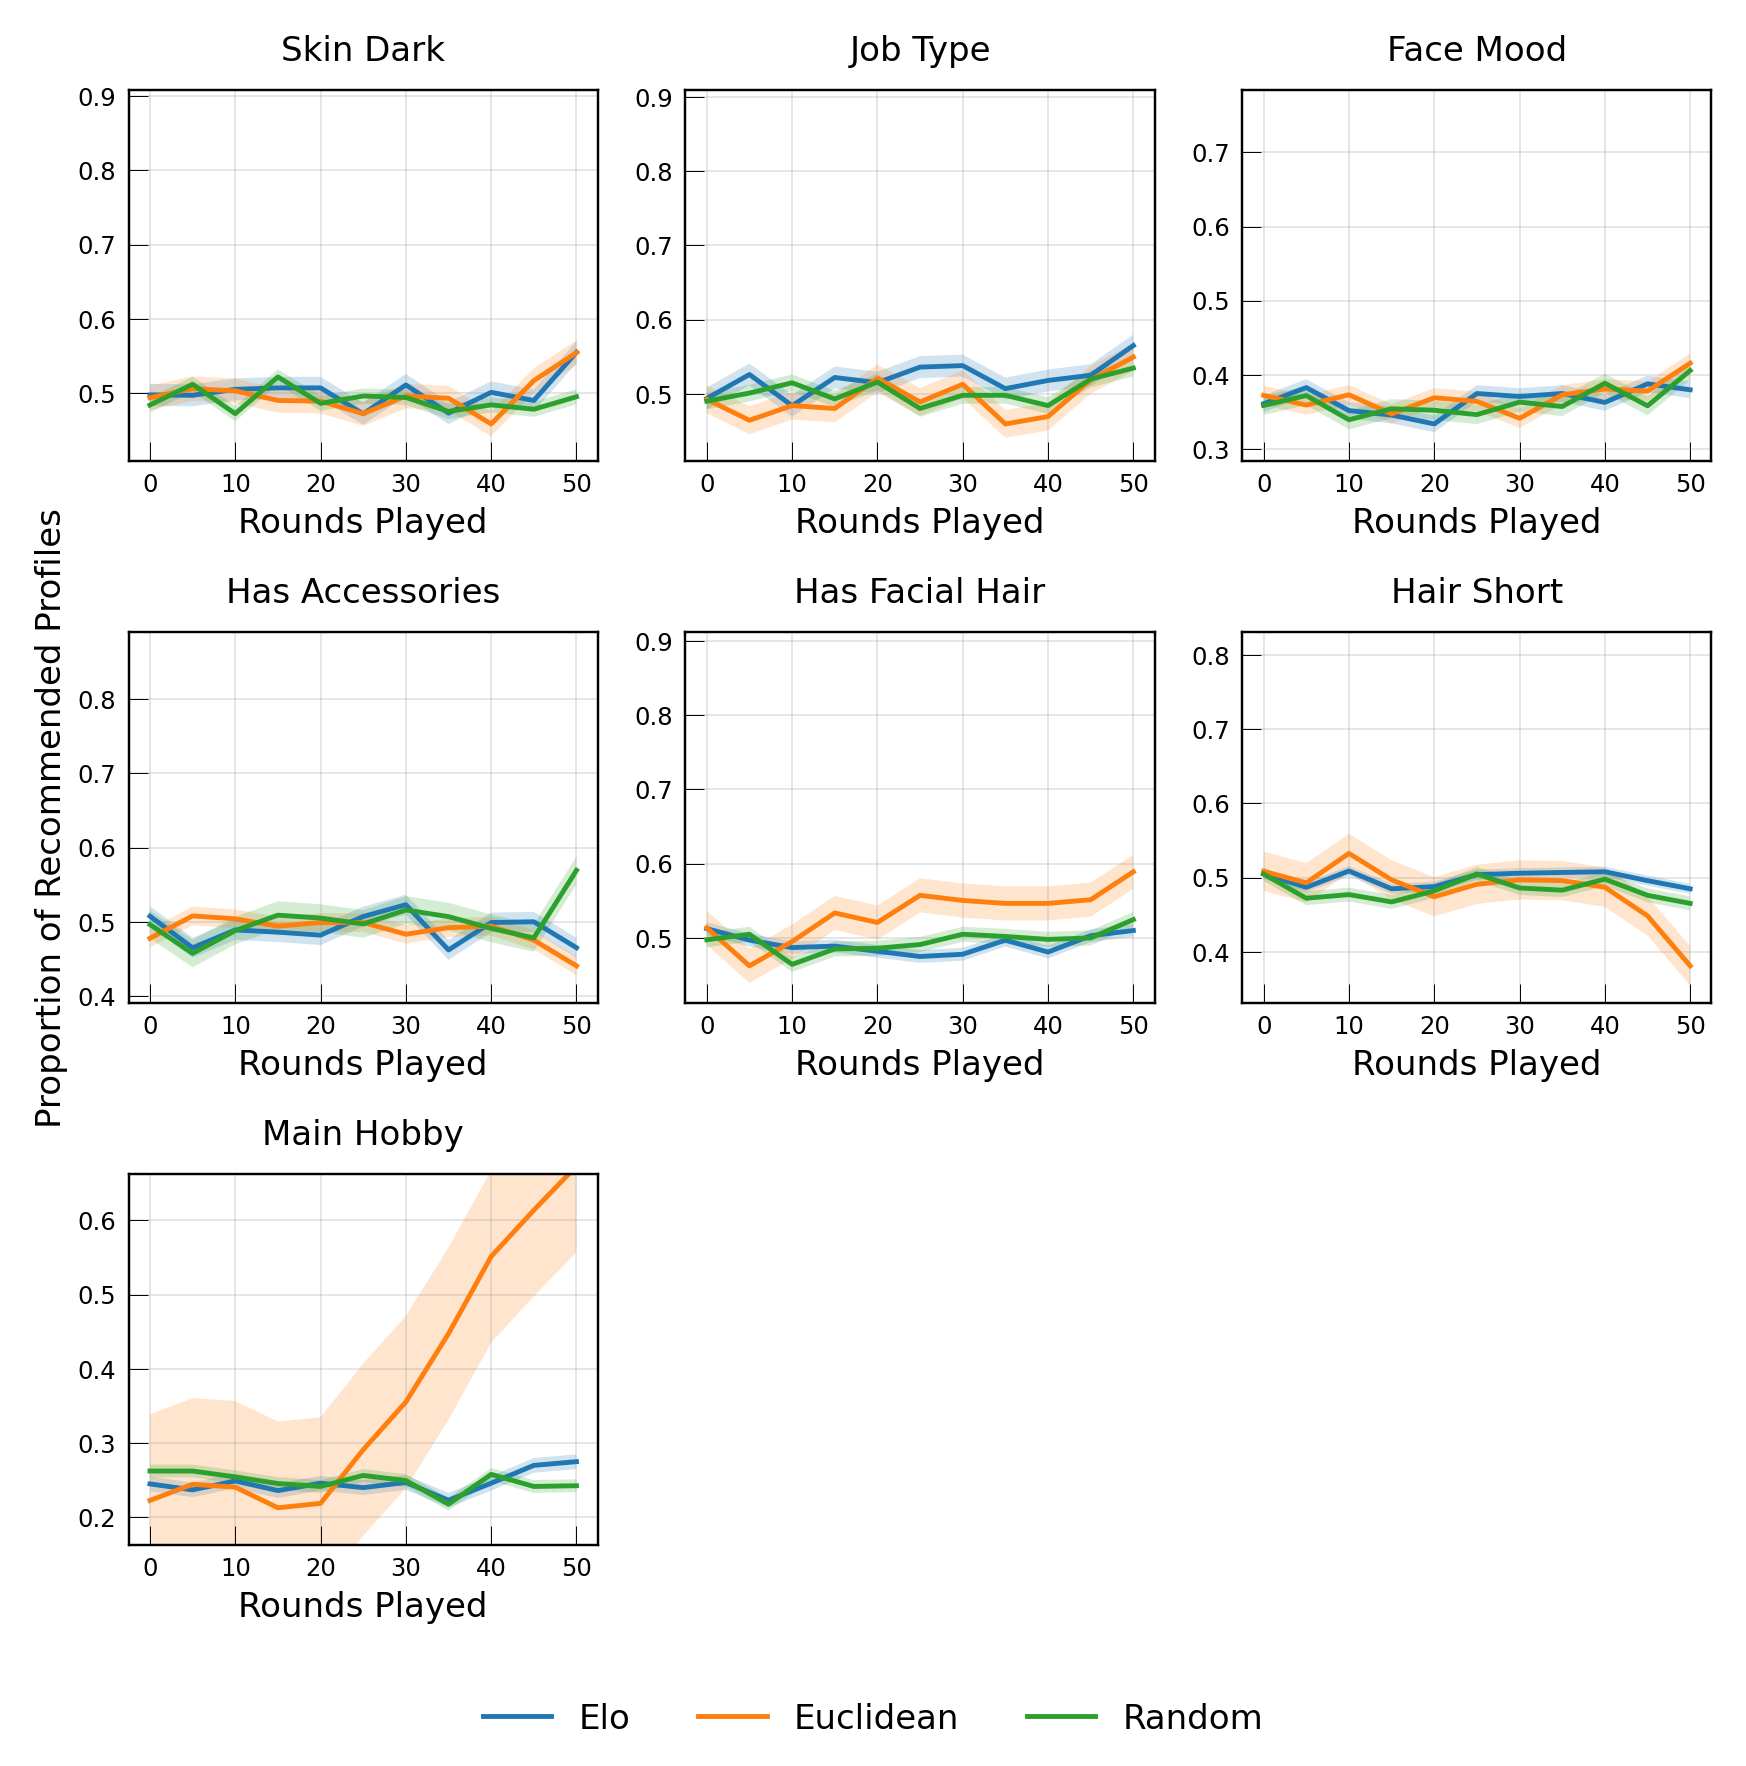

In [117]:
def bin_rounds(roundsPlayed, bin_size=5):
    return np.floor(roundsPlayed / bin_size) * bin_size

disliked_profiles = SwipeDecision_df.merge(character_df, left_on='dislikedProfile', right_on='profile_ID')
liked_profiles = SwipeDecision_df.merge(character_df, left_on='likedProfile', right_on='profile_ID')
combined_profiles = pd.concat([disliked_profiles, liked_profiles])
combined_profiles = combined_profiles.merge(player_df, left_on='playerID', right_on='playerID')
chosen_profiles = player_df.merge(character_df, left_on='chosenProfile', right_on='profile_ID')

attributes = ['skin_dark', 'job_type', 'face_mood', 'has_accessories', 'has_facial_hair', 'hair_short', 'main_hobby']
chosen_attributes = [attr + '_chosen' for attr in attributes]
combined_profiles = combined_profiles.merge(
    chosen_profiles[['playerID'] + attributes],
    on='playerID',
    suffixes=('', '_chosen')
)

combined_profiles['binned_rounds'] = bin_rounds(combined_profiles['roundsPlayed'])

proportions = combined_profiles.groupby(['recAlgorithm', 'binned_rounds']).apply(lambda x: pd.Series({
    f'proportion_{attr}': (x[attr] == x[f'{attr}_chosen']).mean() for attr in attributes
})).reset_index()

num_attributes = len(attributes)
num_rows = (num_attributes + 2) // 2

fig, axes = plt.subplots(3, 3, figsize=(5, 5), dpi=350)
axes = axes.flatten()

for i, attr in enumerate(attributes):
    for algo in proportions['recAlgorithm'].unique():
        data = proportions[proportions['recAlgorithm'] == algo]
        x = data['binned_rounds']
        y_vals = data[f'proportion_{attr}']
        y_err = stats.sem(y_vals) * stats.t.ppf((1 + 0.95) / 2., len(y_vals)-1)

        axes[i].plot(x, y_vals, label=algo)
        axes[i].fill_between(x, y_vals - y_err, y_vals + y_err, alpha=0.2)
    
    axes[i].set_title(f'{attr.replace("_", " ").title()}')
    axes[i].set_xlabel('Rounds Played')
    
    if i == 3:
        axes[i].set_ylabel('Proportion of Recommended Profiles')
    else:
        axes[i].set_ylabel('')
    
    min_value = proportions[f'proportion_{attr}'].min() - 0.05
    y_min = min_value
    y_max = y_min + 0.5
    axes[i].set_ylim(y_min, y_max)
    axes[i].legend().remove()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, [label.capitalize() for label in labels], loc='lower center', ncol=len(labels), title='')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("visualisations/similarity_of_recommended_vs_picked_character.pdf", bbox_inches='tight')

plt.show()


In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

def bin_rounds(roundsPlayed, bin_size=5):
    return np.floor(roundsPlayed / bin_size) * bin_size

disliked_profiles = SwipeDecision_df.merge(character_df, left_on='dislikedProfile', right_on='profile_ID')
liked_profiles = SwipeDecision_df.merge(character_df, left_on='likedProfile', right_on='profile_ID')
combined_profiles = pd.concat([disliked_profiles, liked_profiles])
combined_profiles = combined_profiles.merge(player_df, left_on='playerID', right_on='playerID')
chosen_profiles = player_df.merge(character_df, left_on='chosenProfile', right_on='profile_ID')

attributes = ['skin_dark', 'job_type', 'face_mood', 'has_accessories', 'has_facial_hair', 'hair_short', 'main_hobby']
chosen_attributes = [attr + '_chosen' for attr in attributes]
combined_profiles = combined_profiles.merge(
    chosen_profiles[['playerID'] + attributes],
    on='playerID',
    suffixes=('', '_chosen')
)
combined_profiles['face_mood'] = combined_profiles['face_mood'].replace(['neutral', 'negative'], 'negative/neutral')
combined_profiles['face_mood_chosen'] = combined_profiles['face_mood_chosen'].replace(['neutral', 'negative'], 'negative/neutral')

combined_profiles['binned_rounds'] = bin_rounds(combined_profiles['roundsPlayed'])

In [206]:
chosen_profiles.columns

Index(['id', 'chosenProfile', 'playerID', 'participantIdentifier',
       'recAlgorithm', 'ended', 'feedback', 'Status', 'Started at',
       'Completed at', 'Time taken', 'Dating apps', 'Gender', 'Age', 'Sex',
       'Ethnicity simplified', 'Country of birth', 'Country of residence',
       'Nationality', 'Language', 'Student status', 'Employment status',
       'accessories', 'face', 'facial_hair', 'hair', 'pose', 'skin_tone',
       'age', 'main_hobby', 'hobby_1', 'hobby_2', 'hair_color',
       'clothes_color', 'job_type', 'job', 'hair_short', 'face_mood',
       'body_has_color', 'skin_dark', 'has_facial_hair', 'has_accessories',
       'profile_ID'],
      dtype='object')

In [207]:
chosen_profiles['face_mood'] = chosen_profiles['face_mood'].replace(['neutral', 'negative'], 'negative/neutral')

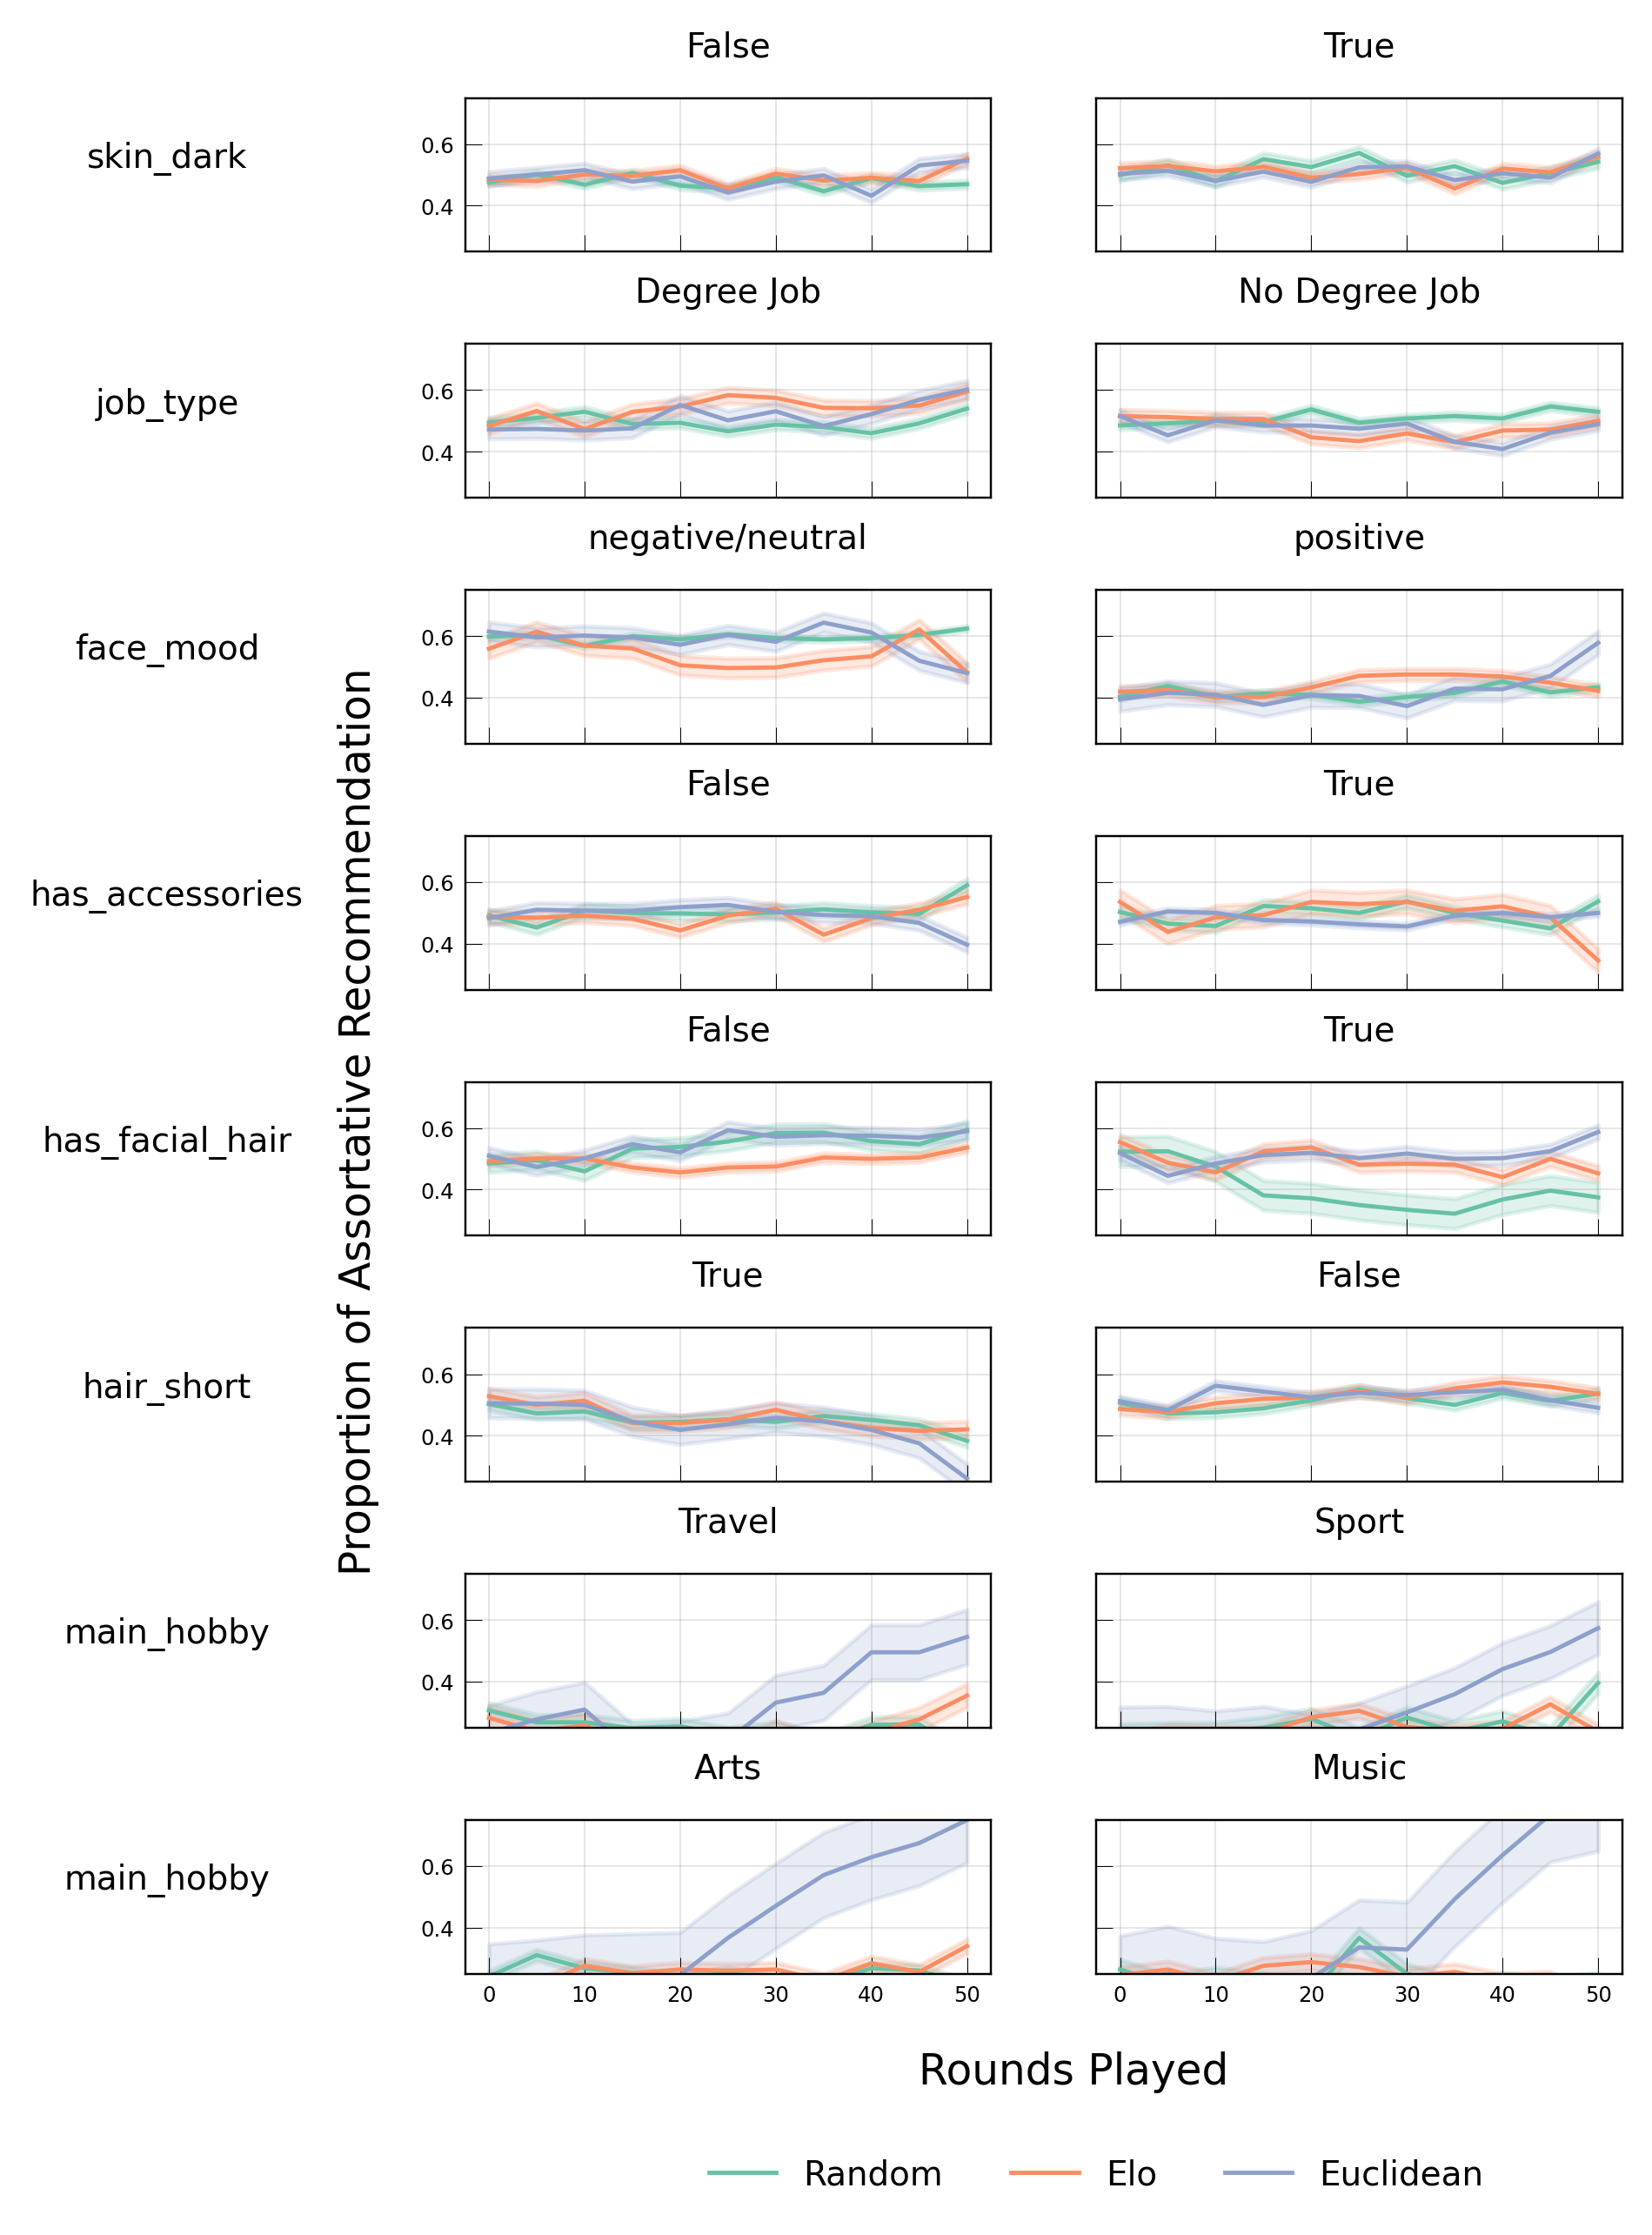

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

def bin_rounds(roundsPlayed, bin_size=1):
    return np.floor(roundsPlayed / bin_size) * bin_size

# Calculate the number of rows and columns for the subplots
num_rows = len(attributes) + 1  # Add an extra row for splitting "hobbies"
num_columns = 2  # We are forcing a maximum of 2 columns per row

fig, axes = plt.subplots(num_rows, num_columns, figsize=(5, 8), dpi=350, sharex=True, sharey=True)

# Flatten axes array for easy indexing
axes = axes.flatten()

fig_idx = 0

for i, attr in enumerate(attributes):
    unique_values = chosen_profiles[attr].unique()

    if attr == "hobbies":
        for j, value in enumerate(unique_values):
            ax = axes[fig_idx]
            fig_idx += 1
            for algo in combined_profiles['recAlgorithm'].unique():
                data = combined_profiles[(combined_profiles['recAlgorithm'] == algo) & (combined_profiles[f'{attr}_chosen'] == value)]
                if len(data) > 0:
                    x = data['binned_rounds']
                    y_vals = (data[attr] == value).groupby(data['binned_rounds']).mean()
                    y_err = y_vals.sem() * stats.t.ppf((1 + 0.95) / 2., len(y_vals) - 1)

                    ax.plot(y_vals.index, y_vals.values, label=algo, color=algorithm_colours.get(algo, '#000000'))
                    ax.fill_between(y_vals.index, y_vals.values - y_err, y_vals.values + y_err, alpha=0.2, color=algorithm_colours.get(algo, '#000000'))

            ax.set_xlim(-0.05, 1.05)
            ax.set_ylim(0, 1)

            # Set y-axis label for the first column only
            if j % num_columns == 0:
                ax.set_ylabel(f'{value.replace("_", " ").title()}', rotation=0, labelpad=60, size=8)

            ax.set_xlabel('Rounds Played', fontsize=8)

    else:
        for j, value in enumerate(unique_values):
            ax = axes[fig_idx]
            fig_idx += 1
            for algo in combined_profiles['recAlgorithm'].unique():
                data = combined_profiles[(combined_profiles['recAlgorithm'] == algo) & (combined_profiles[f'{attr}_chosen'] == value)]
                if len(data) > 0:
                    x = data['binned_rounds']
                    y_vals = (data[attr] == value).groupby(data['binned_rounds']).mean()
                    y_err = y_vals.sem() * stats.t.ppf((1 + 0.95) / 2., len(y_vals) - 1)

                    ax.plot(y_vals.index, y_vals.values, label=algo, color=algorithm_colours.get(algo, '#000000'))
                    ax.fill_between(y_vals.index, y_vals.values - y_err, y_vals.values + y_err, alpha=0.2, color=algorithm_colours.get(algo, '#000000'))

#             ax.set_xlim(-0.05, 1.05)
            ax.set_ylim(0.25, 0.75)

            # Set y-axis label for the first column only
            if j % num_columns == 0:
                ax.set_ylabel(f'{attr}', rotation=0, labelpad=60, size=8)
            ax.set_title(f'{value}', rotation=0, size=8, pad=10)  # Adjusted padding

#             ax.set_xlabel('Rounds Played', fontsize=8)

# Hide any unused subplots
for ax in axes[fig_idx:]:
    fig.delaxes(ax)

# Add figure-level annotations
fig.text(0.52, 0.11, 'Rounds Played', ha='center', va='center', size=10)
fig.text(0.05, 0.5, "Proportion of Assortative Recommendation", ha='center', va='center', rotation='vertical', size=10)

# Adjust legend
plt.legend(title='', bbox_to_anchor=(0, -1), loc='upper center', ncol=3, fontsize=8)

# Adjust layout to reduce spacing between plots
plt.tight_layout(rect=[0.05, 0.04, 1, 0.95])
plt.subplots_adjust(left=0.12, right=0.88, top=0.92, bottom=0.15, hspace=0.6, wspace=0.2)

# Save and show the plot
plt.savefig("visualisations/similarity_of_recommended_vs_picked_character_by_attribute.pdf", bbox_inches='tight')
plt.show()


### How does their level or bias correlate with what they are shown?

In [522]:
preferences_mean_df.columns

Index(['young', 'hair_short', 'skin_dark', 'has_facial_hair',
       'has_accessories', 'job_type_higher_ed', 'face_positive',
       'main_hobby_Arts', 'main_hobby_Music', 'main_hobby_Sport',
       'main_hobby_Travel', 'playerID'],
      dtype='object')

In [523]:
preferences_mean_df = preferences_mean_df.astype({col: float for col in preferences_mean_df.columns if col != 'playerID'})
preferences_variance_df = preferences_variance_df.astype({col: float for col in preferences_variance_df.columns if col != 'playerID'})
preferences_n_df = preferences_n_df.astype({col: float for col in preferences_n_df.columns if col != 'playerID'})


z_score =  0
standard_error_df = preferences_variance_df.drop(columns=['playerID']) / np.sqrt(preferences_n_df.drop(columns=['playerID']))

uci_values_df = preferences_mean_df.drop(columns=['playerID']) + z_score * standard_error_df

uci_values_df = uci_values_df.astype(float)

preferences_uci_df = pd.concat([preferences_mean_df[['playerID']], uci_values_df], axis=1)

preferences_mean_df_merged = preferences_uci_df.merge(player_df[['chosenProfile', 'recAlgorithm', 'playerID']], on = 'playerID', how = 'left')

columns_to_suffix = [
    'young', 'hair_short', 'skin_dark', 'has_facial_hair', 'has_accessories',
    'job_type_higher_ed', 'face_positive', 'main_hobby_Arts', 'main_hobby_Music',
    'main_hobby_Sport', 'main_hobby_Travel'
]
preferences_mean_df_merged = preferences_mean_df_merged.rename(
    columns={col: f"{col}_preference" for col in columns_to_suffix}
)

merged_liked = SwipeDecision_df.merge(character_df_encoded, left_on='likedProfile', right_on='profile_ID', suffixes=('', '_liked'))
merged_disliked = SwipeDecision_df.merge(character_df_encoded, left_on='dislikedProfile', right_on='profile_ID', suffixes=('', '_disliked'))
combined_df = pd.concat([merged_liked, merged_disliked], ignore_index=True)



bins = [0, 10, 20, 30, 40, 50]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50']
combined_df['rounds_group'] = pd.cut(combined_df['roundsPlayed'], bins=bins, labels=labels)

results = []

traits = ['young', 'job_type_higher_ed', 'hair_short', 'face_positive', 'skin_dark', 'has_facial_hair', 'has_accessories', 'main_hobby_Arts', 'main_hobby_Music', 'main_hobby_Sport', 'main_hobby_Travel']

grouped = combined_df.groupby(['playerID', 'rounds_group'])

for (playerID, rounds_group), group in grouped:
    total_profiles = len(group)
    proportions = {'playerID': playerID, 'rounds_group': rounds_group, 'total_profiles': total_profiles}
    
    for trait in traits:
        proportion_with_trait = group[trait].sum() / total_profiles if total_profiles > 0 else 0
        proportions[trait] = proportion_with_trait
    
    results.append(proportions)

proportion_df = pd.DataFrame(results)

merged_df = proportion_df.merge(preferences_mean_df_merged, on='playerID')

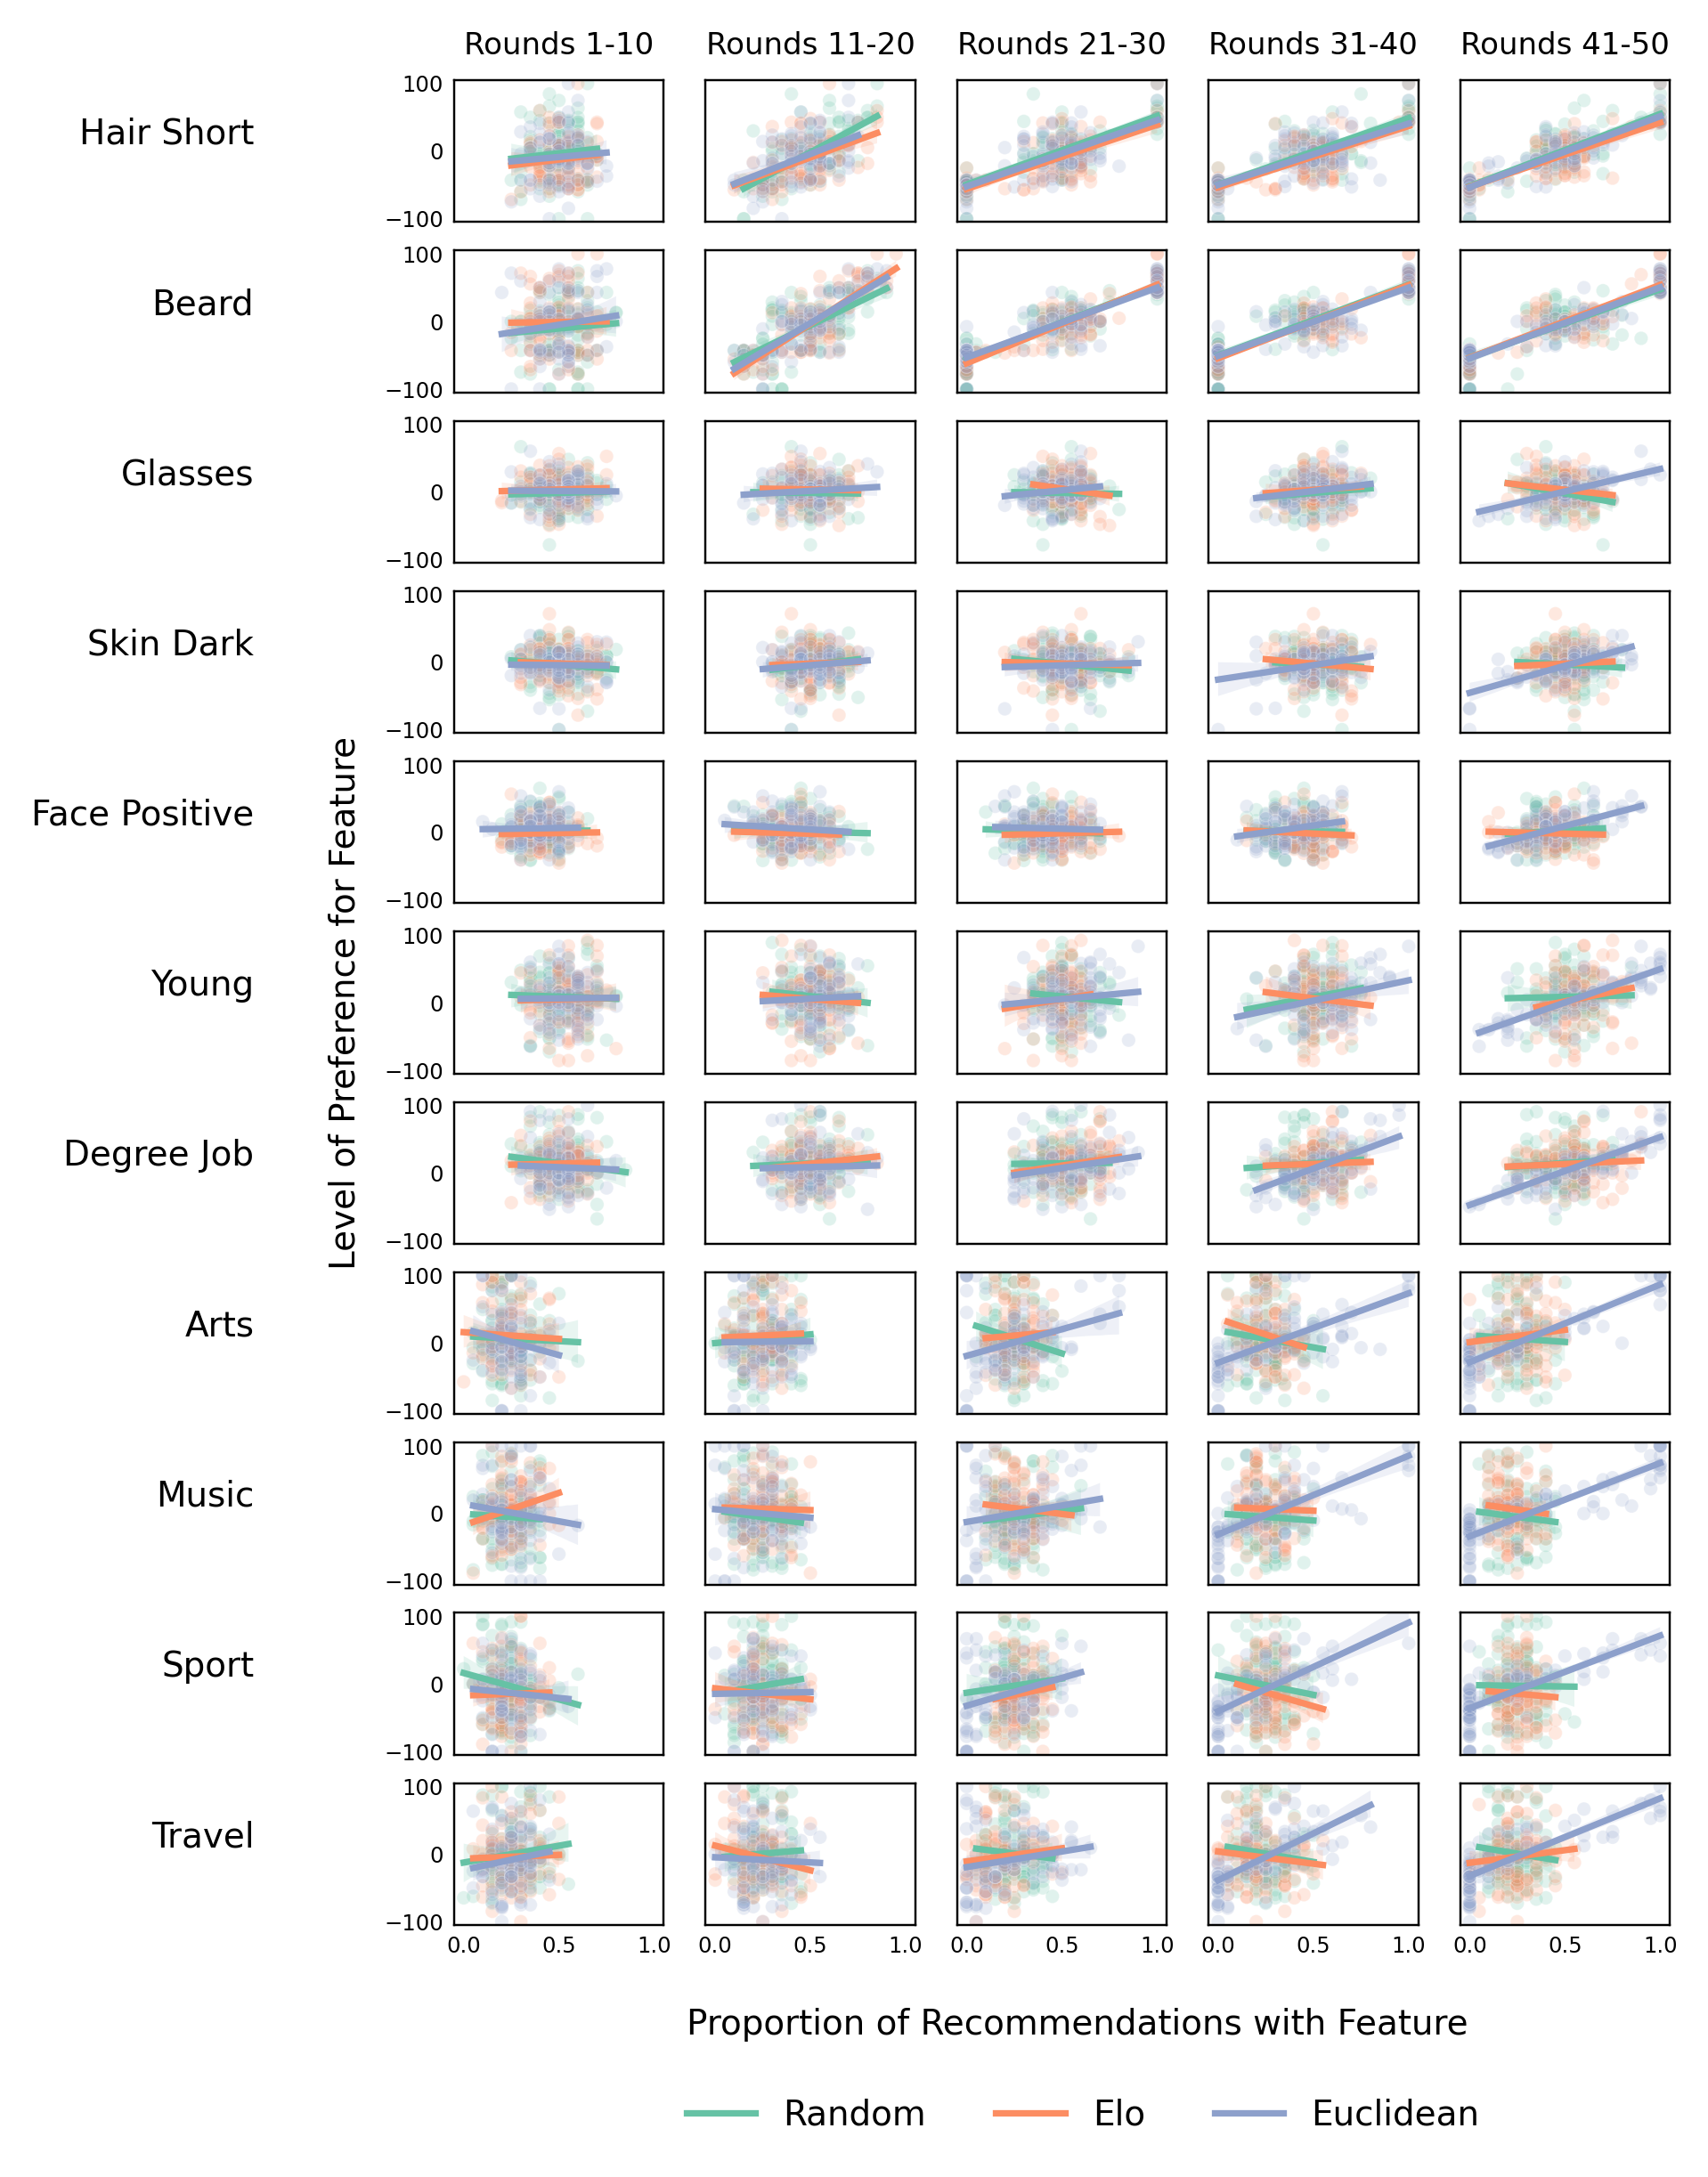

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

# Desired order for modified traits
desired_order = ['hair_short', 'Beard', 'Glasses', 'skin_dark', 'face_positive', 'young', 'Degree Job', 'Arts', 'Music', 'Sport', 'Travel']

# Prepare modified traits for labeling
modified_traits = [trait.replace('main_hobby_', '').replace('job_type_higher_ed', 'Degree Job').replace('has_accessories', 'Glasses').replace('has_facial_hair', 'Beard') for trait in traits]

# Reorder traits and modified_traits based on desired_order
ordered_pairs = sorted(zip(modified_traits, traits), key=lambda x: desired_order.index(x[0]))
modified_traits, traits = zip(*ordered_pairs)

# Set up subplots: traits as rows, rounds as columns
fig, axes = plt.subplots(len(traits), len(labels), figsize=(5, 8), sharex='col', sharey='row', dpi=350)

# Loop through traits and rounds to create subplots
for i, (trait, mod_trait) in enumerate(zip(traits, modified_traits)):
    for j, rounds_group in enumerate(labels):
        ax = axes[i, j]

        # Filter data for current round group
        current_data = merged_df[merged_df['rounds_group'] == rounds_group]

        x = current_data[trait]
        y = current_data[f'{trait}_preference']
        hue = current_data['recAlgorithm']

        # Create scatter plot with smaller dots
        sns.scatterplot(x=x, y=y, hue=hue, ax=ax, palette=algorithm_colours, legend=False, alpha=0.2, s=10)

        # Plot regression lines for each algorithm
        unique_algorithms = current_data['recAlgorithm'].unique()
        for algorithm in unique_algorithms:
            algorithm_data = current_data[current_data['recAlgorithm'] == algorithm]
            sns.regplot(x=algorithm_data[trait], y=algorithm_data[f'{trait}_preference'], ax=ax, scatter=False, label=algorithm, color=algorithm_colours.get(algorithm, '#000000'))

        ax.set_xlim(-0.05, 1.05)
        ax.set_ylim(-105, 105)

        # Set y-axis label for the first column only
        if j == 0:
            ax.set_ylabel(f'{mod_trait.replace("_", " ").title()}', rotation=0, labelpad=30, size=8, ha='right')
        else:
            ax.set_ylabel('')  # Remove y-label for other columns

        # Set x-axis label for the bottom row only
        if i == len(traits) - 1:
            ax.set_xlabel('', fontsize=8)
        else:
            ax.set_xlabel('')

        # Remove background grid
        ax.grid(False)

        # Remove ticks but keep the tick labels
        ax.tick_params(axis='both', which='both', length=0)

# Add titles for each column
for ax, rounds_group in zip(axes[0], labels):
    ax.set_title(f'Rounds {rounds_group}', fontsize=7)

# Add figure-level annotations

# x, y
fig.text(0.52, 0.14, 'Proportion of Recommendations with Feature', ha='center', va='center', size=8)
fig.text(0.05, 0.55, 'Level of Preference for Feature', ha='center', va='center', rotation='vertical', size=8)

# Adjust legend
plt.legend(title='', bbox_to_anchor=(-1.8, -1), loc='upper center', ncol=3, fontsize=8)
# Tight layout and adjust
fig.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.subplots_adjust(left=0.12, right=0.9, top=0.92, bottom=0.18)

# Save and show the plot
plt.savefig("visualisations/preference_vs_proportion_by_trait_by_round.pdf", bbox_inches='tight')
plt.show()


In [691]:
preferences_mean_df = preferences_mean_df.astype({col: float for col in preferences_mean_df.columns if col != 'playerID'})
preferences_variance_df = preferences_variance_df.astype({col: float for col in preferences_variance_df.columns if col != 'playerID'})
preferences_n_df = preferences_n_df.astype({col: float for col in preferences_n_df.columns if col != 'playerID'})


z_score =  0
standard_error_df = preferences_variance_df.drop(columns=['playerID']) / np.sqrt(preferences_n_df.drop(columns=['playerID']))

uci_values_df = preferences_mean_df.drop(columns=['playerID']) + z_score * standard_error_df

uci_values_df = uci_values_df.astype(float)

preferences_uci_df = pd.concat([preferences_mean_df[['playerID']], uci_values_df], axis=1)

preferences_mean_df_merged = preferences_uci_df.merge(player_df[['chosenProfile', 'recAlgorithm', 'playerID']], on = 'playerID', how = 'left')

columns_to_suffix = [
    'young', 'hair_short', 'skin_dark', 'has_facial_hair', 'has_accessories',
    'job_type_higher_ed', 'face_positive', 'main_hobby_Arts', 'main_hobby_Music',
    'main_hobby_Sport', 'main_hobby_Travel'
]
preferences_mean_df_merged = preferences_mean_df_merged.rename(
    columns={col: f"{col}_preference" for col in columns_to_suffix}
)

merged_liked = SwipeDecision_df.merge(character_df_encoded, left_on='likedProfile', right_on='profile_ID', suffixes=('', '_liked'))
merged_disliked = SwipeDecision_df.merge(character_df_encoded, left_on='dislikedProfile', right_on='profile_ID', suffixes=('', '_disliked'))
combined_df = pd.concat([merged_liked, merged_disliked], ignore_index=True)

In [692]:
combined_df

id  roundsPlayed  dislikedProfile  \
0      01J1TR1HBWA0YCE280W5QA1AQ3            16              100   
1      01J1TSVE5V7W9GFMC9AN285BQK            34               37   
2      01J1TTJGV6P767NM4QPE9QVRXZ            34              148   
3      01J1TR7JMW2E40AGKD5KSYAWMD            35              128   
4      01J1MXG3NRC73N4AQYS7VZF85N            29              181   
...                           ...           ...              ...   
30193  01J3EBJNAH81HE3KQZ9AESR4TP            43               51   
30194  01J3EABF06BK6JKCE7Q3D63QSD            46               51   
30195  01J3DZ5E93QA325SJC46XBMRV4            32               51   
30196  01J3E2C58AM5J9NE5VB202K3WY            27               51   
30197  01J3DRW43SS2C221Q1VD02HCJK            21               51   

       likedProfile strongPreferenceDetected     strongPreferences  \
0               248                     True          ["longHair"]   
1               248                     True          ["longHair"]   
2               248                     True           ["noBeard"]   
3               248                     True           ["noBeard"]   
4               248                    False                    []   
...             ...                      ...                   ...   
30193           105                     True  ["beard","longHair"]   
30194            53                     True             ["beard"]   
30195           116                     True          ["longHair"]   
30196           118                     True  ["beard","longHair"]   
30197           215                    False                    []   

                          batchID                      gameID  \
0      01J1TPRQR0AQARK30XQ4RJQ9N2  01J1TPRQT9BCPBZG5ERGXTEXZV   
1      01J1TPRQR0AQARK30XQ4RJQ9N2  01J1TPRQT4AFY9Y2QS6V17HQ2C   
2      01J1TPRQR0AQARK30XQ4RJQ9N2  01J1TPRQV5NQ4RBH74KEMRXJWJ   
3      01J1TPRQR0AQARK30XQ4RJQ9N2  01J1TPRQTDR101X78RW058CF7R   
4      01J1MVFFXJVAHG57XFST4Q2TJR  01J1MVFG0YNHSFF4VPEFEQ2TEE   
...                           ...                         ...   
30193  01J3E5J41G3RZNNV81PQS1ZN6W  01J3E5J4AQB98XJ4JWF7CBX130   
30194  01J3E5J41G3RZNNV81PQS1ZN6W  01J3E5J47RSV7SWYDB2VRB4TTF   
30195  01J3DY8R7QSZYKAJJ3PKCD7BH8  01J3DY8RERD6QEZRZM6D841MCH   
30196  01J3DY8R7QSZYKAJJ3PKCD7BH8  01J3DY8RDS7Q6GE13DJ3GGQW66   
30197  01J3DMCSNHRP3MV6GSMWBFJ55D  01J3DMCSZSXJTBCP2N6A6P9PM6   

                         playerID                     roundID  ...  \
0      01J1TQTERTVXPBN1RB1E4KVWQV  01J1TQTNV52EW3B4TYHC3WYEWJ  ...   
1      01J1TSBC1JBYGJ3PRK05CRMF3K  01J1TSGN9YTNGTEYV5SKHKV94H  ...   
2      01J1TSJPARN3CB8YRHEWD4PPG9  01J1TSM055T0FCECCP43W78R6J  ...   
3      01J1TQNANBFZV7M6VRM670890H  01J1TQNP821H2EBMD82PJEAKSC  ...   
4      01J1MX6FWV8HSSA91H691AJRPY  01J1MX6H78E5GFHFK88XTAR9QF  ...   
...                           ...                         ...  ...   
30193  01J3EAQ7JPNNFK3NGNJZ4PY98N  01J3EASHAH5DXEAAKTR0B7QN3R  ...   
30194  01J3E9QH9FGSG74H7XENNF67P9  01J3E9QYMJA3A97Y8R8HE153KG  ...   
30195  01J3DYP3J88DFFPRMTRK0JRZZB  01J3DYQ1MGKDA0V35GWYNFB1Z2  ...   
30196  01J3E22JE9T3CJPY6C4VREBDCY  01J3E22Q75MZB20YWF9TCXMC7V  ...   
30197  01J3DRJSFH2VN7R82TY83BTE2Y  01J3DRK4GC7VJNTQRKPYJZ5TTF  ...   

       hair_short  face_positive  skin_dark  has_facial_hair  has_accessories  \
0           False           True       True            False            False   
1           False           True       True            False            False   
2           False           True       True            False            False   
3           False           True       True            False            False   
4           False           True       True            False            False   
...           ...            ...        ...              ...              ...   
30193       False           True      False             True             True   
30194       False           True      False             True             True   
30195       False     

In [693]:
SwipeDecision_merged = SwipeDecision_df.merge(player_df[['chosenProfile', 'playerID', 'recAlgorithm']], how = 'left', on = 'playerID')
SwipeDecision_merged.columns

match_df = pd.DataFrame(columns=['id1','playerID1', 'roundsPlayed1', 'chosenProfile1', 'recAlgorithm1',
                                 'id2','playerID2', 'roundsPlayed2', 'chosenProfile2', 'recAlgorithm2'])

for index, row in SwipeDecision_merged.iterrows():
    chosen_profile = row['chosenProfile']
    liked_profile = row['likedProfile']

    reverse_match = SwipeDecision_merged[
        (SwipeDecision_merged['chosenProfile'] == liked_profile) & 
        (SwipeDecision_merged['likedProfile'] == chosen_profile)
    ]

    for _, reverse_row in reverse_match.iterrows():
        if row['id'] != reverse_row['id']:
            match_df = match_df.append({
                'id1':row['id'],
                'playerID1': row['playerID'],
                'roundsPlayed1': row['roundsPlayed'],
                'chosenProfile1': row['chosenProfile'],
                'recAlgorithm1': row['recAlgorithm'],
                'id2':reverse_row['id'],
                'playerID2': reverse_row['playerID'],
                'roundsPlayed2': reverse_row['roundsPlayed'],
                'chosenProfile2': reverse_row['chosenProfile'],
                'recAlgorithm2': reverse_row['recAlgorithm']
            }, ignore_index=True)

match_df = match_df.drop_duplicates()


In [703]:
# filter to only same algorithm:
match_df = match_df[match_df['recAlgorithm1']==match_df['recAlgorithm2']]
#.columns

In [704]:
combined_matches =  pd.concat([
    match_df[['id1', 'playerID1', 'roundsPlayed1', 'chosenProfile1', 'recAlgorithm1']].rename(
        columns=lambda x: x[:-1]),
    match_df[['id2', 'playerID2', 'roundsPlayed2', 'chosenProfile2', 'recAlgorithm2']].rename(
        columns=lambda x: x[:-1])
], ignore_index=True)

In [705]:
combined_matches

id                    playerID roundsPlayed  \
0     01J1TR898ZC78RADMRK2XW52DZ  01J1TQNANBFZV7M6VRM670890H           36   
1     01J1TT7R1KSB7PMN9685Y7HA7Z  01J1TSJPARN3CB8YRHEWD4PPG9           12   
2     01J1TR13ZY6DK66G85E3RWAY0D  01J1TQYM9CW5N1SZKRHQ6QXMB3            4   
3     01J1TTHQV9VSTJHRP1652MK931  01J1TSJPARN3CB8YRHEWD4PPG9           31   
4     01J1TR6DW47EC9BK33HYZTJH1B  01J1TQYM9CW5N1SZKRHQ6QXMB3           15   
...                          ...                         ...          ...   
3027  01J3DR6GYNFPB59EHYQ6T2RXHY  01J3DQX2MB4CVDA0BSP8FF6N8G           19   
3028  01J3DNR5V9SPA45ENE2GKT3X6B  01J3DNG5P9RW01AF0Y26C1K5D2           12   
3029  01J3EBF08R53PCCZ37E19DV13P  01J3EAF3TT4PQRS4V7NKDNW30T           36   
3030  01J3DS3Z14Z0AAR2KRA7R4C2R7  01J3DRBTVCPM5MZGHV74MBNPWY           33   
3031  01J3DEKWFZ68FGPG8QS673624Q  01J3DDRS11WSM9Z7CH6PSJ1PVD           46   

     chosenProfile recAlgorithm  
0              242       Random  
1              231       Random  
2              176       Random  
3              231       Random  
4              176       Random  
...            ...          ...  
3027           122    Euclidean  
3028           183    Euclidean  
3029            32    Euclidean  
3030           223    Euclidean  
3031           179    Euclidean  

[3032 rows x 5 columns]

In [706]:
all_match_ids = list(combined_matches['id'])

In [707]:
combined_df = combined_df[combined_df['id'].isin(all_match_ids)]

In [708]:


bins = [0, 10, 20, 30, 40, 50]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50']
combined_df['rounds_group'] = pd.cut(combined_df['roundsPlayed'], bins=bins, labels=labels)

results = []

traits = ['young', 'job_type_higher_ed', 'hair_short', 'face_positive', 'skin_dark', 'has_facial_hair', 'has_accessories', 'main_hobby_Arts', 'main_hobby_Music', 'main_hobby_Sport', 'main_hobby_Travel']

grouped = combined_df.groupby(['playerID', 'rounds_group'])

for (playerID, rounds_group), group in grouped:
    total_profiles = len(group)
    proportions = {'playerID': playerID, 'rounds_group': rounds_group, 'total_profiles': total_profiles}
    
    for trait in traits:
        proportion_with_trait = group[trait].sum() / total_profiles if total_profiles > 0 else 0
        proportions[trait] = proportion_with_trait
    
    results.append(proportions)

proportion_df = pd.DataFrame(results)

merged_df = proportion_df.merge(preferences_mean_df_merged, on='playerID')

In [709]:
merged_df

playerID rounds_group  total_profiles     young  \
0    01J1MW7XMJGA05QZQ4F2PBHCVQ         1-10               4  1.000000   
1    01J1MW7XMJGA05QZQ4F2PBHCVQ        11-20               6  0.666667   
2    01J1MW7XMJGA05QZQ4F2PBHCVQ        31-40               2  0.000000   
3    01J1MW8P5Z71SQP6SXJE5TA95J        21-30               4  0.500000   
4    01J1MW8P5Z71SQP6SXJE5TA95J        41-50               2  0.500000   
..                          ...          ...             ...       ...   
863  01J3ED70WQWAMYXT0GAKHRTJ6M        11-20               2  0.500000   
864  01J3ED70WQWAMYXT0GAKHRTJ6M        31-40               2  0.000000   
865  01J3ED70WQWAMYXT0GAKHRTJ6M        41-50               2  1.000000   
866  01J3ED8GKTXFF5AMMX3EDE3MYM        11-20               4  1.000000   
867  01J3ED8GKTXFF5AMMX3EDE3MYM        31-40               2  0.500000   

     job_type_higher_ed  hair_short  face_positive  skin_dark  \
0              0.750000         0.5       0.750000       0.25   
1              0.333333         0.5       0.166667       0.50   
2              0.000000         0.0       0.500000       1.00   
3              0.500000         0.5       0.250000       0.75   
4              1.000000         0.5       0.500000       1.00   
..                  ...         ...            ...        ...   
863            1.000000         0.0       1.000000       0.00   
864            0.000000         0.0       0.000000       0.00   
865            0.500000         0.0       0.500000       0.50   
866            0.500000         1.0       0.500000       0.50   
867            1.000000         1.0       1.000000       0.50   

     has_facial_hair  has_accessories  ...  has_facial_hair_preference  \
0           0.500000         0.750000  ...                  -42.857143   
1           0.166667         0.333333  ...                  -42.857143   
2           0.000000         0.000000  ...                  -42.857143   
3           0.000000         0.750000  ...                   -9.090909   
4           0.500000         0.000000  ...                   -9.090909   
..               ...              ...  ...                         ...   
863         0.500000         0.000000  ...                    3.703704   
864         0.500000         1.000000  ...                    3.703704   
865         0.000000         1.000000  ...                    3.703704   
866         0.250000         0.250000  ...                    0.000000   
867         0.500000         1.000000  ...                    0.000000   

     has_accessories_preference  job_type_higher_ed_preference  \
0                      6.666667                      20.000000   
1                      6.666667                      20.000000   
2                      6.666667                      20.000000   
3                    -42.857143                      85.185185   
4                    -42.857143                      85.185185   
..                          ...                            ...   
863                  -20.000000                       8.333333   
864                  -20.000000                       8.333333   
865                  -20.000000                       8.333333   
866                   -4.000000                     -23.809524   
867                   -4.000000                     -23.809524   

     face_positive_preference  main_hobby_Arts_preference  \
0                   50.000000                   50.000000   
1                   50.000000                   50.000000   
2                   50.000000                   50.000000   
3                  -25.000000                   33.333333   
4                  -25.000000                   33.333333   
..                        ...                         ...   
863                -10.000000                   45.454545   
864                -10.000000                   45.454545   
865                -10.000000                   45.454545   
866                 26.315789                   46.666667   


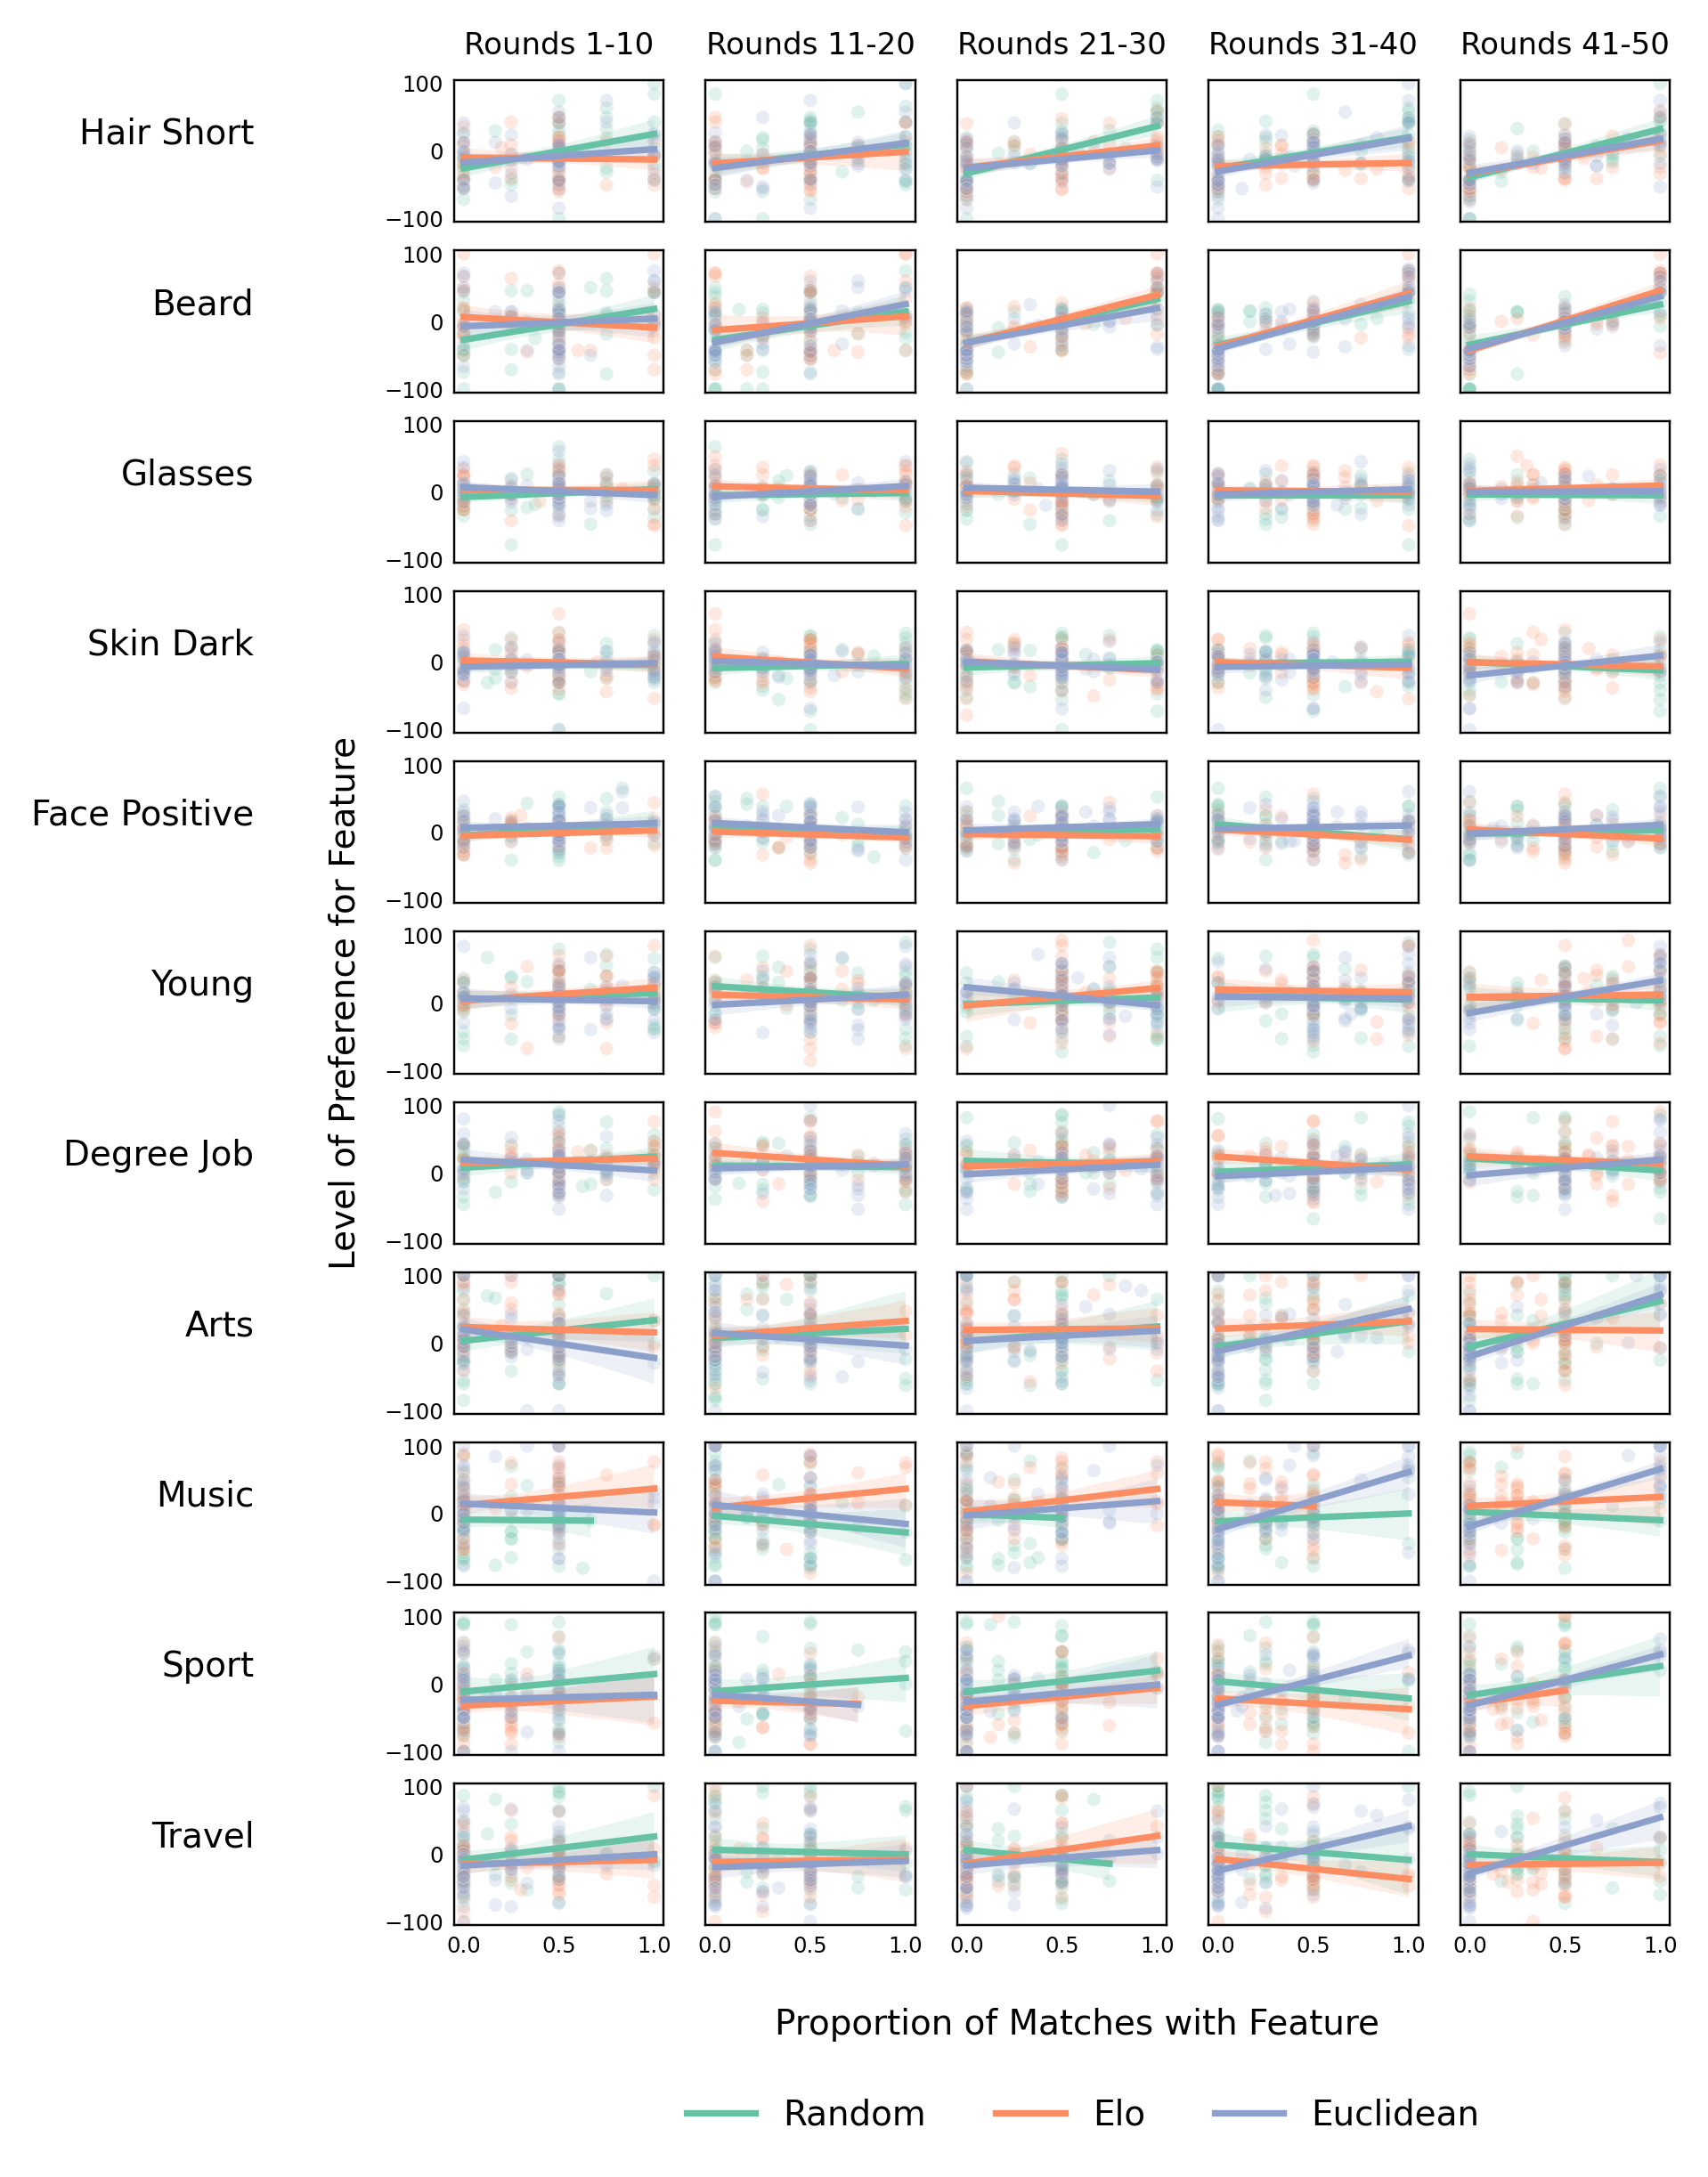

In [711]:
import seaborn as sns
import matplotlib.pyplot as plt

# Desired order for modified traits
desired_order = ['hair_short', 'Beard', 'Glasses', 'skin_dark', 'face_positive', 'young', 'Degree Job', 'Arts', 'Music', 'Sport', 'Travel']

# Prepare modified traits for labeling
modified_traits = [trait.replace('main_hobby_', '').replace('job_type_higher_ed', 'Degree Job').replace('has_accessories', 'Glasses').replace('has_facial_hair', 'Beard') for trait in traits]

# Reorder traits and modified_traits based on desired_order
ordered_pairs = sorted(zip(modified_traits, traits), key=lambda x: desired_order.index(x[0]))
modified_traits, traits = zip(*ordered_pairs)

# Set up subplots: traits as rows, rounds as columns
fig, axes = plt.subplots(len(traits), len(labels), figsize=(5, 8), sharex='col', sharey='row', dpi=350)

# Loop through traits and rounds to create subplots
for i, (trait, mod_trait) in enumerate(zip(traits, modified_traits)):
    for j, rounds_group in enumerate(labels):
        ax = axes[i, j]

        # Filter data for current round group
        current_data = merged_df[merged_df['rounds_group'] == rounds_group]

        x = current_data[trait]
        y = current_data[f'{trait}_preference']
        hue = current_data['recAlgorithm']

        # Create scatter plot with smaller dots
        sns.scatterplot(x=x, y=y, hue=hue, ax=ax, palette=algorithm_colours, legend=False, alpha=0.2, s=10)

        # Plot regression lines for each algorithm
        unique_algorithms = current_data['recAlgorithm'].unique()
        for algorithm in unique_algorithms:
            algorithm_data = current_data[current_data['recAlgorithm'] == algorithm]
            sns.regplot(x=algorithm_data[trait], y=algorithm_data[f'{trait}_preference'], ax=ax, scatter=False, label=algorithm, color=algorithm_colours.get(algorithm, '#000000'))

        ax.set_xlim(-0.05, 1.05)
        ax.set_ylim(-105, 105)

        # Set y-axis label for the first column only
        if j == 0:
            ax.set_ylabel(f'{mod_trait.replace("_", " ").title()}', rotation=0, labelpad=30, size=8, ha='right')
        else:
            ax.set_ylabel('')  # Remove y-label for other columns

        # Set x-axis label for the bottom row only
        if i == len(traits) - 1:
            ax.set_xlabel('', fontsize=8)
        else:
            ax.set_xlabel('')

        # Remove background grid
        ax.grid(False)

        # Remove ticks but keep the tick labels
        ax.tick_params(axis='both', which='both', length=0)

# Add titles for each column
for ax, rounds_group in zip(axes[0], labels):
    ax.set_title(f'Rounds {rounds_group}', fontsize=7)

# Add figure-level annotations

# x, y
fig.text(0.52, 0.14, 'Proportion of Matches with Feature', ha='center', va='center', size=8)
fig.text(0.05, 0.55, 'Level of Preference for Feature', ha='center', va='center', rotation='vertical', size=8)

# Adjust legend
plt.legend(title='', bbox_to_anchor=(-1.8, -1), loc='upper center', ncol=3, fontsize=8)
# Tight layout and adjust
fig.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.subplots_adjust(left=0.12, right=0.9, top=0.92, bottom=0.18)

# Save and show the plot
plt.savefig("visualisations/preference_vs_proportion_by_trait_by_round_matches_only.pdf", bbox_inches='tight')
plt.show()


### Average preference value of recommendations across rounds:

In [548]:
SwipeDecision_df.columns

Index(['id', 'roundsPlayed', 'dislikedProfile', 'likedProfile',
       'strongPreferenceDetected', 'strongPreferences', 'batchID', 'gameID',
       'playerID', 'roundID', 'number_of_strong_preferences'],
      dtype='object')

In [457]:
liked_recs = SwipeDecision_df[['id', 'roundsPlayed', 'likedProfile',
       'strongPreferenceDetected', 'strongPreferences', 'batchID', 'gameID',
       'playerID', 'roundID', 'number_of_strong_preferences']]
liked_recs = liked_recs.rename(columns={"likedProfile": "recommendation"})

disliked_recs = SwipeDecision_df[['id', 'roundsPlayed', 'dislikedProfile',
       'strongPreferenceDetected', 'strongPreferences', 'batchID', 'gameID',
       'playerID', 'roundID', 'number_of_strong_preferences']]
disliked_recs = disliked_recs.rename(columns={"dislikedProfile": "recommendation"})

In [458]:
combined_recommendations_df = pd.concat([liked_recs, disliked_recs], ignore_index=True)
combined_recommendations_df = combined_recommendations_df.merge(character_df_encoded, left_on = 'recommendation', right_on = 'profile_ID', how = 'left')
combined_recommendations_df = combined_recommendations_df.merge(preferences_mean_df_merged, on = "playerID", how = 'left')


In [459]:
def traits_fit_preference(preferences, traits):
    sum_means = sum(preferences[trait + '_preference'] for trait in traits if trait + '_preference' in preferences)
    count = sum(1 for trait in traits if trait + '_preference' in preferences)
    return sum_means / count if count else 0

import math

# def traits_fit_preference(row, traits):
#     sum_squared_differences = 0
#     count = 0
    
#     for trait in traits:
#         pref_key = trait + '_preference'
#         if pref_key in row:
#             difference = row[pref_key] - row[trait]
#             sum_squared_differences += difference ** 2
#             count += 1
    
#     if count == 0:
#         return 0
    
#     euclidean_distance = math.sqrt(sum_squared_differences)
    
#     return 1 / (1 + euclidean_distance)

trait_columns = [col for col in combined_recommendations_df.columns if not col.endswith('_preference') and not col.endswith('ID')]

combined_recommendations_df['averagePreference'] = combined_recommendations_df.apply(
    lambda row: traits_fit_preference(row, [trait for trait in trait_columns if row[trait]]), axis=1
)


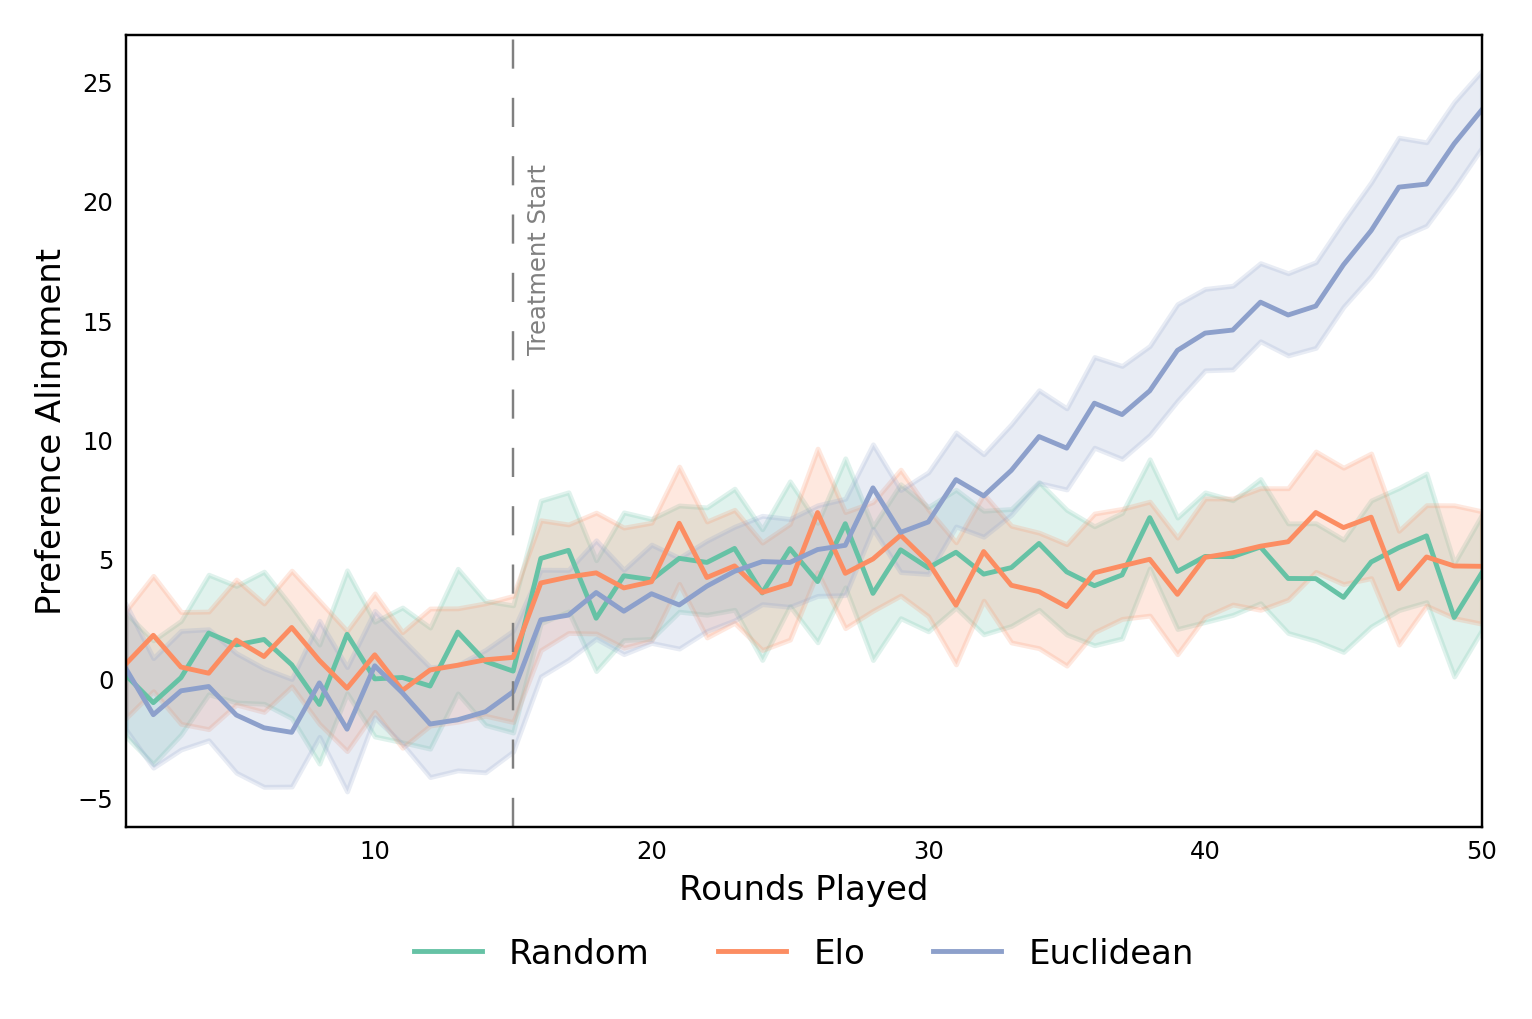

In [465]:
plt.figure(figsize=(5, 3), dpi=350)
sns.lineplot(data=combined_recommendations_df, x='roundsPlayed', y='averagePreference', hue='recAlgorithm', palette=algorithm_colours)

# Customize the plot
plt.xlabel('Rounds Played')
plt.ylabel('Preference Alingment')
plt.axvline(x=15, color='gray', linestyle='--', linewidth=0.5)

# Add the "Treatment Start" text
plt.text(15.5, plt.ylim()[1]*0.8, 'Treatment Start', color='gray', size=5, ha='left', va='top', rotation=90)

plt.xlim(1, 50)  # Adjust the x-axis limits
plt.grid(False)

# Remove ticks from both axes
plt.gca().tick_params(axis='both', which='both', length=0)

# Adjust the legend position and style
plt.legend(title='', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)

# Save and show the plot
plt.savefig("visualisations/elo_disparity_between_recommended_and_own_character.pdf", bbox_inches='tight')
plt.show()


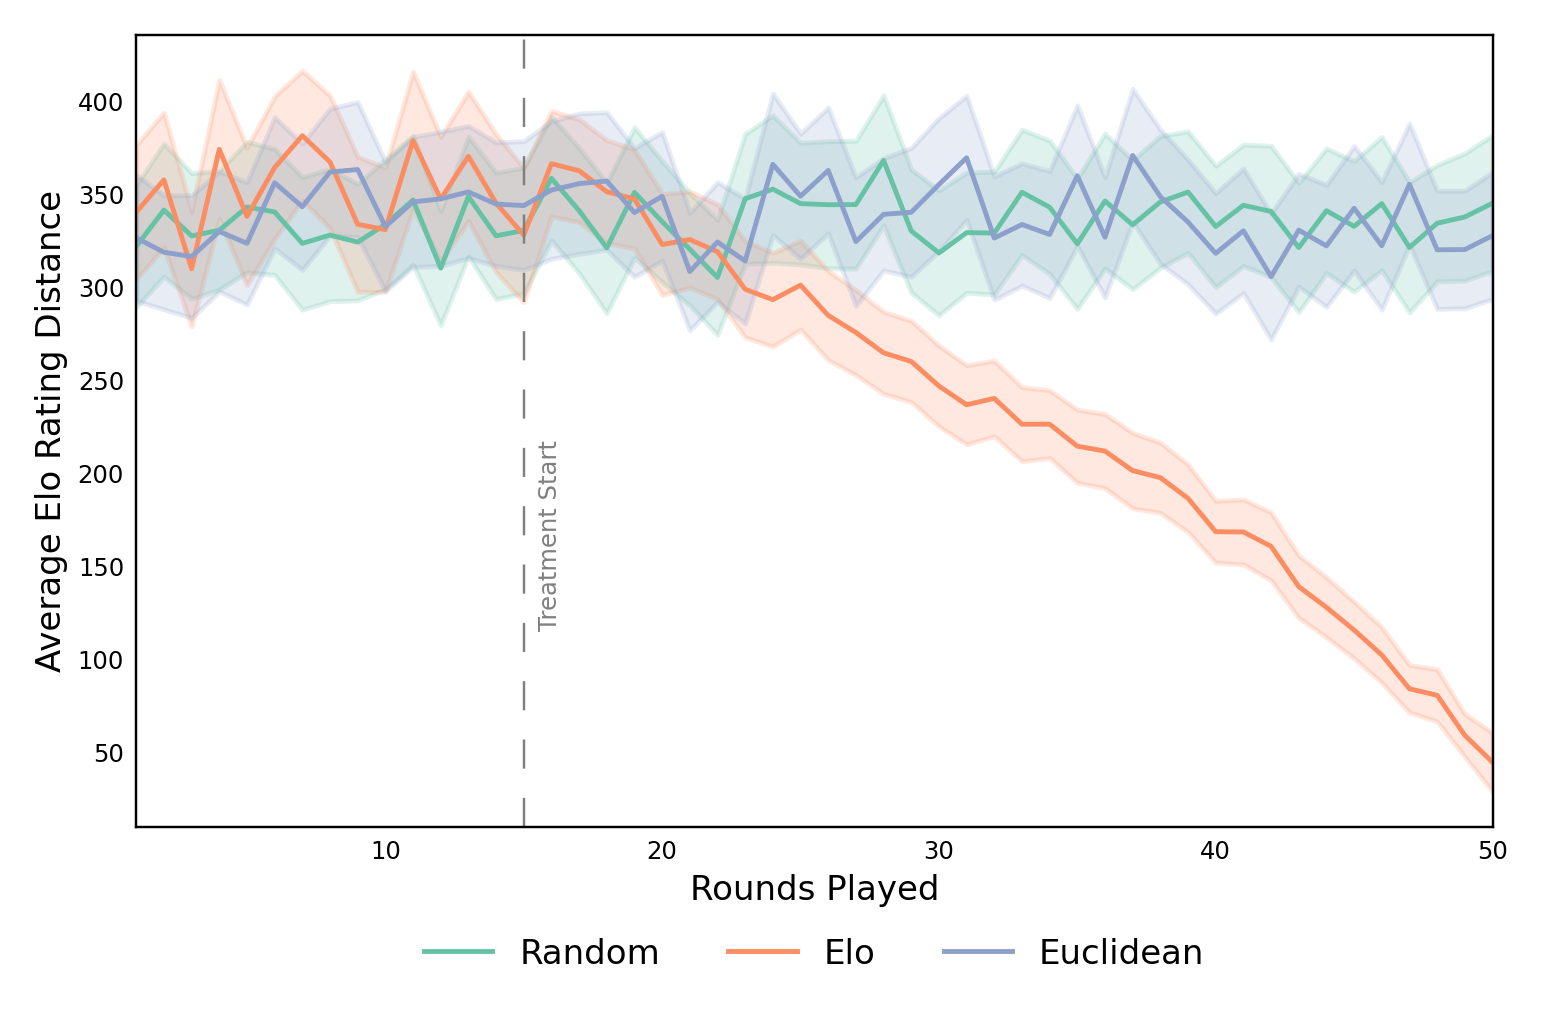

In [466]:
# Define the order of the algorithms
ordered_algorithms = ['Random', 'Elo', 'Euclidean']

# Plotting
fig, ax = plt.subplots(figsize=(5, 3), dpi=350)

for rec_algo in ordered_algorithms:
    subset = average_elo_distance[average_elo_distance['recAlgorithm'] == rec_algo]
    color = algorithm_colours.get(rec_algo, '#000000')  # Default to black if algorithm is not found in the dictionary
    ax.plot(subset['roundsPlayed'], subset['average_elo_distance'], label=rec_algo, color=color)
    ax.fill_between(subset['roundsPlayed'], subset['average_elo_distance'] - subset['ci95'], subset['average_elo_distance'] + subset['ci95'], color=color, alpha=0.2)

# Customize the plot
plt.xlabel('Rounds Played')
plt.ylabel('Average Elo Rating Distance')
plt.axvline(x=15, color='gray', linestyle='--', linewidth=0.5)

# Add the "Treatment Start" text
plt.text(15.5, plt.ylim()[1]*0.5, 'Treatment Start', color='gray', size=5, ha='left', va='top', rotation=90)

plt.xlim(1, 50)  # Adjust the x-axis limits
plt.grid(False)

# Remove ticks from both axes
plt.gca().tick_params(axis='both', which='both', length=0)

# Adjust the legend position and style
plt.legend(title='', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)

# Save and show the plot
plt.savefig("visualisations/elo_disparity_between_recommended_and_own_character.pdf", bbox_inches='tight')
plt.show()


### How many 'matches' (both characters liked each other)

Index(['id', 'roundsPlayed', 'dislikedProfile', 'likedProfile',
       'strongPreferenceDetected', 'strongPreferences', 'batchID', 'gameID',
       'playerID', 'roundID', 'number_of_strong_preferences', 'chosenProfile',
       'recAlgorithm'],
      dtype='object')

In [726]:
SwipeDecision_merged = SwipeDecision_df.merge(player_df[['chosenProfile', 'playerID', 'recAlgorithm']], how = 'left', on = 'playerID')
SwipeDecision_merged.columns

match_df = pd.DataFrame(columns=['id1','playerID1', 'roundsPlayed1', 'chosenProfile1', 'recAlgorithm1',
                                 'id2','playerID2', 'roundsPlayed2', 'chosenProfile2', 'recAlgorithm2'])

for index, row in SwipeDecision_merged.iterrows():
    chosen_profile = row['chosenProfile']
    liked_profile = row['likedProfile']

    reverse_match = SwipeDecision_merged[
        (SwipeDecision_merged['chosenProfile'] == liked_profile) & 
        (SwipeDecision_merged['likedProfile'] == chosen_profile)
    ]

    for _, reverse_row in reverse_match.iterrows():
        if row['id'] != reverse_row['id']:
            match_df = match_df.append({
                'id1':row['id'],
                'playerID1': row['playerID'],
                'roundsPlayed1': row['roundsPlayed'],
                'chosenProfile1': row['chosenProfile'],
                'recAlgorithm1': row['recAlgorithm'],
                'id2':reverse_row['id'],
                'playerID2': reverse_row['playerID'],
                'roundsPlayed2': reverse_row['roundsPlayed'],
                'chosenProfile2': reverse_row['chosenProfile'],
                'recAlgorithm2': reverse_row['recAlgorithm']
            }, ignore_index=True)

match_df = match_df.drop_duplicates()

match_df

id1                   playerID1 roundsPlayed1  \
0     01J1TR898ZC78RADMRK2XW52DZ  01J1TQNANBFZV7M6VRM670890H            36   
1     01J1TR7J7CSZ3ETEK6ESQM9Z2W  01J1TQTERTVXPBN1RB1E4KVWQV            49   
2     01J1TT7R1KSB7PMN9685Y7HA7Z  01J1TSJPARN3CB8YRHEWD4PPG9            12   
3     01J1TT7R1KSB7PMN9685Y7HA7Z  01J1TSJPARN3CB8YRHEWD4PPG9            12   
4     01J1TR13ZY6DK66G85E3RWAY0D  01J1TQYM9CW5N1SZKRHQ6QXMB3             4   
...                          ...                         ...           ...   
4773  01J3DV9XC35FAKQPB4ZTNJHH0Y  01J3DTWVTAHNH8599JP38KKW8V            17   
4774  01J3DT5B4F5ZCP36FY1RXYN0K4  01J3DSZ85N6EVCPQD2Y4ECHV5C            16   
4775  01J3DT5B4F5ZCP36FY1RXYN0K4  01J3DSZ85N6EVCPQD2Y4ECHV5C            16   
4776  01J3DT5B4F5ZCP36FY1RXYN0K4  01J3DSZ85N6EVCPQD2Y4ECHV5C            16   
4777  01J3DT5B4F5ZCP36FY1RXYN0K4  01J3DSZ85N6EVCPQD2Y4ECHV5C            16   

     chosenProfile1 recAlgorithm1                         id2  \
0               242        Random  01J1TB4NSZFS0E3AXEXZ2G1J08   
1                 0        Random  01J3E1Q8GTZ1D5PDT4K7NMKSRN   
2               231        Random  01J1TJV8PYFCQCZRA3M9G2H3C1   
3               231        Random  01J26XWW8BX3PVH7CX3HV9EEQY   
4               176        Random  01J1SWV233DEJ4N068AG037QKK   
...             ...           ...                         ...   
4773             99     Euclidean  01J1TB66JFA78Z0XBE34M6RF7P   
4774            191     Euclidean  01J1Q1XT9K84R6ZJ9AF7TF75R7   
4775            191     Euclidean  01J249FRJ6KZE6FHN9CRSEX5BW   
4776            191     Euclidean  01J275AVE9C8VXK90X76F9MFKV   
4777            191     Euclidean  01J3DEKWFZ68FGPG8QS673624Q   

                       playerID2 roundsPlayed2 chosenProfile2 recAlgorithm2  
0     01J1TAX4QFS8TY0YF4E5VW2HD4            22            244        Random  
1     01J3E0XRXG2DTPMNV9GV9HTXD3            33             59     Euclidean  
2     01J1TJNCATR75750Z353DBMTGV             3             77        Random  
3     01J26XKT4V657NSAMHDA55FTDW            23             77           Elo  
4     01J1SWG5W18GTVXPT379VCB63X            29            146        Random  
...                          ...           ...            ...           ...  
4773  01J1TAVXE0MW7BHQDK41SV837G            32            241        Random  
4774  01J1Q1VGGGNCWQATCAHV9TGTT8             3            179        Random  
4775  01J249A45E79V9Z69VR43W8VT1             5            179           Elo  
4776  01J274K296W5VJPC2N62HZD4VS            33            179           Elo  
4777  01J3DDRS11WSM9Z7CH6PSJ1PVD            46            179     Euclidean  

[4778 rows x 10 columns]

In [727]:
match_df

id1                   playerID1 roundsPlayed1  \
0     01J1TR898ZC78RADMRK2XW52DZ  01J1TQNANBFZV7M6VRM670890H            36   
1     01J1TR7J7CSZ3ETEK6ESQM9Z2W  01J1TQTERTVXPBN1RB1E4KVWQV            49   
2     01J1TT7R1KSB7PMN9685Y7HA7Z  01J1TSJPARN3CB8YRHEWD4PPG9            12   
3     01J1TT7R1KSB7PMN9685Y7HA7Z  01J1TSJPARN3CB8YRHEWD4PPG9            12   
4     01J1TR13ZY6DK66G85E3RWAY0D  01J1TQYM9CW5N1SZKRHQ6QXMB3             4   
...                          ...                         ...           ...   
4773  01J3DV9XC35FAKQPB4ZTNJHH0Y  01J3DTWVTAHNH8599JP38KKW8V            17   
4774  01J3DT5B4F5ZCP36FY1RXYN0K4  01J3DSZ85N6EVCPQD2Y4ECHV5C            16   
4775  01J3DT5B4F5ZCP36FY1RXYN0K4  01J3DSZ85N6EVCPQD2Y4ECHV5C            16   
4776  01J3DT5B4F5ZCP36FY1RXYN0K4  01J3DSZ85N6EVCPQD2Y4ECHV5C            16   
4777  01J3DT5B4F5ZCP36FY1RXYN0K4  01J3DSZ85N6EVCPQD2Y4ECHV5C            16   

     chosenProfile1 recAlgorithm1                         id2  \
0               242        Random  01J1TB4NSZFS0E3AXEXZ2G1J08   
1                 0        Random  01J3E1Q8GTZ1D5PDT4K7NMKSRN   
2               231        Random  01J1TJV8PYFCQCZRA3M9G2H3C1   
3               231        Random  01J26XWW8BX3PVH7CX3HV9EEQY   
4               176        Random  01J1SWV233DEJ4N068AG037QKK   
...             ...           ...                         ...   
4773             99     Euclidean  01J1TB66JFA78Z0XBE34M6RF7P   
4774            191     Euclidean  01J1Q1XT9K84R6ZJ9AF7TF75R7   
4775            191     Euclidean  01J249FRJ6KZE6FHN9CRSEX5BW   
4776            191     Euclidean  01J275AVE9C8VXK90X76F9MFKV   
4777            191     Euclidean  01J3DEKWFZ68FGPG8QS673624Q   

                       playerID2 roundsPlayed2 chosenProfile2 recAlgorithm2  
0     01J1TAX4QFS8TY0YF4E5VW2HD4            22            244        Random  
1     01J3E0XRXG2DTPMNV9GV9HTXD3            33             59     Euclidean  
2     01J1TJNCATR75750Z353DBMTGV             3             77        Random  
3     01J26XKT4V657NSAMHDA55FTDW            23             77           Elo  
4     01J1SWG5W18GTVXPT379VCB63X            29            146        Random  
...                          ...           ...            ...           ...  
4773  01J1TAVXE0MW7BHQDK41SV837G            32            241        Random  
4774  01J1Q1VGGGNCWQATCAHV9TGTT8             3            179        Random  
4775  01J249A45E79V9Z69VR43W8VT1             5            179           Elo  
4776  01J274K296W5VJPC2N62HZD4VS            33            179           Elo  
4777  01J3DDRS11WSM9Z7CH6PSJ1PVD            46            179     Euclidean  

[4778 rows x 10 columns]

In [728]:
character_df.columns

Index(['accessories', 'face', 'facial_hair', 'hair', 'pose', 'skin_tone',
       'age', 'main_hobby', 'hobby_1', 'hobby_2', 'hair_color',
       'clothes_color', 'job_type', 'job', 'hair_short', 'face_mood',
       'body_has_color', 'skin_dark', 'has_facial_hair', 'has_accessories',
       'profile_ID', 'has_degree_job', 'has_positive_face_mood',
       'has_sport_hobby', 'has_art_hobby', 'has_travel_hobby',
       'has_music_hobby', 'young'],
      dtype='object')

In [729]:
# combined_matches =  pd.concat([
#     match_df[['id1', 'playerID1', 'roundsPlayed1', 'chosenProfile1', 'recAlgorithm1']].rename(
#         columns=lambda x: x[:-1]),
#     match_df[['id2', 'playerID2', 'roundsPlayed2', 'chosenProfile2', 'recAlgorithm2']].rename(
#         columns=lambda x: x[:-1])
# ], ignore_index=True)

In [730]:
# Merge match_df with character_df to get features for chosenProfile1
match_df = match_df.merge(character_df[['profile_ID', 'hair_short', 'skin_dark', 'has_facial_hair', 'has_accessories',
                                        'has_degree_job', 'has_positive_face_mood', 'has_sport_hobby', 'has_art_hobby',
                                        'has_travel_hobby', 'has_music_hobby', 'young']],
                          left_on='chosenProfile1', right_on='profile_ID', suffixes=('', '_1'))

# Merge match_df with character_df to get features for chosenProfile2
match_df = match_df.merge(character_df[['profile_ID', 'hair_short', 'skin_dark', 'has_facial_hair', 'has_accessories',
                                        'has_degree_job', 'has_positive_face_mood', 'has_sport_hobby', 'has_art_hobby',
                                        'has_travel_hobby', 'has_music_hobby', 'young']],
                          left_on='chosenProfile2', right_on='profile_ID', suffixes=('', '_2'))

# Drop the redundant profile_ID columns
match_df = match_df.drop(columns=['profile_ID', 'profile_ID_2'])

In [731]:
# Add columns to indicate whether the features are the same or different
boolean_features = ['hair_short', 'skin_dark', 'has_facial_hair', 'has_accessories',
                    'has_degree_job', 'has_positive_face_mood', 'has_sport_hobby',
                    'has_art_hobby', 'has_travel_hobby', 'has_music_hobby', 'young']

for feature in boolean_features:
    match_df[f'{feature}_match'] = match_df[f'{feature}'] == match_df[f'{feature}_2']
    match_df[f'{feature}_match'] = match_df[f'{feature}_match'].map({True: 'same', False: 'different'})

# Display the updated match_df
match_df


id1                   playerID1 roundsPlayed1  \
0     01J1TR898ZC78RADMRK2XW52DZ  01J1TQNANBFZV7M6VRM670890H            36   
1     01J1TTGAMNXY62BPKPDR8RJ6HH  01J1TSJPARN3CB8YRHEWD4PPG9            27   
2     01J3E8ZEW5N8VWTBHAY15F6P22  01J3E86X5HCBT88S1SQHMXAHXH            33   
3     01J3E8ZEW5N8VWTBHAY15F6P22  01J3E86X5HCBT88S1SQHMXAHXH            33   
4     01J3E1H2XF5QY8E8Q7PXTNAEZD  01J3E1ECEAXGEB25FQYEWD48RS             3   
...                          ...                         ...           ...   
4773  01J27CHNTVTQ6DP2TGKZ55H6PG  01J27C22P5KQ7VC864R61V1GMZ            35   
4774  01J27HBQJKDRZPZYNMBHQV0VDM  01J27GRMKFXS5QXZ48T2RK8G44            44   
4775  01J271ZRQS0J6A5VT4A9JSBC86  01J271R51CSEHFJSJ3V52VSSEY            25   
4776  01J3DEEVBBP5HXN8A52MJWSX5J  01J3DEAMRMH09C4PJ8NH6A5NSX            10   
4777  01J3E3DAR5SR3JEPD1ZRMHY1YF  01J3E34Y2HD2H8KG8AQFZD0QM0            20   

     chosenProfile1 recAlgorithm1                         id2  \
0               242        Random  01J1TB4NSZFS0E3AXEXZ2G1J08   
1               231        Random  01J1TB8E8ETDZ54C52DXHM1D1C   
2                66     Euclidean  01J27P0GFDFYVRX9APNQ4P0BZV   
3                66     Euclidean  01J3E6GQPJHT3Z8P6ZRF9QJGZP   
4                66     Euclidean  01J27P0GFDFYVRX9APNQ4P0BZV   
...             ...           ...                         ...   
4773            239           Elo  01J1MX0Q8GK9VYY9SBZQ02ARDP   
4774            137           Elo  01J1MX5ATSPCV41DYWMMK6F7T1   
4775            197           Elo  01J1MX54NNNYQ0Y0BMCP86DJZK   
4776            133     Euclidean  01J1MWYNG30Q00S9N6FH1AWJHH   
4777             29     Euclidean  01J1MX72VMJ0XY5GAHF6VE1XWK   

                       playerID2 roundsPlayed2 chosenProfile2 recAlgorithm2  \
0     01J1TAX4QFS8TY0YF4E5VW2HD4            22            244        Random   
1     01J1TAX4QFS8TY0YF4E5VW2HD4            41            244        Random   
2     01J27NMHM7G3DWNJZE3XTD7X4X            31            244           Elo   
3     01J3E62QZJG7VPZ4E4ZR0GH0TV            31            244     Euclidean   
4     01J27NMHM7G3DWNJZE3XTD7X4X            31            244           Elo   
...                          ...           ...            ...           ...   
4773  01J1MWVG92N53460ZX8YM5YTKE            12             69        Random   
4774  01J1MWVG92N53460ZX8YM5YTKE            41             69        Random   
4775  01J1MWVG92N53460ZX8YM5YTKE            40             69        Random   
4776  01J1MWVG92N53460ZX8YM5YTKE             4             69        Random   
4777  01J1MWVG92N53460ZX8YM5YTKE            47             69        Random   

      ...  skin_dark_match  has_facial_hair_match  has_accessories_match  \
0     ...        different                   same                   same   
1     ...             same                   same                   same   
2     ...        different              different                   same   
3     ...        different              different                   same   
4     ...        different              different                   same   
...   ...              ...                    ...                    ...   
4773  ...        different              different                   same   
4774  ...             same              different              different   
4775  ...             same              different                   same   
4776  ...             same              different              different   
4777  ...             same                   same              different   

      has_degree_job_match  has_positive_face_mood_match  \
0                different                     different   
1                     same                          same   
2                different                          same   
3                different                          same   
4                different                          same   
...                    ...                           ...   
4773             different   

In [732]:
match_df.columns

Index(['id1', 'playerID1', 'roundsPlayed1', 'chosenProfile1', 'recAlgorithm1',
       'id2', 'playerID2', 'roundsPlayed2', 'chosenProfile2', 'recAlgorithm2',
       'hair_short', 'skin_dark', 'has_facial_hair', 'has_accessories',
       'has_degree_job', 'has_positive_face_mood', 'has_sport_hobby',
       'has_art_hobby', 'has_travel_hobby', 'has_music_hobby', 'young',
       'hair_short_2', 'skin_dark_2', 'has_facial_hair_2', 'has_accessories_2',
       'has_degree_job_2', 'has_positive_face_mood_2', 'has_sport_hobby_2',
       'has_art_hobby_2', 'has_travel_hobby_2', 'has_music_hobby_2', 'young_2',
       'hair_short_match', 'skin_dark_match', 'has_facial_hair_match',
       'has_accessories_match', 'has_degree_job_match',
       'has_positive_face_mood_match', 'has_sport_hobby_match',
       'has_art_hobby_match', 'has_travel_hobby_match',
       'has_music_hobby_match', 'young_match'],
      dtype='object')

In [733]:
match_df = match_df[match_df['recAlgorithm1']==match_df['recAlgorithm2']]
# match_df = match_df[(match_df['recAlgorithm1'] == 'Random') | (match_df['recAlgorithm2'] == 'Random')]


In [734]:
combined_matches =  pd.concat([
    match_df[['id1', 'playerID1', 'roundsPlayed1', 'chosenProfile1', 'recAlgorithm1',
       'hair_short_match', 'skin_dark_match', 'has_facial_hair_match',
       'has_accessories_match', 'has_degree_job_match',
       'has_positive_face_mood_match', 'has_sport_hobby_match',
       'has_art_hobby_match', 'has_travel_hobby_match',
       'has_music_hobby_match', 'young_match']].rename(
        columns=lambda x: x[:-1] if x[-1].isdigit() else x),
    match_df[['id2', 'playerID2', 'roundsPlayed2', 'chosenProfile2', 'recAlgorithm2',
       'hair_short_match', 'skin_dark_match', 'has_facial_hair_match',
       'has_accessories_match', 'has_degree_job_match',
       'has_positive_face_mood_match', 'has_sport_hobby_match',
       'has_art_hobby_match', 'has_travel_hobby_match',
       'has_music_hobby_match', 'young_match']].rename(
        columns=lambda x: x[:-1] if x[-1].isdigit() else x)
], ignore_index=True)

In [736]:
match_columns = [
    'hair_short_match', 'has_facial_hair_match', 'has_accessories_match',
    'skin_dark_match', 'has_positive_face_mood_match', 'young_match',
    'has_degree_job_match', 'has_art_hobby_match', 'has_music_hobby_match',
    'has_sport_hobby_match', 'has_travel_hobby_match'
]

# Modify the labels for each trait
modified_labels = [
    'Hair Short', 'Beard', 'Glasses', 'Skin Dark', 'Face Positive', 'Young',
    'Degree Job', 'Arts', 'Music', 'Sport', 'Travel'
]

# Desired order for modified traits
desired_order = ['Hair Short', 'Beard', 'Glasses', 'Skin Dark', 'Face Positive', 
                 'Young', 'Degree Job', 'Arts', 'Music', 'Sport', 'Travel']

# Reorder match_columns and modified_labels based on desired_order
ordered_pairs = sorted(zip(modified_labels, match_columns), key=lambda x: desired_order.index(x[0]))
modified_labels, match_columns = zip(*ordered_pairs)

# Grouping roundsPlayed into bins of 10
bins = np.arange(0, 51, 10)
labels = [f'{i+1}-{i+10}' for i in bins[:-1]]
combined_matches['round_group'] = pd.cut(combined_matches['roundsPlayed'], bins=bins, labels=labels, right=False)

# Grouping and calculating proportions
proportion_data = combined_matches.groupby(['round_group', 'recAlgorithm'])[match_columns].apply(
    lambda x: (x == 'same').mean()
).reset_index()

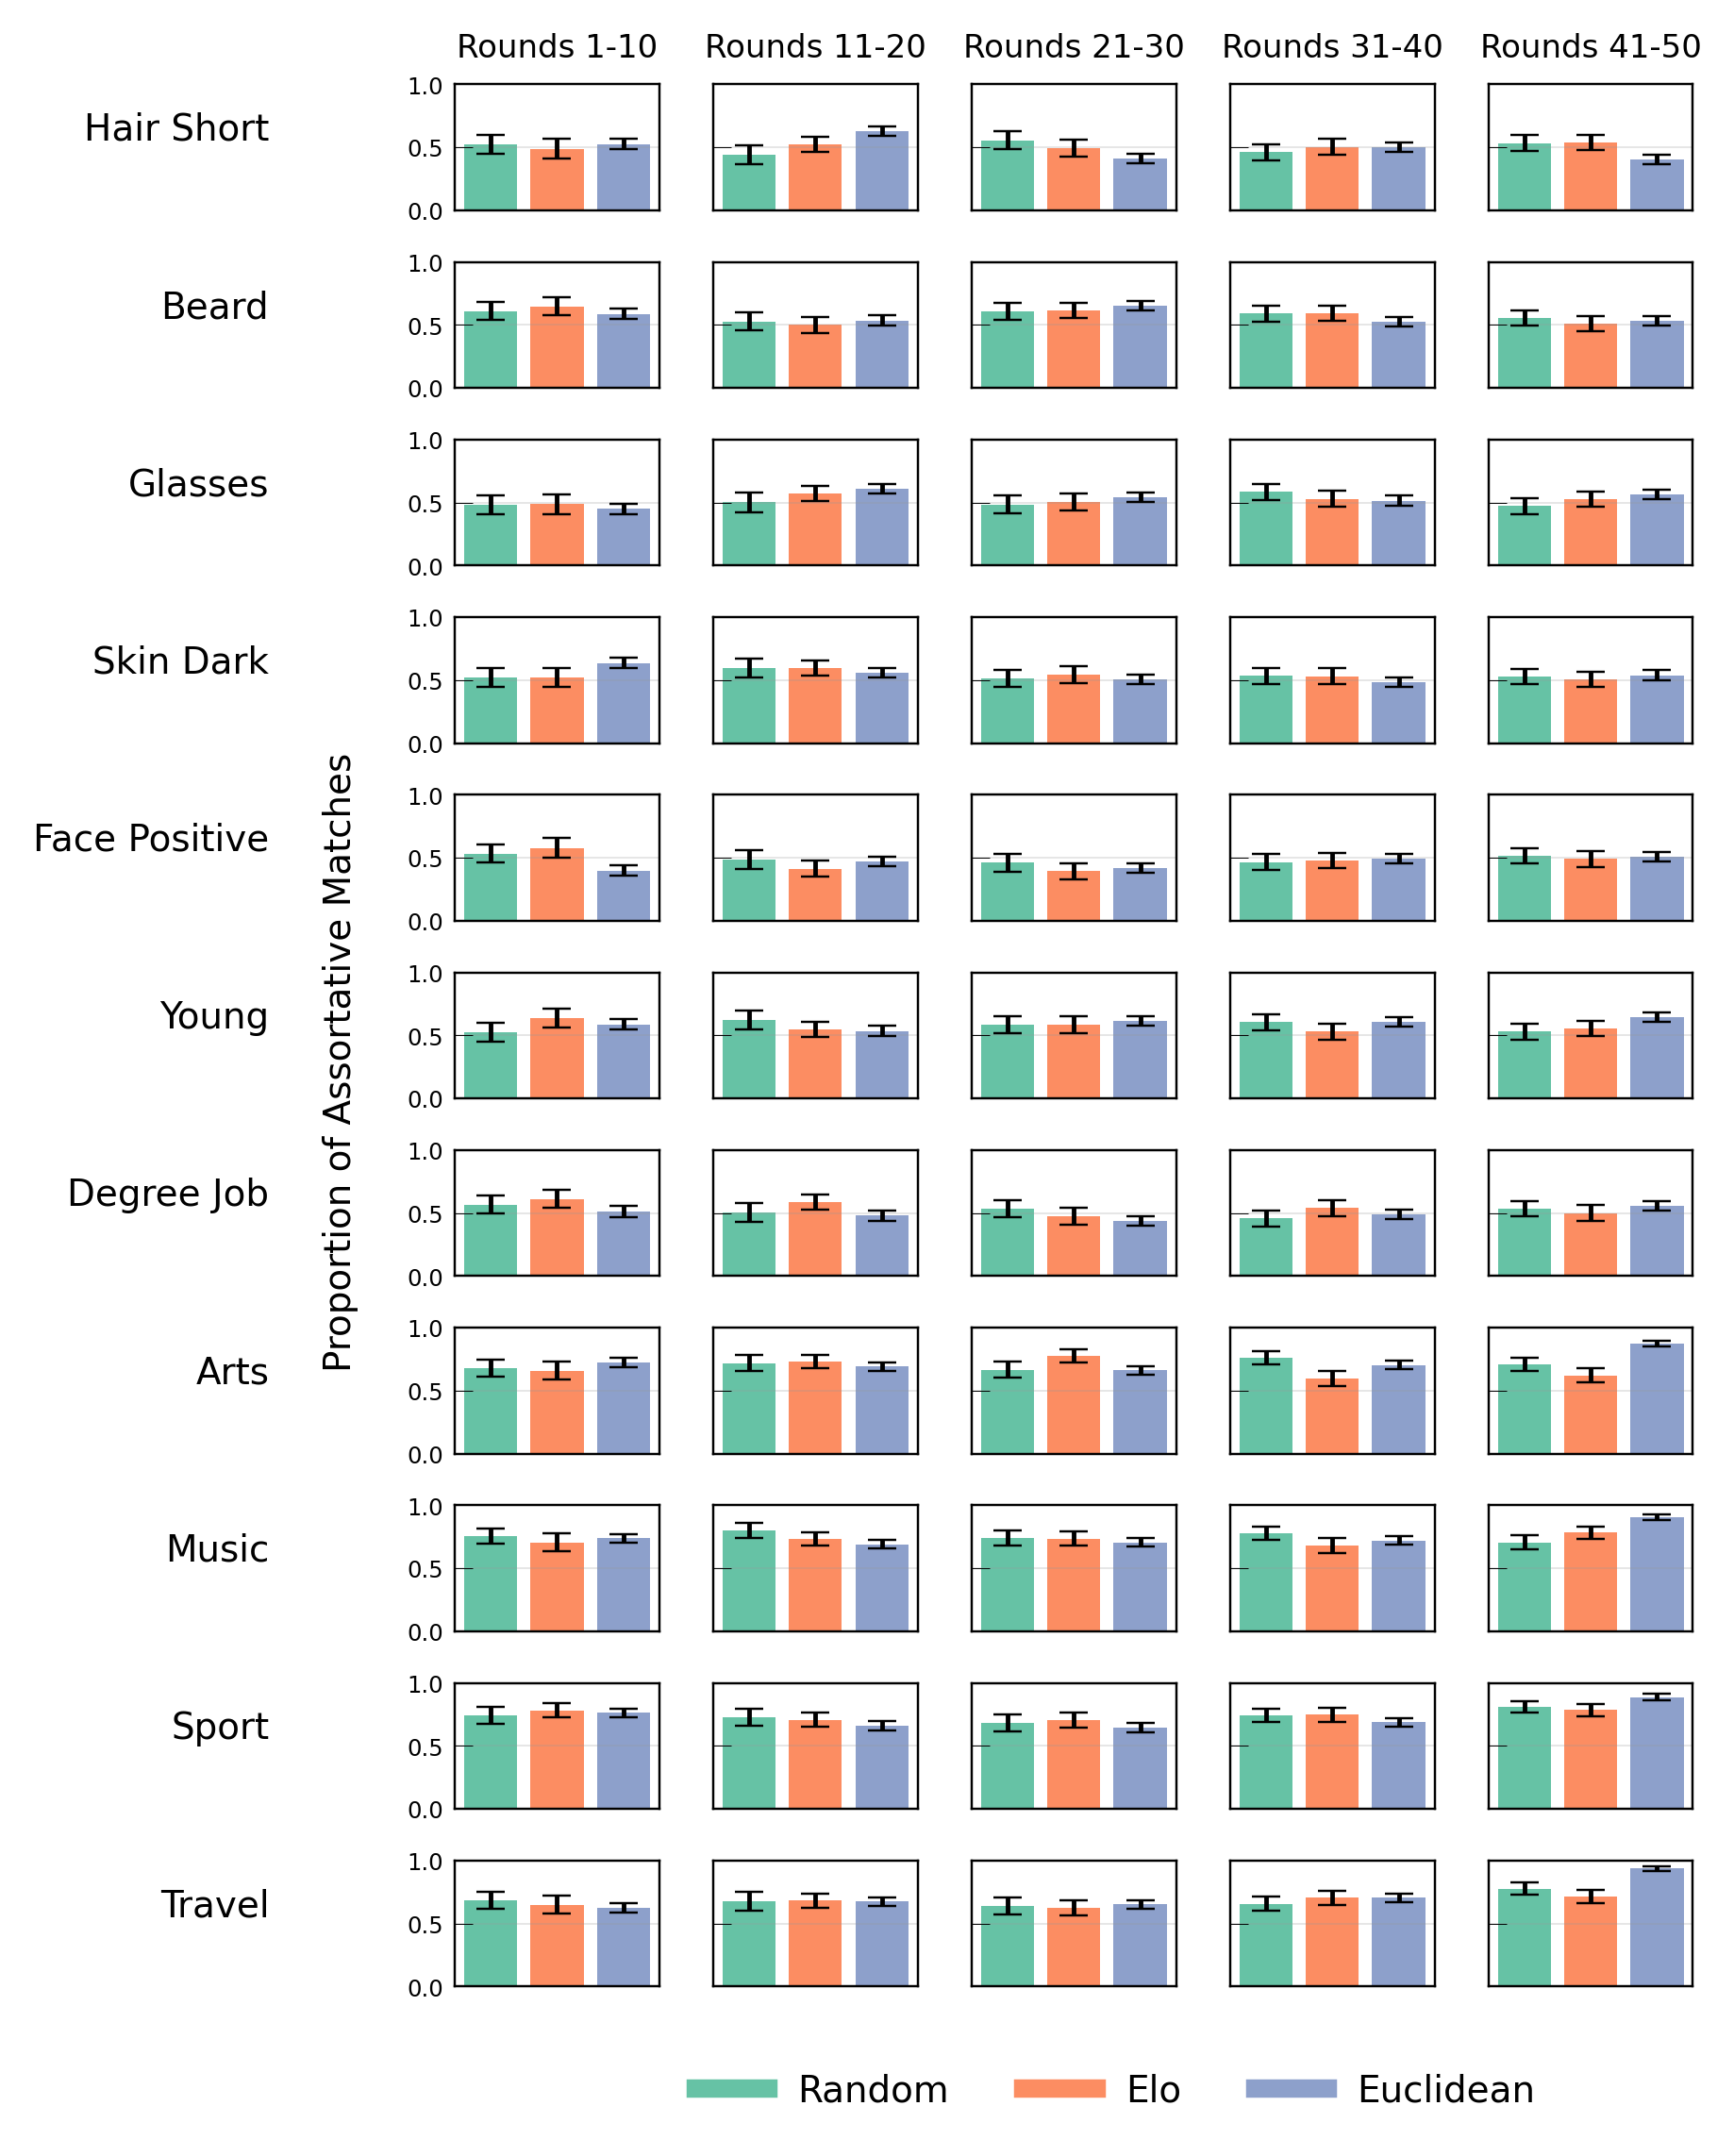

In [737]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming combined_matches, match_columns, etc. are already defined as per your code

# Desired order of algorithms
algorithm_order = ['Random', 'Elo', 'Euclidean']

# Grouping roundsPlayed into bins of 10
bins = np.arange(0, 51, 10)
labels = [f'{i+1}-{i+10}' for i in bins[:-1]]
combined_matches['round_group'] = pd.cut(combined_matches['roundsPlayed'], bins=bins, labels=labels, right=False)

# Grouping and calculating proportions
proportion_data = combined_matches.groupby(['round_group', 'recAlgorithm'])[match_columns].apply(
    lambda x: (x == 'same').mean()
).reset_index()

# Ensuring the algorithms are ordered as desired
proportion_data['recAlgorithm'] = pd.Categorical(proportion_data['recAlgorithm'], categories=algorithm_order, ordered=True)

# Creating the small multiples plot
fig, axes = plt.subplots(nrows=len(match_columns), ncols=len(labels), figsize=(5, 8), sharex='col', sharey='row', dpi=350)

for i, (match_col, mod_label) in enumerate(zip(match_columns, modified_labels)):
    for j, label in enumerate(labels):
        ax = axes[i, j]
        subset = proportion_data[proportion_data['round_group'] == label]

        # Ensure the subset is ordered by the desired algorithm order
        subset = subset.sort_values(by='recAlgorithm')

        # Calculate confidence intervals
        n = combined_matches.groupby(['round_group', 'recAlgorithm'])[match_col].count().loc[label]
        proportions = subset[match_col]
        conf_intervals = []
        for prop, count in zip(proportions, n):
            if count == 0:
                conf_intervals.append((0, 0))  # No data case
            else:
                ci = stats.binom.interval(0.95, count, prop, loc=0)
                conf_intervals.append((ci[1] - prop * count) / count)  # Adjust to be relative to proportion
        
        # Convert conf_intervals list into an array for error bars
        error_bars = np.array(conf_intervals).T

        # Plot with error bars
        bars = ax.bar(subset['recAlgorithm'], subset[match_col], color=[algorithm_colours[algo] for algo in subset['recAlgorithm']], yerr=error_bars, capsize=3)
        ax.set_ylim(0, 1)
        
        # Remove x labels and ticks
        ax.set_xticks([])
        ax.set_xticklabels([])

        # Set y-axis label for the first column only
        if j == 0:
            ax.set_ylabel(f'{mod_label}', rotation=0, labelpad=30, size=8, ha='right')
        else:
            ax.set_ylabel('')  # Remove y-label for other columns

# Add titles for each column
for ax, label in zip(axes[0], labels):
    ax.set_title(f'Rounds {label}', fontsize=7)

# Common y-axis label for all subplots
fig.text(0.07, 0.55, 'Proportion of Assortative Matches', va='center', rotation='vertical', fontsize=8)

# Prepare the legend with the correct order
handles = [plt.Line2D([0], [0], color=algorithm_colours[algo], lw=4) for algo in algorithm_order]
labels = algorithm_order

# Position the legend below the plot
fig.legend(handles, labels, title='', bbox_to_anchor=(0.55, 0.18), loc='upper center', ncol=len(labels), fontsize=8)

# Adjust layout and margins
plt.tight_layout(rect=[0.12, 0.1, 0.9, 0.95])
plt.subplots_adjust(left=0.15, right=0.9, top=0.92, bottom=0.2)  # Increase bottom margin to accommodate legend
# plt.savefig("visualisations/proportion_of_assortative_matches_round_alg_feature.pdf", bbox_inches='tight')

plt.show()


In [645]:
# Boolean features to analyze
boolean_features = ['hair_short', 'skin_dark', 'has_facial_hair', 'has_accessories',
                    'has_degree_job', 'has_positive_face_mood', 'has_sport_hobby',
                    'has_art_hobby', 'has_travel_hobby', 'has_music_hobby', 'young']

# Prepare data for visualization
plot_data = []
for feature in boolean_features:
    for algorithm in match_df['recAlgorithm1'].unique():
        # Filter for algorithm
        subset1 = match_df[match_df['recAlgorithm1'] == algorithm]
        subset2 = match_df[match_df['recAlgorithm2'] == algorithm]
        
        # Calculate proportion of same vs different
        same1 = subset1[f'{feature}_match'].value_counts(normalize=True).get('same', 0)
        different1 = subset1[f'{feature}_match'].value_counts(normalize=True).get('different', 0)
        same2 = subset2[f'{feature}_match'].value_counts(normalize=True).get('same', 0)
        different2 = subset2[f'{feature}_match'].value_counts(normalize=True).get('different', 0)

        # Append data
        plot_data.append([feature, algorithm, 'same', (same1 + same2) / 2])
        plot_data.append([feature, algorithm, 'different', (different1 + different2) / 2])

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data, columns=['feature', 'algorithm', 'match_type', 'proportion'])

In [605]:
plot_df

feature  algorithm match_type  proportion
0   hair_short     Random       same    0.501242
1   hair_short     Random  different    0.498758
2   hair_short  Euclidean       same    0.484433
3   hair_short  Euclidean  different    0.515567
4   hair_short        Elo       same    0.523047
..         ...        ...        ...         ...
61       young     Random  different    0.426708
62       young  Euclidean       same    0.585928
63       young  Euclidean  different    0.414072
64       young        Elo       same    0.591549
65       young        Elo  different    0.408451

[66 rows x 4 columns]

In [607]:
plot_df_same_attr_matches = plot_df[plot_df['match_type']=='same']
plot_df_same_attr_matches.columns

Index(['feature', 'algorithm', 'match_type', 'proportion'], dtype='object')

In [503]:
plot_df_same_attr_matches

feature round_bin  algorithm match_type  proportion
0    hair_short      1-10     Random       same    0.507837
2    hair_short      1-10  Euclidean       same    0.544484
4    hair_short      1-10        Elo       same    0.520270
6    hair_short     11-20     Random       same    0.462462
8    hair_short     11-20  Euclidean       same    0.565916
..          ...       ...        ...        ...         ...
86          NaN     41-50  Euclidean       same    0.559486
88          NaN     41-50        Elo       same    0.539267
114         NaN     41-50     Random       same    0.516234
116         NaN     41-50  Euclidean       same    0.514469
118         NaN     41-50        Elo       same    0.539267

[165 rows x 5 columns]

feature round_bin  algorithm match_type  proportion
6    hair_short     11-20     Random       same    0.462462
8    hair_short     11-20  Euclidean       same    0.565916
10   hair_short     11-20        Elo       same    0.540856
12   hair_short     21-30     Random       same    0.548589
14   hair_short     21-30  Euclidean       same    0.443038
..          ...       ...        ...        ...         ...
86          NaN     41-50  Euclidean       same    0.559486
88          NaN     41-50        Elo       same    0.539267
114         NaN     41-50     Random       same    0.516234
116         NaN     41-50  Euclidean       same    0.514469
118         NaN     41-50        Elo       same    0.539267

[132 rows x 5 columns]

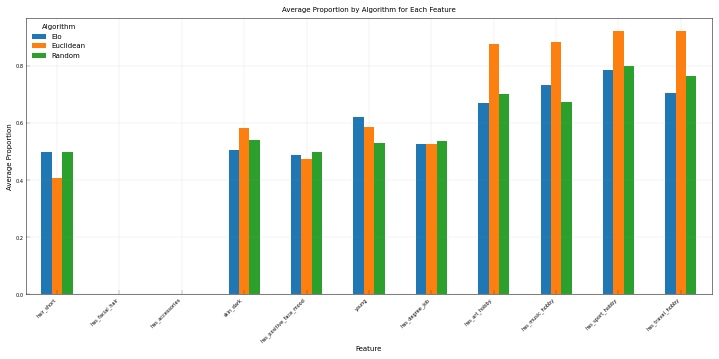

In [519]:
avg_proportion_df = plot_df_same_attr_matches[plot_df_same_attr_matches['round_bin']=='41-50'].groupby(['feature', 'algorithm'])['proportion'].mean().reset_index()

# Pivot the data for easier plotting
pivot_df = avg_proportion_df.pivot(index='feature', columns='algorithm', values='proportion')

# Plotting
pivot_df.plot(kind='bar', figsize=(10, 5))
plt.title('Average Proportion by Algorithm for Each Feature')
plt.xlabel('Feature')
plt.ylabel('Average Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming plot_df_same_attr_matches is your dataframe
# Define the desired order for features (traits)
desired_order = ['hair_short', 'Beard', 'Glasses', 'skin_dark', 'face_positive', 'young', 'Degree Job', 'Arts', 'Music', 'Sport', 'Travel']

# Prepare features for labeling, modifying names as necessary
plot_df_same_attr_matches['feature'] = plot_df_same_attr_matches['feature'].replace({
    'main_hobby_Arts': 'Arts', 
    'main_hobby_Music': 'Music',
    'main_hobby_Sport': 'Sport',
    'main_hobby_Travel': 'Travel',
    'job_type_higher_ed': 'Degree Job',
    'has_accessories': 'Glasses',
    'has_facial_hair': 'Beard'
})

# Ensure the dataframe is sorted by the desired order of features and round_bin
plot_df_same_attr_matches['feature'] = pd.Categorical(plot_df_same_attr_matches['feature'], categories=desired_order, ordered=True)
plot_df_same_attr_matches = plot_df_same_attr_matches.sort_values(['feature', 'round_bin'])

# Set up the figure for small multiples: features as rows, round_bin as columns
fig, axes = plt.subplots(len(desired_order), plot_df_same_attr_matches['round_bin'].nunique(), figsize=(10, 12), sharex='col', sharey='row', dpi=350)

# Loop through features and round_bins to create subplots
for i, feature in enumerate(desired_order):
    for j, round_bin in enumerate(plot_df_same_attr_matches['round_bin'].unique()):
        ax = axes[i, j]

        # Filter data for the current feature and round_bin
        current_data = plot_df_same_attr_matches[(plot_df_same_attr_matches['feature'] == feature) & (plot_df_same_attr_matches['round_bin'] == round_bin)]

        # Create bar plot
        sns.barplot(x='algorithm', y='proportion', data=current_data, ax=ax, palette='muted', ci=None, alpha=0.8)

        # Set y-axis label for the first column only
        if j == 0:
            ax.set_ylabel(f'{feature.replace("_", " ").title()}', rotation=0, labelpad=30, size=8, ha='right')
        else:
            ax.set_ylabel('')  # Remove y-label for other columns

        # Set x-axis label for the bottom row only
        if i == len(desired_order) - 1:
            ax.set_xlabel('Algorithm', fontsize=8)
        else:
            ax.set_xlabel('')

        # Remove background grid
        ax.grid(False)

        # Remove ticks but keep the tick labels
        ax.tick_params(axis='both', which='both', length=0)

        # Set title for each column (round_bin)
        if i == 0:
            ax.set_title(f'Round Bin {round_bin}', fontsize=7)

# Add figure-level annotations
fig.text(0.52, 0.06, 'Algorithm', ha='center', va='center', size=8)
fig.text(0.02, 0.55, 'Proportion', ha='center', va='center', rotation='vertical', size=8)

# Adjust layout
fig.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.subplots_adjust(left=0.15, right=0.9, top=0.92, bottom=0.12)

# Add a legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='', bbox_to_anchor=(0.5, 0.02), loc='upper center', ncol=3, fontsize=8)

# Save and show the plot
plt.savefig("small_multiples_visualisation.pdf", bbox_inches='tight')
plt.show()


In [447]:
Swipes_with_matches = SwipeDecision_df.merge(player_df[['chosenProfile', 'playerID', 'recAlgorithm']], how = 'left', on = 'playerID')
Swipes_with_matches = Swipes_with_matches[Swipes_with_matches['likedProfile'].isin(list(player_df['chosenProfile']))]
player_df['chosenProfile'] = player_df['chosenProfile'].astype(int)
reverse_pairs = Swipes_with_matches[['chosenProfile', 'likedProfile']].copy()
reverse_pairs.columns = ['likedProfile', 'chosenProfile']
merged_df = Swipes_with_matches.merge(reverse_pairs, on=['chosenProfile', 'likedProfile'], how='left', indicator='match_ind')
merged_df['match'] = merged_df['match_ind'] == 'both'
Swipes_with_matches = Swipes_with_matches.merge(merged_df[['id', 'match']], on = 'id', how = 'left')

In [448]:
match_df = Swipes_with_matches[Swipes_with_matches['match'] == True]
match_count = match_df.groupby(['recAlgorithm', 'roundsPlayed']).size().unstack(fill_value=0)

In [449]:
match_df

id  roundsPlayed  dislikedProfile  likedProfile  \
0     01J1TR898ZC78RADMRK2XW52DZ            36              160           244   
4     01J1TR7J7CSZ3ETEK6ESQM9Z2W            49              185            59   
7     01J1TT7R1KSB7PMN9685Y7HA7Z            12              252            77   
8     01J1TT7R1KSB7PMN9685Y7HA7Z            12              252            77   
9     01J1TR13ZY6DK66G85E3RWAY0D             4              235           146   
...                          ...           ...              ...           ...   
9500  01J3DV9XC35FAKQPB4ZTNJHH0Y            17              217           241   
9505  01J3DT5B4F5ZCP36FY1RXYN0K4            16              141           179   
9506  01J3DT5B4F5ZCP36FY1RXYN0K4            16              141           179   
9507  01J3DT5B4F5ZCP36FY1RXYN0K4            16              141           179   
9508  01J3DT5B4F5ZCP36FY1RXYN0K4            16              141           179   

     strongPreferenceDetected strongPreferences                     batchID  \
0                        True       ["noBeard"]  01J1TPRQR0AQARK30XQ4RJQ9N2   
4                        True      ["longHair"]  01J1TPRQR0AQARK30XQ4RJQ9N2   
7                         NaN               NaN  01J1TPRQR0AQARK30XQ4RJQ9N2   
8                         NaN               NaN  01J1TPRQR0AQARK30XQ4RJQ9N2   
9                         NaN               NaN  01J1TPRQR0AQARK30XQ4RJQ9N2   
...                       ...               ...                         ...   
9500                     True       ["noBeard"]  01J3DMCSNHRP3MV6GSMWBFJ55D   
9505                     True       ["noBeard"]  01J3DMCSNHRP3MV6GSMWBFJ55D   
9506                     True       ["noBeard"]  01J3DMCSNHRP3MV6GSMWBFJ55D   
9507                     True       ["noBeard"]  01J3DMCSNHRP3MV6GSMWBFJ55D   
9508                     True       ["noBeard"]  01J3DMCSNHRP3MV6GSMWBFJ55D   

                          gameID                    playerID  \
0     01J1TPRQTDR101X78RW058CF7R  01J1TQNANBFZV7M6VRM670890H   
4     01J1TPRQT9BCPBZG5ERGXTEXZV  01J1TQTERTVXPBN1RB1E4KVWQV   
7     01J1TPRQV5NQ4RBH74KEMRXJWJ  01J1TSJPARN3CB8YRHEWD4PPG9   
8     01J1TPRQV5NQ4RBH74KEMRXJWJ  01J1TSJPARN3CB8YRHEWD4PPG9   
9     01J1TPRQT1DE4JGM3EXVYNTE6T  01J1TQYM9CW5N1SZKRHQ6QXMB3   
...                          ...                         ...   
9500  01J3DMCSZE74EY9J9BCAYM3GZR  01J3DTWVTAHNH8599JP38KKW8V   
9505  01J3DMCSTN295EK243ATR6T7HY  01J3DSZ85N6EVCPQD2Y4ECHV5C   
9506  01J3DMCSTN295EK243ATR6T7HY  01J3DSZ85N6EVCPQD2Y4ECHV5C   
9507  01J3DMCSTN295EK243ATR6T7HY  01J3DSZ85N6EVCPQD2Y4ECHV5C   
9508  01J3DMCSTN295EK243ATR6T7HY  01J3DSZ85N6EVCPQD2Y4ECHV5C   

                         roundID  number_of_strong_preferences  chosenProfile  \
0     01J1TQNP821H2EBMD82PJEAKSC                           1.0            242   
4     01J1TQTNV52EW3B4TYHC3WYEWJ                           1.0              0   
7     01J1TSM055T0FCECCP43W78R6J                           NaN            231   
8     01J1TSM055T0FCECCP43W78R6J                           NaN            231   
9     01J1TQYPV44TR0BQPJQFS8333P                           NaN            176   
...                          ...                           ...            ...   
9500  01J3DV0W2G3NZ8J0QC8BJVAM59                           1.0             99   
9505  01J3DSZFXR10CTSNHHBAT3F9YN                           1.0            191   
9506  01J3DSZFXR10CTSNHHBAT3F9YN                           1.0            191   
9507  01J3DSZFXR10CTSNHHBAT3F9YN                           1.0            191   
9508  01J3DSZFXR10CTSNHHBAT3F9YN                           1.0            191   

     recAlgorithm  match  
0          Random   True  
4          Random   True  
7          Random   True  
8          Random   True  
9          Random   True  
...           ...    ...  
9500    Euclidean   True  
9505    Euclidean   True  
9506    Euclidean   True  
9507    Euclidean   True  
9508    Euclidean   True  

[4778 rows x 14 columns]

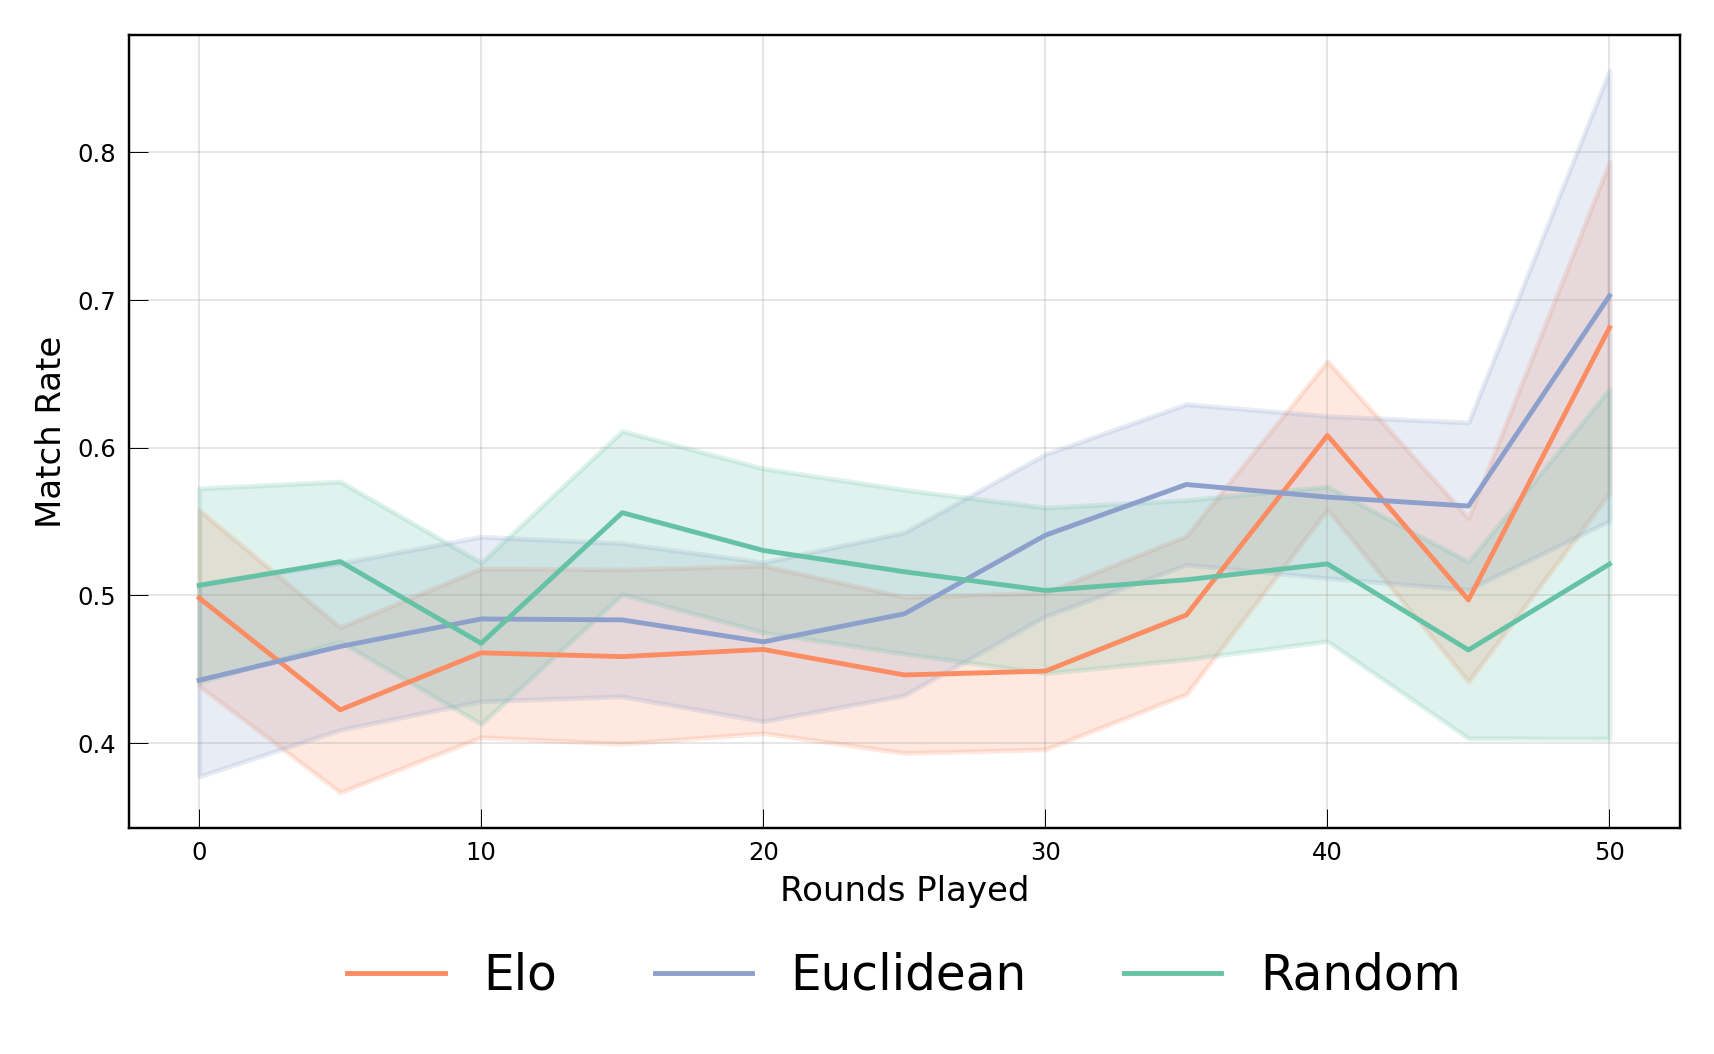

In [56]:

bin_size = 5
Swipes_with_matches['rounds_bin'] = (Swipes_with_matches['roundsPlayed'] // bin_size) * bin_size

# Group by recAlgorithm and rounds_bin, then calculate match rate
match_rate_df = Swipes_with_matches.groupby(['recAlgorithm', 'rounds_bin']).agg(
    match_count=('match', 'sum'),
    total=('match', 'count')
).reset_index()

match_rate_df['match_rate'] = match_rate_df['match_count'] / match_rate_df['total']

# Calculate standard error and confidence interval
match_rate_df['std_err'] = np.sqrt(match_rate_df['match_rate'] * (1 - match_rate_df['match_rate']) / match_rate_df['total'])
match_rate_df['ci95'] = match_rate_df['std_err'] * stats.t.ppf((1 + 0.95) / 2., match_rate_df['total'] - 1)

# Set up the matplotlib figure
plt.figure(figsize=(5, 3.5), dpi=350)

# Plot each recAlgorithm with the corresponding color
for rec_algo in match_rate_df['recAlgorithm'].unique():
    subset = match_rate_df[match_rate_df['recAlgorithm'] == rec_algo]
    color = algorithm_colours.get(rec_algo, '#000000')  # Default to black if algorithm is not found in the dictionary
    plt.plot(subset['rounds_bin'], subset['match_rate'], label=rec_algo, color=color)
    plt.fill_between(subset['rounds_bin'], subset['match_rate'] - subset['ci95'], subset['match_rate'] + subset['ci95'], color=color, alpha=0.2)

# Customize the plot
plt.xlabel('Rounds Played')
plt.ylabel('Match Rate')
plt.legend(title='', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Save and show the plot
plt.savefig("visualisations/number_of_matches_by_alg.pdf", bbox_inches='tight')
plt.show()


### Average Elo of recommendation

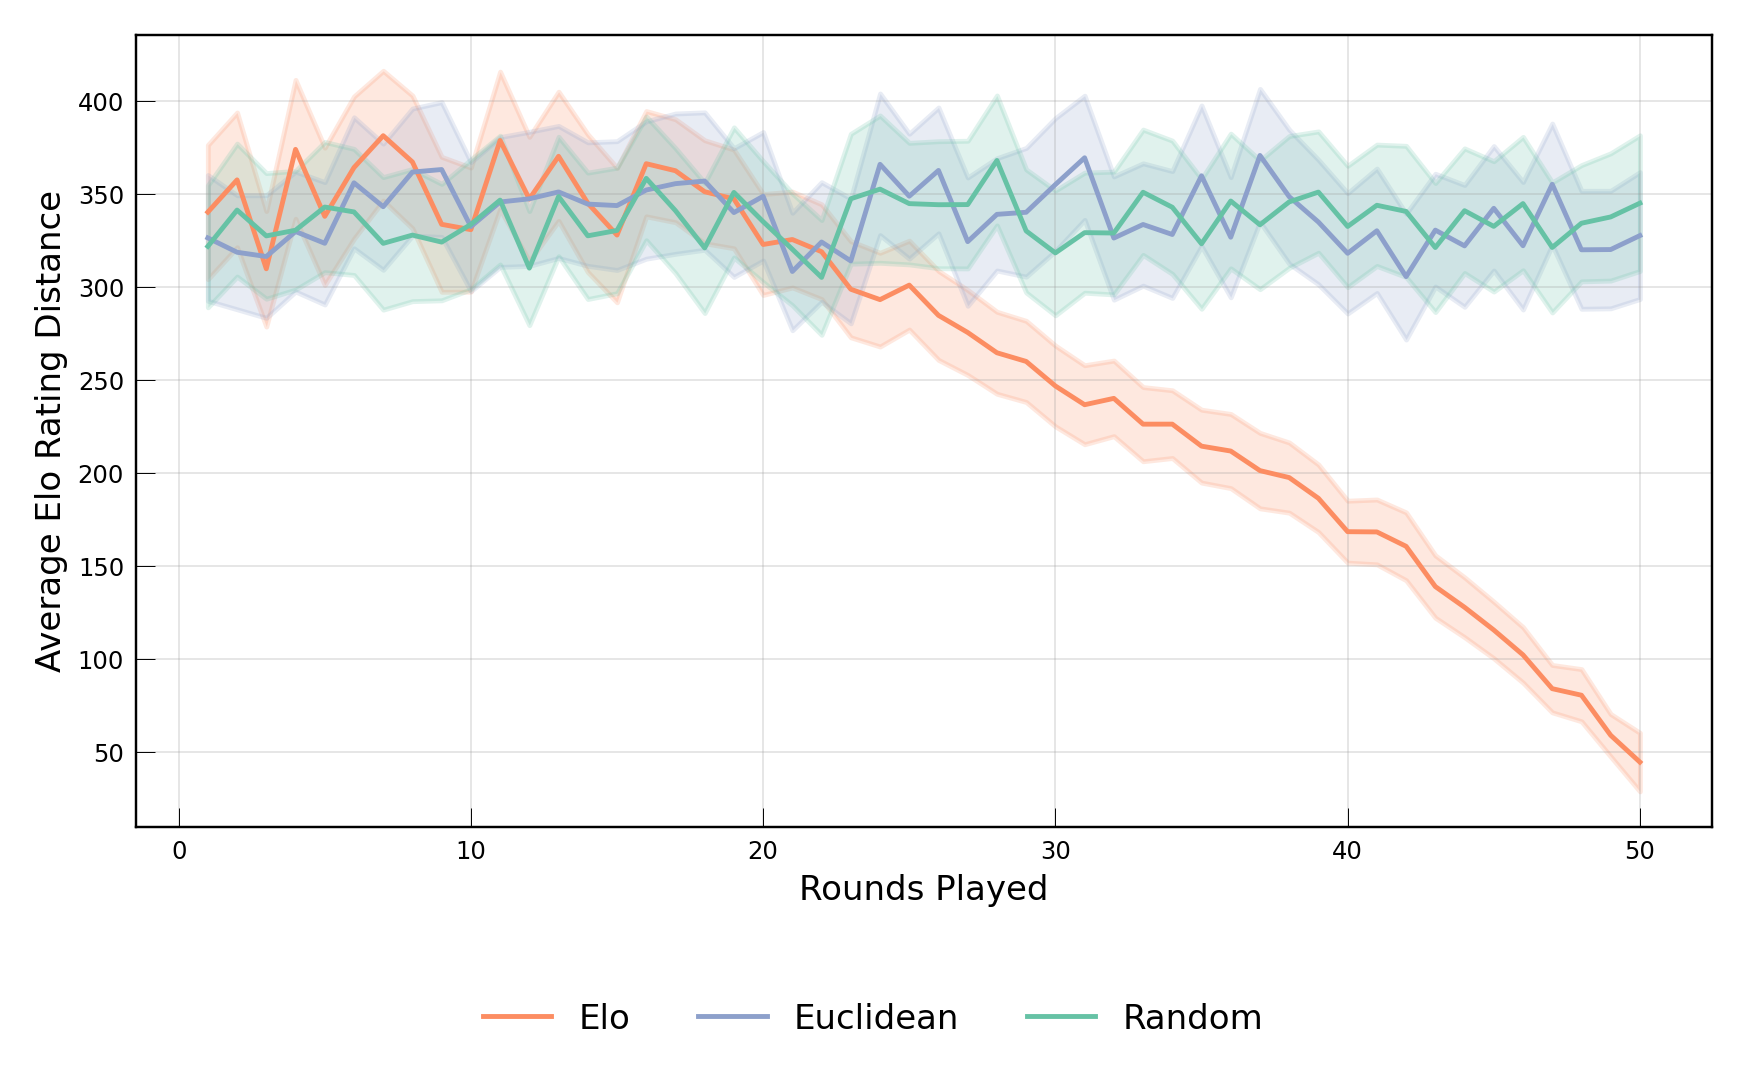

In [450]:
# Merging dataframes
disliked_profiles = SwipeDecision_df.merge(elo_ranking_df, left_on='dislikedProfile', right_on='Profile', suffixes=('', '_disliked'))
liked_profiles = SwipeDecision_df.merge(elo_ranking_df, left_on='likedProfile', right_on='Profile', suffixes=('', '_liked'))

combined_profiles_elo = pd.concat([disliked_profiles, liked_profiles])
combined_profiles_elo = combined_profiles_elo.merge(player_df, left_on='playerID', right_on='playerID')

chosen_profiles = player_df.merge(elo_ranking_df, left_on='chosenProfile', right_on='Profile', suffixes=('', '_chosen'))
combined_profiles_elo = combined_profiles_elo.merge(
    chosen_profiles[['playerID', 'chosenProfile', 'Elo Rating']],
    on='playerID',
    suffixes=('', '_chosen')
)

# Calculate elo_distance
combined_profiles_elo['elo_distance'] = combined_profiles_elo.apply(
    lambda row: abs(row['Elo Rating'] - row['Elo Rating_chosen']),
    axis=1
)

# Group by recAlgorithm and roundsPlayed, then calculate average elo distance
average_elo_distance = combined_profiles_elo.groupby(['recAlgorithm', 'roundsPlayed']).agg(
    average_elo_distance=('elo_distance', 'mean'),
    count=('elo_distance', 'count')
).reset_index()

# Calculate standard error and confidence interval
average_elo_distance['std_err'] = combined_profiles_elo.groupby(['recAlgorithm', 'roundsPlayed'])['elo_distance'].sem().reset_index(drop=True)
average_elo_distance['ci95'] = average_elo_distance['std_err'] * stats.t.ppf((1 + 0.95) / 2., average_elo_distance['count'] - 1)

# Plotting
fig, ax = plt.subplots(figsize=(5, 3), dpi=350)

for rec_algo in average_elo_distance['recAlgorithm'].unique():
    subset = average_elo_distance[average_elo_distance['recAlgorithm'] == rec_algo]
    color = algorithm_colours.get(rec_algo, '#000000')  # Default to black if algorithm is not found in the dictionary
    ax.plot(subset['roundsPlayed'], subset['average_elo_distance'], label=rec_algo, color=color)
    ax.fill_between(subset['roundsPlayed'], subset['average_elo_distance'] - subset['ci95'], subset['average_elo_distance'] + subset['ci95'], color=color, alpha=0.2)

# Customize the plot
plt.xlabel('Rounds Played')
plt.ylabel('Average Elo Rating Distance')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, [label.capitalize() for label in labels], loc='lower center', ncol=len(labels), title='')

plt.tight_layout(rect=[0, 0.1, 1, 1])

# Save and show the plot
plt.savefig("visualisations/elo_disparity_between_recommended_and_own_character.pdf", bbox_inches='tight')
plt.show()


### Which attributes did they say made them pick one character over another during swiping?

Survey Question"
 - For each of the following profile characteristics, indicate whether the chosen character was better, both were about the same, or the other character was better.

In [58]:
#filtered_algorithm_df

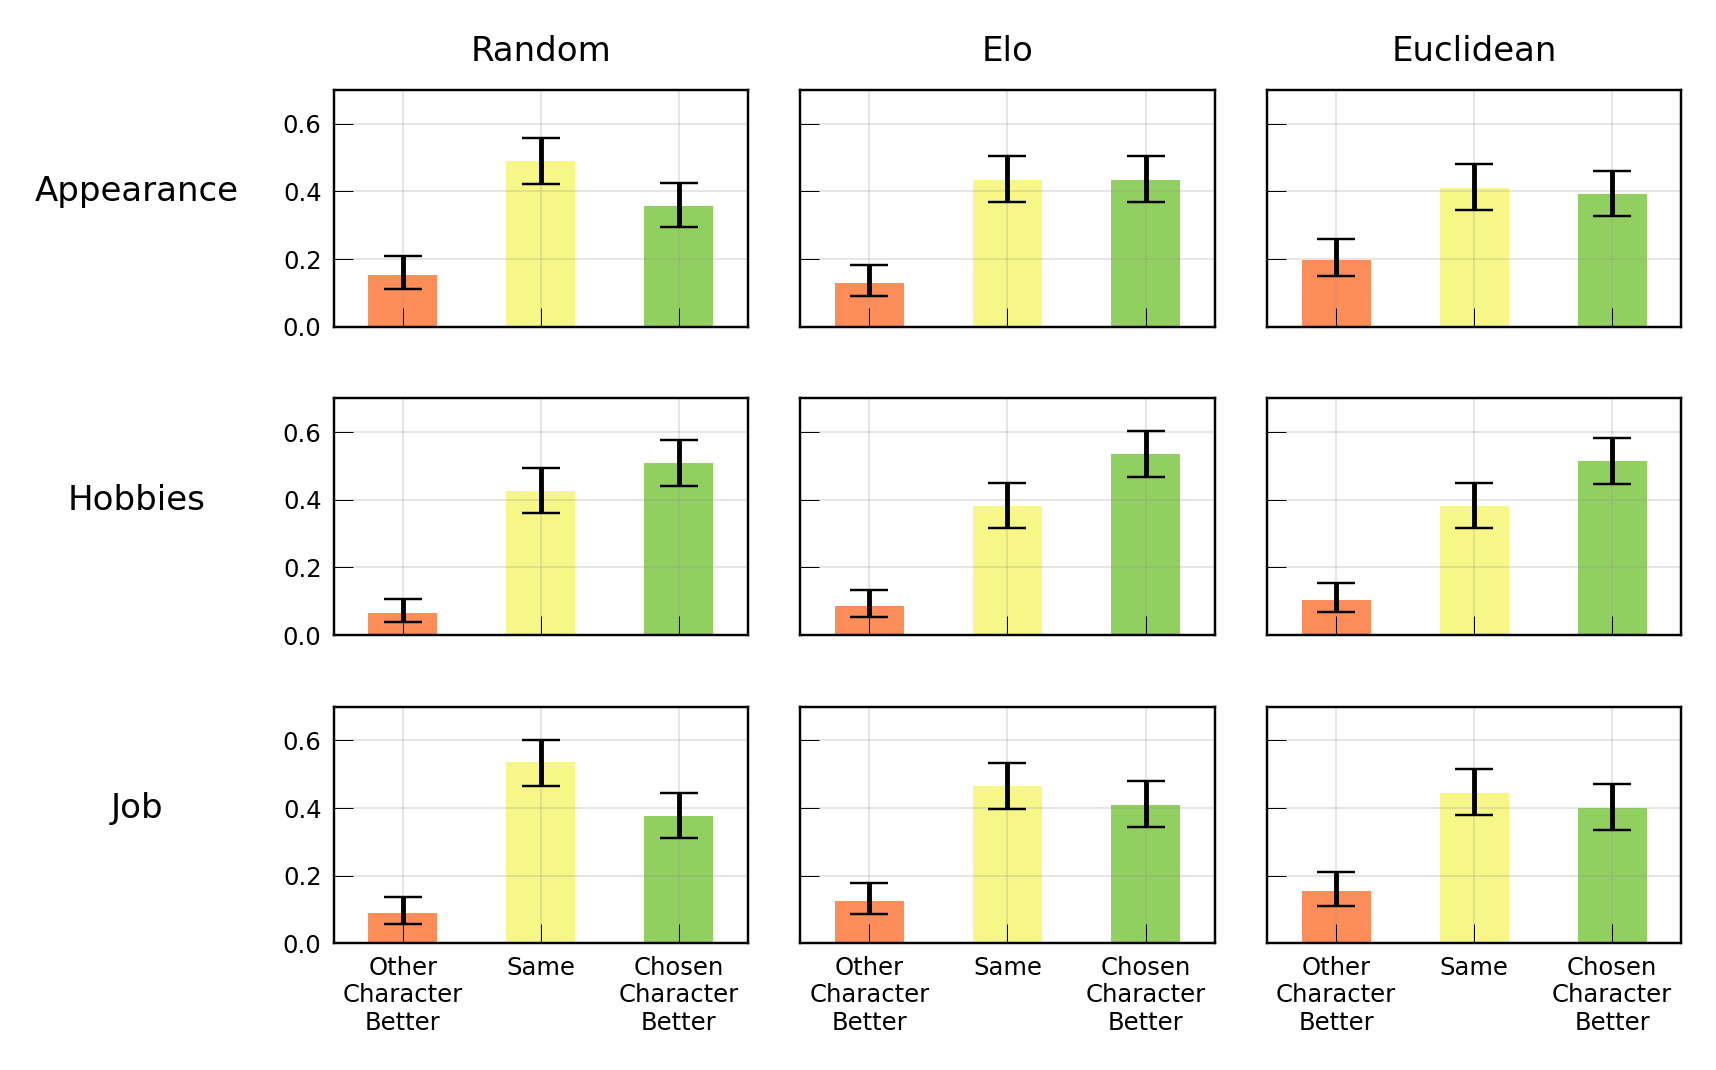

In [59]:
merged_df = SwipeProfileProfileChoiceSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')
merged_df = merged_df.merge(SwipeDecision_df[['id', 'roundsPlayed']], on = 'id')
merged_df = merged_df[merged_df['roundsPlayed']>30]

attribute_columns = ['AttributeAppearance', 'AttributeHobbies', 'AttributeJob']
attribute_categories = ['notChosenBetter', 'same', 'chosenBetter']

filtered_df = merged_df#[merged_df['attentionCheck'] != 'attentionAgeIsSame']

rec_algorithms = merged_df['recAlgorithm'].unique()

colors = ['#fc8d59', '#f7f788', '#91cf60']

fig, axes = plt.subplots(len(attribute_columns), len(rec_algorithms), figsize=(5, 3), sharex=True, dpi=350)

attribute_categories_improved = ['Other Character Better', 'Same', 'Chosen Character Better']
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=10)) for label in attribute_categories_improved]

def wilson_score_interval(count, n, z=1.96):
    if n == 0:
        return 0, 0
    phat = count / n
    denominator = 1 + z**2 / n
    centre_adjusted_probability = phat + z**2 / (2*n)
    adjusted_standard_deviation = np.sqrt((phat*(1 - phat) + z**2 / (4*n)) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

for col_idx, col in enumerate(attribute_columns):
    for row_idx, algorithm in enumerate(rec_algorithms):
        ax = axes[col_idx, row_idx]
        filtered_algorithm_df = filtered_df[filtered_df['recAlgorithm'] == algorithm]
        
        counts = filtered_algorithm_df[col].value_counts(normalize=False).reindex(attribute_categories, fill_value=0)
        proportions = counts / counts.sum()
        
        ci_lower = []
        ci_upper = []
        for count in counts:
            lower, upper = wilson_score_interval(count, counts.sum())
            ci_lower.append(lower)
            ci_upper.append(upper)
        
        errors = np.array([proportions - ci_lower, ci_upper - proportions])
        
        proportions.plot(kind='bar', ax=ax, color=colors, yerr=errors, capsize=4, legend=False)
        ax.set_xlabel('')
        ax.set_xticklabels(wrapped_labels, rotation=0)
        ax.set_ylim(0, 0.7)
        if col_idx == 0:
            ax.set_title(f'{algorithm}'.capitalize())
        if row_idx == 0:
            ax.set_ylabel(col.replace('Attribute', ''), rotation=0, labelpad=30)
        else:
            ax.set_yticklabels([])

plt.tight_layout()
plt.subplots_adjust(left=0.2, top=0.95)

plt.savefig("visualisations/survey_45_round_attributes_in_which_char_was_better.pdf", bbox_inches='tight')

plt.show()

### How did the perceived difficulty of their choice change during the experiment?

Survey Question:
 - How well do the recommended characters fit with your character?

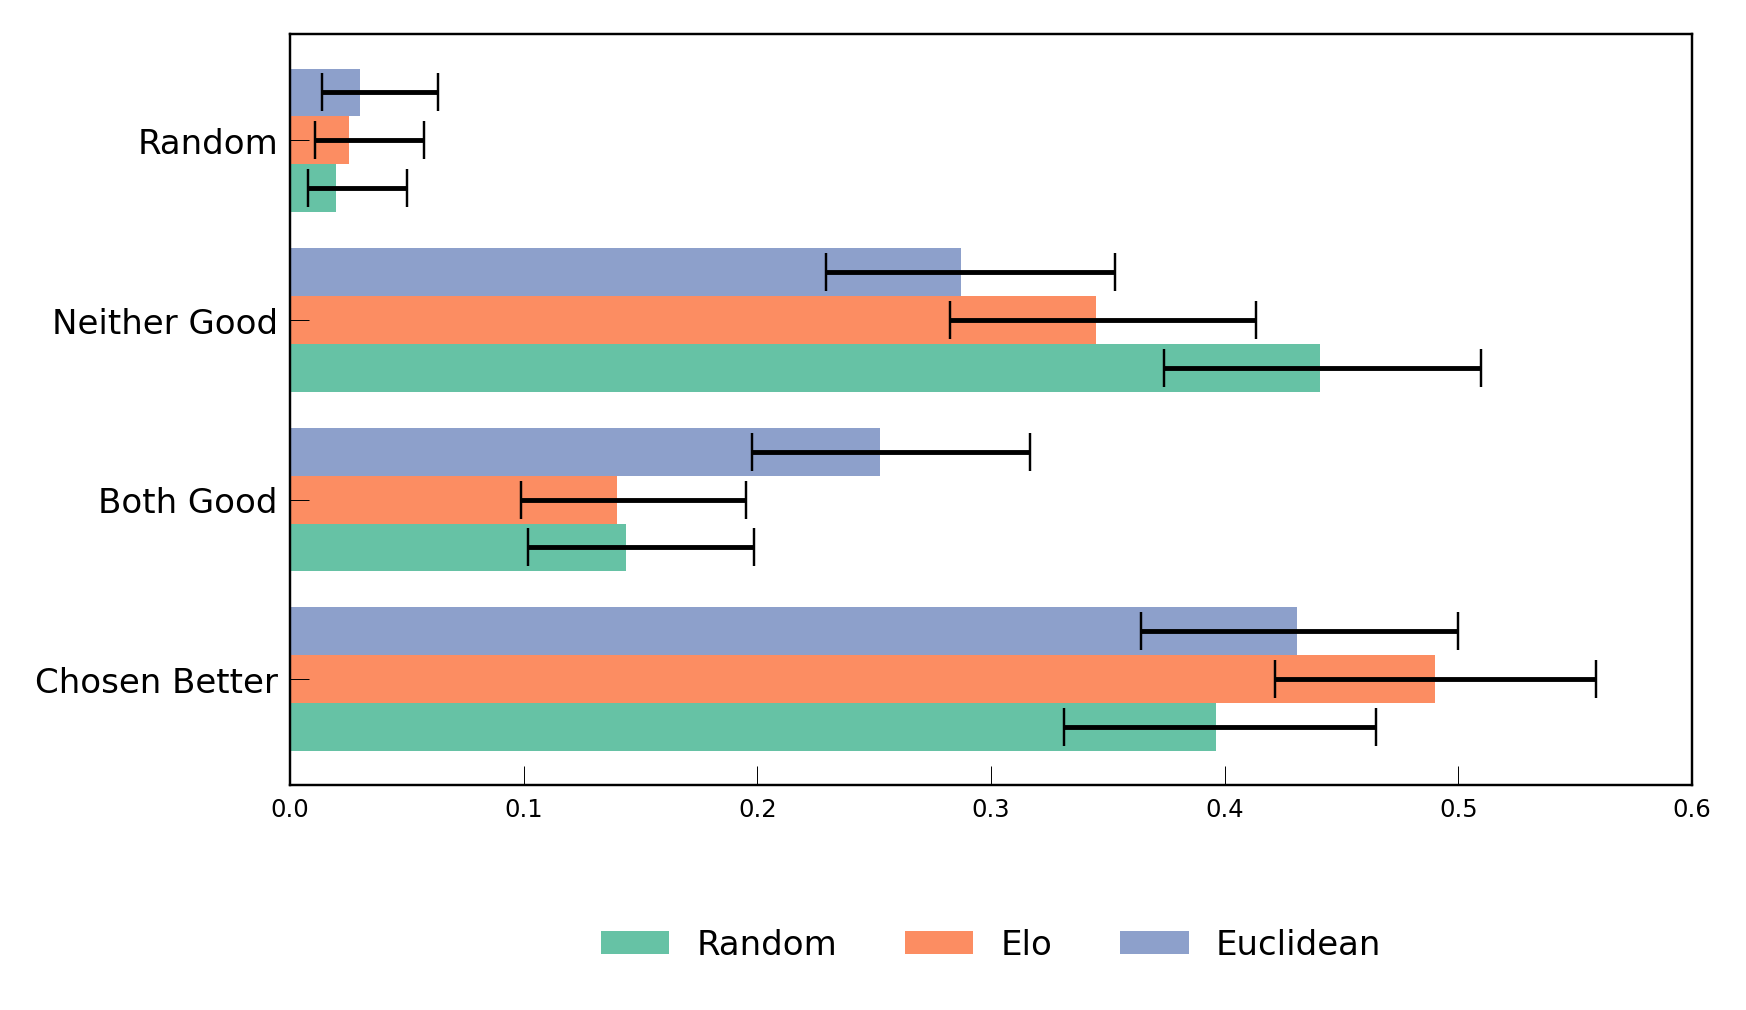

In [663]:
merged_df = SwipeProfileProfileChoiceSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')
merged_df = merged_df.merge(SwipeDecision_df[['id', 'roundsPlayed']], on='id')
merged_df = merged_df[merged_df['roundsPlayed'] > 26]

# Defining columns and categories
choice_column = 'AttributeDifficulty'
choice_categories = [
    'chosenBetter', 
    'bothGood',
    'neitherGood', 
    'random'
]

adjusted_labels = [
    'Chosen Better',
    'Both Good',
    'Neither Good',
    'Random'
]

rec_algorithms = merged_df['recAlgorithm'].unique()

# Calculate value counts normalized
grouped_counts = {
    algorithm: merged_df[merged_df['recAlgorithm'] == algorithm][choice_column].value_counts(normalize=True).reindex(choice_categories, fill_value=0)
    for algorithm in rec_algorithms
}

grouped_counts_df = pd.DataFrame(grouped_counts, index=choice_categories)

# Calculate confidence intervals
def wilson_score_interval(count, n, z=1.96):
    if n == 0:
        return 0, 0
    phat = count / n
    denominator = 1 + z**2 / n
    centre_adjusted_probability = phat + z**2 / (2*n)
    adjusted_standard_deviation = np.sqrt((phat*(1 - phat) + z**2 / (4*n)) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

ci_lower = pd.DataFrame(index=choice_categories, columns=rec_algorithms)
ci_upper = pd.DataFrame(index=choice_categories, columns=rec_algorithms)

for algorithm in rec_algorithms:
    counts = merged_df[merged_df['recAlgorithm'] == algorithm][choice_column].value_counts().reindex(choice_categories, fill_value=0)
    total = counts.sum()
    for category in choice_categories:
        lower, upper = wilson_score_interval(counts[category], total)
        ci_lower.loc[category, algorithm] = lower
        ci_upper.loc[category, algorithm] = upper

errors = [grouped_counts_df - ci_lower, ci_upper - grouped_counts_df]

# Plotting
fig, ax = plt.subplots(figsize=(5, 3), dpi=350)

n_categories = len(choice_categories)
n_algorithms = len(rec_algorithms)
bar_height = 0.8 / n_algorithms

bar_positions = range(n_categories)

for i, algorithm in enumerate(rec_algorithms):
    bar_offset = (i - (n_algorithms / 2)) * bar_height + bar_height / 2
    color = algorithm_colours.get(algorithm, '#000000')  # Default to black if algorithm is not found in the dictionary
    ax.barh(
        [pos + bar_offset for pos in bar_positions],
        grouped_counts_df[algorithm],
        height=bar_height,
        xerr=[errors[0][algorithm], errors[1][algorithm]],  # Adding error bars
        label=algorithm,
        color=color,
        capsize=4
    )

ax.set_yticks(bar_positions)
ax.set_yticklabels(adjusted_labels, rotation=0, fontsize=7)

ax.set_xlim(0, 0.6)
ax.grid(False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [label.capitalize() for label in labels], bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(rec_algorithms))

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("visualisations/survey_45_round_fit_of_character.pdf", bbox_inches='tight')
plt.show()

In [180]:
0.2+0.28+0.23+0.43

1.1400000000000001

### How did they perceive the recommendations to improve during the experiment? 

Survey Question:
- Do you feel that the recommendation system has learned and improved its suggestions since you began interacting with it?

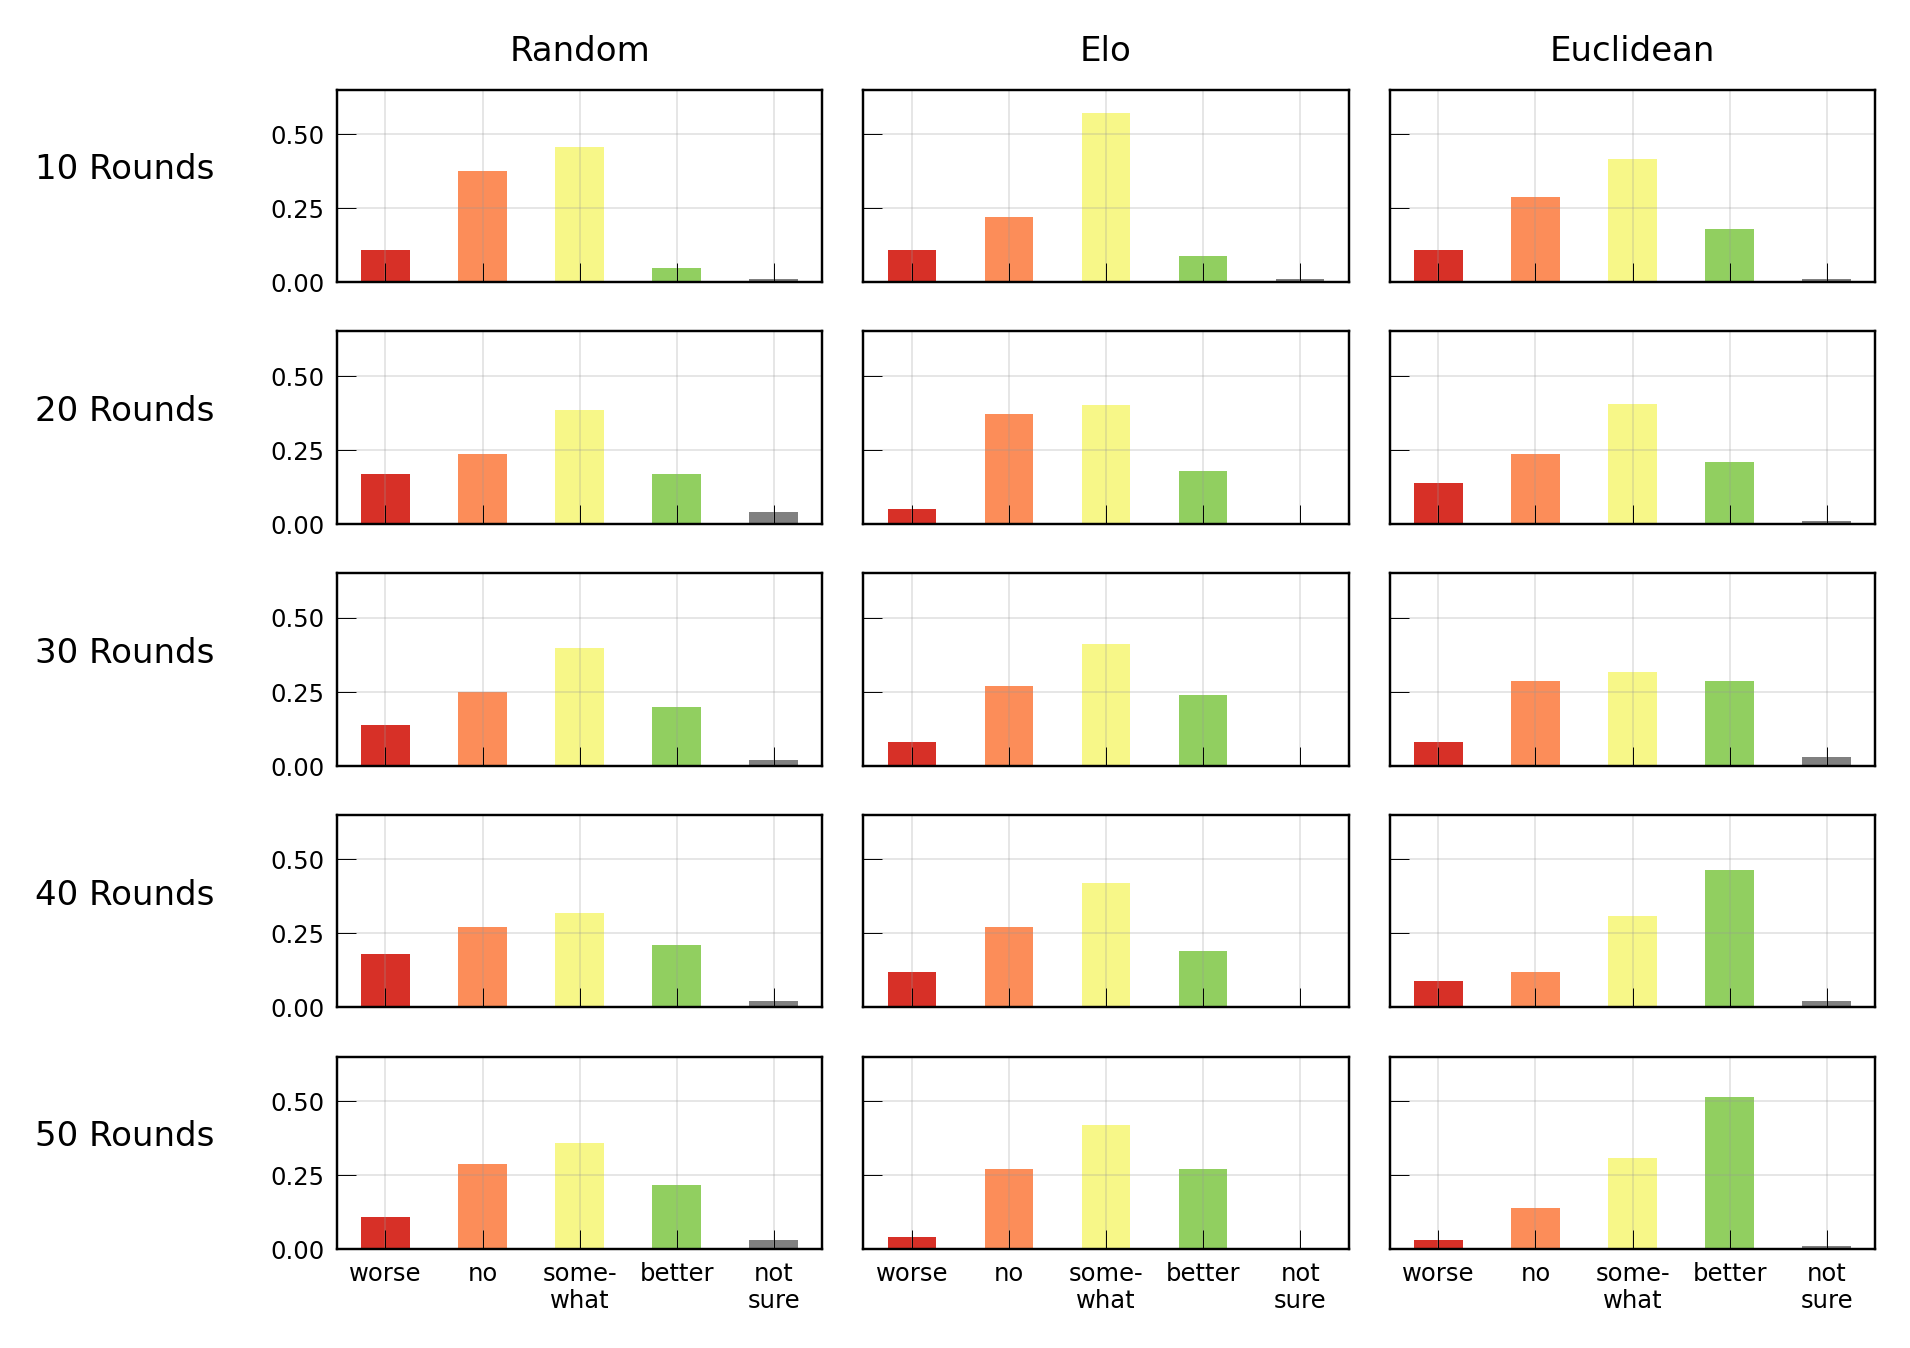

In [665]:
merged_df = SwipeProfileRecSystemSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')

rounds_played_categories = [10, 20, 30, 40, 50]
improvement_categories = ['worse', 'no', 'somewhat', 'better', 'notSure']
adjusted_improvement_categories = ['worse', 'no', 'some-\nwhat', 'better', 'not\nsure']


rec_algorithms = merged_df['recAlgorithm'].unique()

colors = ['#d73027', '#fc8d59', '#f7f788', '#91cf60', 'grey']

fig, axes = plt.subplots(len(rounds_played_categories), len(rec_algorithms), figsize=(5, 4), sharey=True, dpi=350)

for row, rounds in enumerate(rounds_played_categories):
    for col, algorithm in enumerate(rec_algorithms):
        filtered_df = merged_df[(merged_df['recAlgorithm'] == algorithm) & (merged_df['roundsPlayed'] == rounds)]
        
        counts = filtered_df['Improvement'].value_counts(normalize=True).reindex(improvement_categories, fill_value=0)
        
        counts.plot(kind='bar', ax=axes[row, col], color=colors, legend=False)
        
        if row == len(rounds_played_categories) - 1:
            axes[row, col].set_xticklabels(adjusted_improvement_categories, rotation=0)
        else:
            axes[row, col].set_xticklabels([])
        
        if col == 0:
            axes[row, col].set_ylabel(f'{rounds} Rounds', rotation=0, labelpad=30)
        
        if row == 0:
            axes[row, col].set_title(algorithm.capitalize())
        
        axes[row, col].set_ylim(0, 0.65)

plt.tight_layout()
plt.subplots_adjust(top=0.9, left=0.1)
plt.savefig("visualisations/survey_did_recommendations_improve.pdf", bbox_inches='tight')
plt.show()

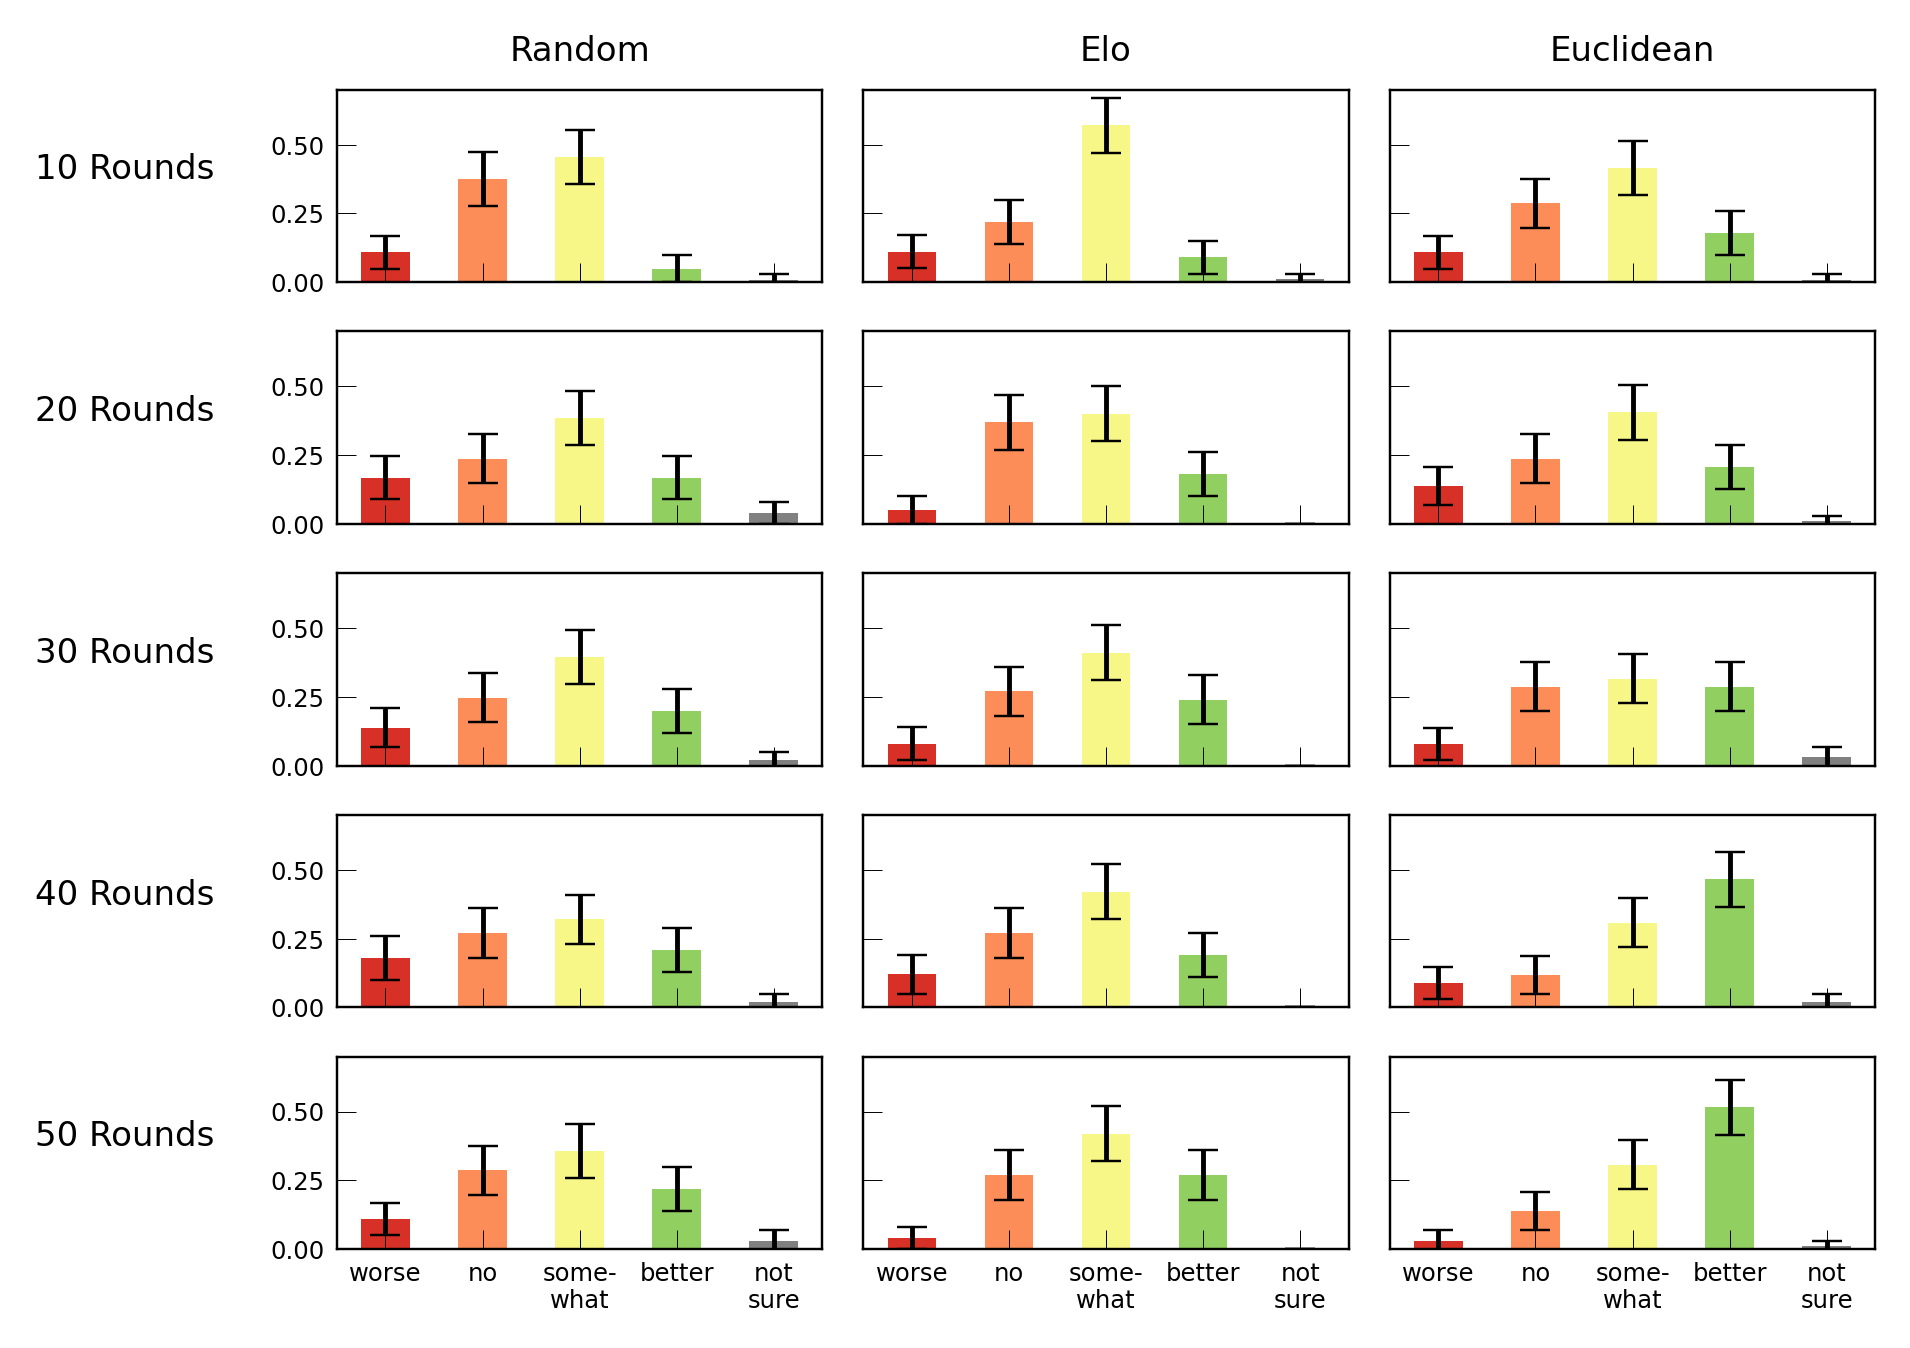

In [668]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming merged_df, rounds_played_categories, etc. are already defined as per your code

fig, axes = plt.subplots(len(rounds_played_categories), len(rec_algorithms), figsize=(5, 4), sharey=True, dpi=350)

for row, rounds in enumerate(rounds_played_categories):
    for col, algorithm in enumerate(rec_algorithms):
        filtered_df = merged_df[(merged_df['recAlgorithm'] == algorithm) & (merged_df['roundsPlayed'] == rounds)]
        
        counts = filtered_df['Improvement'].value_counts(normalize=True).reindex(improvement_categories, fill_value=0)
        
        # Calculate confidence intervals
        n = len(filtered_df)
        conf_intervals = []
        for count in counts:
            if n == 0:
                conf_intervals.append((0, 0))  # No data case
            else:
                ci = stats.binom.interval(0.95, n, count, loc=0)
                conf_intervals.append((ci[1] - count * n) / n)  # Adjust to be relative to proportion
        
        # Convert conf_intervals list into an array for error bars
        error_bars = np.array(conf_intervals).T
        
        # Plot with error bars
        counts.plot(kind='bar', ax=axes[row, col], color=colors, legend=False, yerr=error_bars, capsize=3)
        
        # Remove the background grid
        axes[row, col].grid(False)
        
        if row == len(rounds_played_categories) - 1:
            axes[row, col].set_xticklabels(adjusted_improvement_categories, rotation=0)
        else:
            axes[row, col].set_xticklabels([])
        
        if col == 0:
            axes[row, col].set_ylabel(f'{rounds} Rounds', rotation=0, labelpad=30)
        
        if row == 0:
            axes[row, col].set_title(algorithm.capitalize())
        
        axes[row, col].set_ylim(0, 0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.9, left=0.1)
plt.savefig("visualisations/survey_did_recommendations_improve.pdf", bbox_inches='tight')
plt.show()


### How did they perceive the recommendation variety to change during the experiment? 

Survey Question:
- How would you describe the variety of user profiles you get recommended?

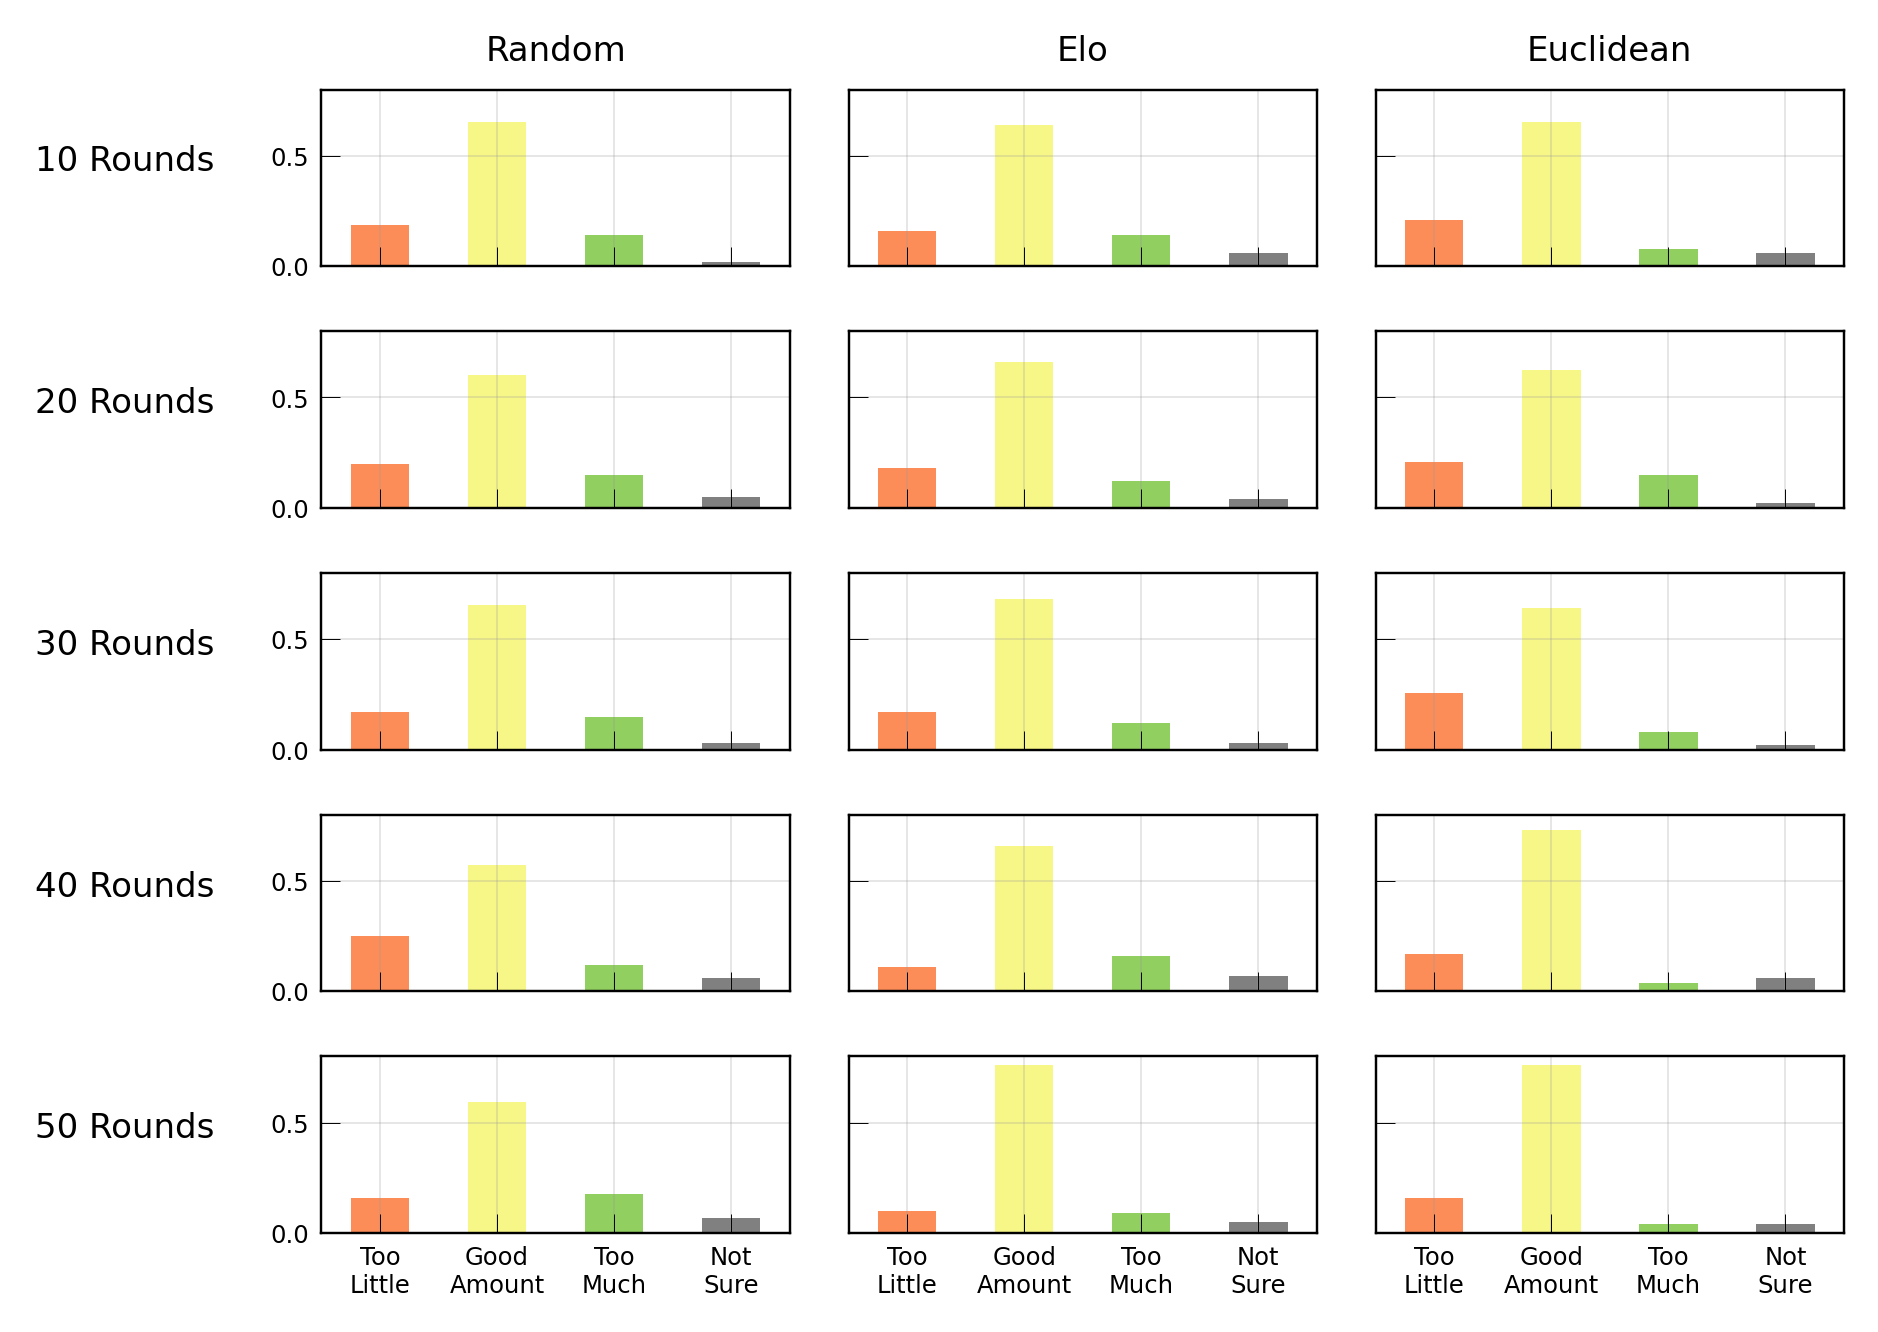

In [64]:
merged_df = SwipeProfileRecSystemSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')

rounds_played_categories = [10, 20, 30, 40, 50]
variety_categories = ['tooLittle', 'goodAmount', 'tooMuch', 'notSure']

adjusted_variety_labels = ['Too\nLittle', 'Good\nAmount', 'Too\nMuch', 'Not\nSure']

rec_algorithms = merged_df['recAlgorithm'].unique()

colors = ['#fc8d59', '#f7f788', '#91cf60', 'grey']

fig, axes = plt.subplots(len(rounds_played_categories), len(rec_algorithms), figsize=(5, 4), sharey=True, dpi=350)

for row, rounds in enumerate(rounds_played_categories):
    for col, algorithm in enumerate(rec_algorithms):
        filtered_df = merged_df[(merged_df['recAlgorithm'] == algorithm) & (merged_df['roundsPlayed'] == rounds)]
        
        counts = filtered_df['Variety'].value_counts(normalize=True).reindex(variety_categories, fill_value=0)
        
        counts.plot(kind='bar', ax=axes[row, col], color=colors, legend=False)
        
        if row == len(rounds_played_categories) - 1:
            axes[row, col].set_xticklabels(adjusted_variety_labels, rotation=0)
        else:
            axes[row, col].set_xticklabels([])
        
        if col == 0:
            axes[row, col].set_ylabel(f'{rounds} Rounds', rotation=0, labelpad=30)
        
        if row == 0:
            axes[row, col].set_title(algorithm.capitalize())
        
        axes[row, col].set_ylim(0, 0.8)

plt.tight_layout()
plt.subplots_adjust(top=0.9, left=0.1)
plt.savefig("visualisations/survey_variety_of_recommendations.pdf", bbox_inches='tight')
plt.show()

### Which attributes do they think the algorithm learnt?

Survey Question:
- To what extent do you think the algorithm learned about your character’s preferences regarding the following attributes? Rank each:

In [65]:
# merged_df = endRecSystemSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')

# attribute_columns = [col for col in endRecSystemSurvey_df.columns if 'algorithmLearntAttribute' in col]
# attribute_categories = ['Did not learn', 'Learned slowly', 'Learned quickly']

# rec_algorithms = merged_df['recAlgorithm'].unique()

# colors = ['#fc8d59', '#f7f788', '#91cf60']

# fig, axes = plt.subplots(len(attribute_columns), len(rec_algorithms), figsize=(5, 4), sharey=True, dpi=350)

# for row, attribute in enumerate(attribute_columns):
#     for col, algorithm in enumerate(rec_algorithms):
#         filtered_df = merged_df[merged_df['recAlgorithm'] == algorithm]
        
#         counts = filtered_df[attribute].value_counts(normalize=True).reindex(attribute_categories, fill_value=0)
        
#         counts.plot(kind='bar', ax=axes[row, col], color=colors, legend=False)
        
#         if row == len(attribute_columns) - 1:
#             axes[row, col].set_xticklabels(attribute_categories, rotation=0)
#         else:
#             axes[row, col].set_xticklabels([])
        
#         if col == 0:
#             axes[row, col].set_ylabel(attribute.replace('algorithmLearntAttribute-', ''), rotation=0, labelpad=30)
        
#         if row == 0:
#             axes[row, col].set_title(algorithm.capitalize())
        
#         axes[row, col].set_ylim(0, 0.7)


# plt.tight_layout()
# plt.subplots_adjust(top=0.9, left=0.1)
# plt.savefig("visualisations/end_survey_what_did_recommender_learn.pdf", bbox_inches='tight')
# plt.show()

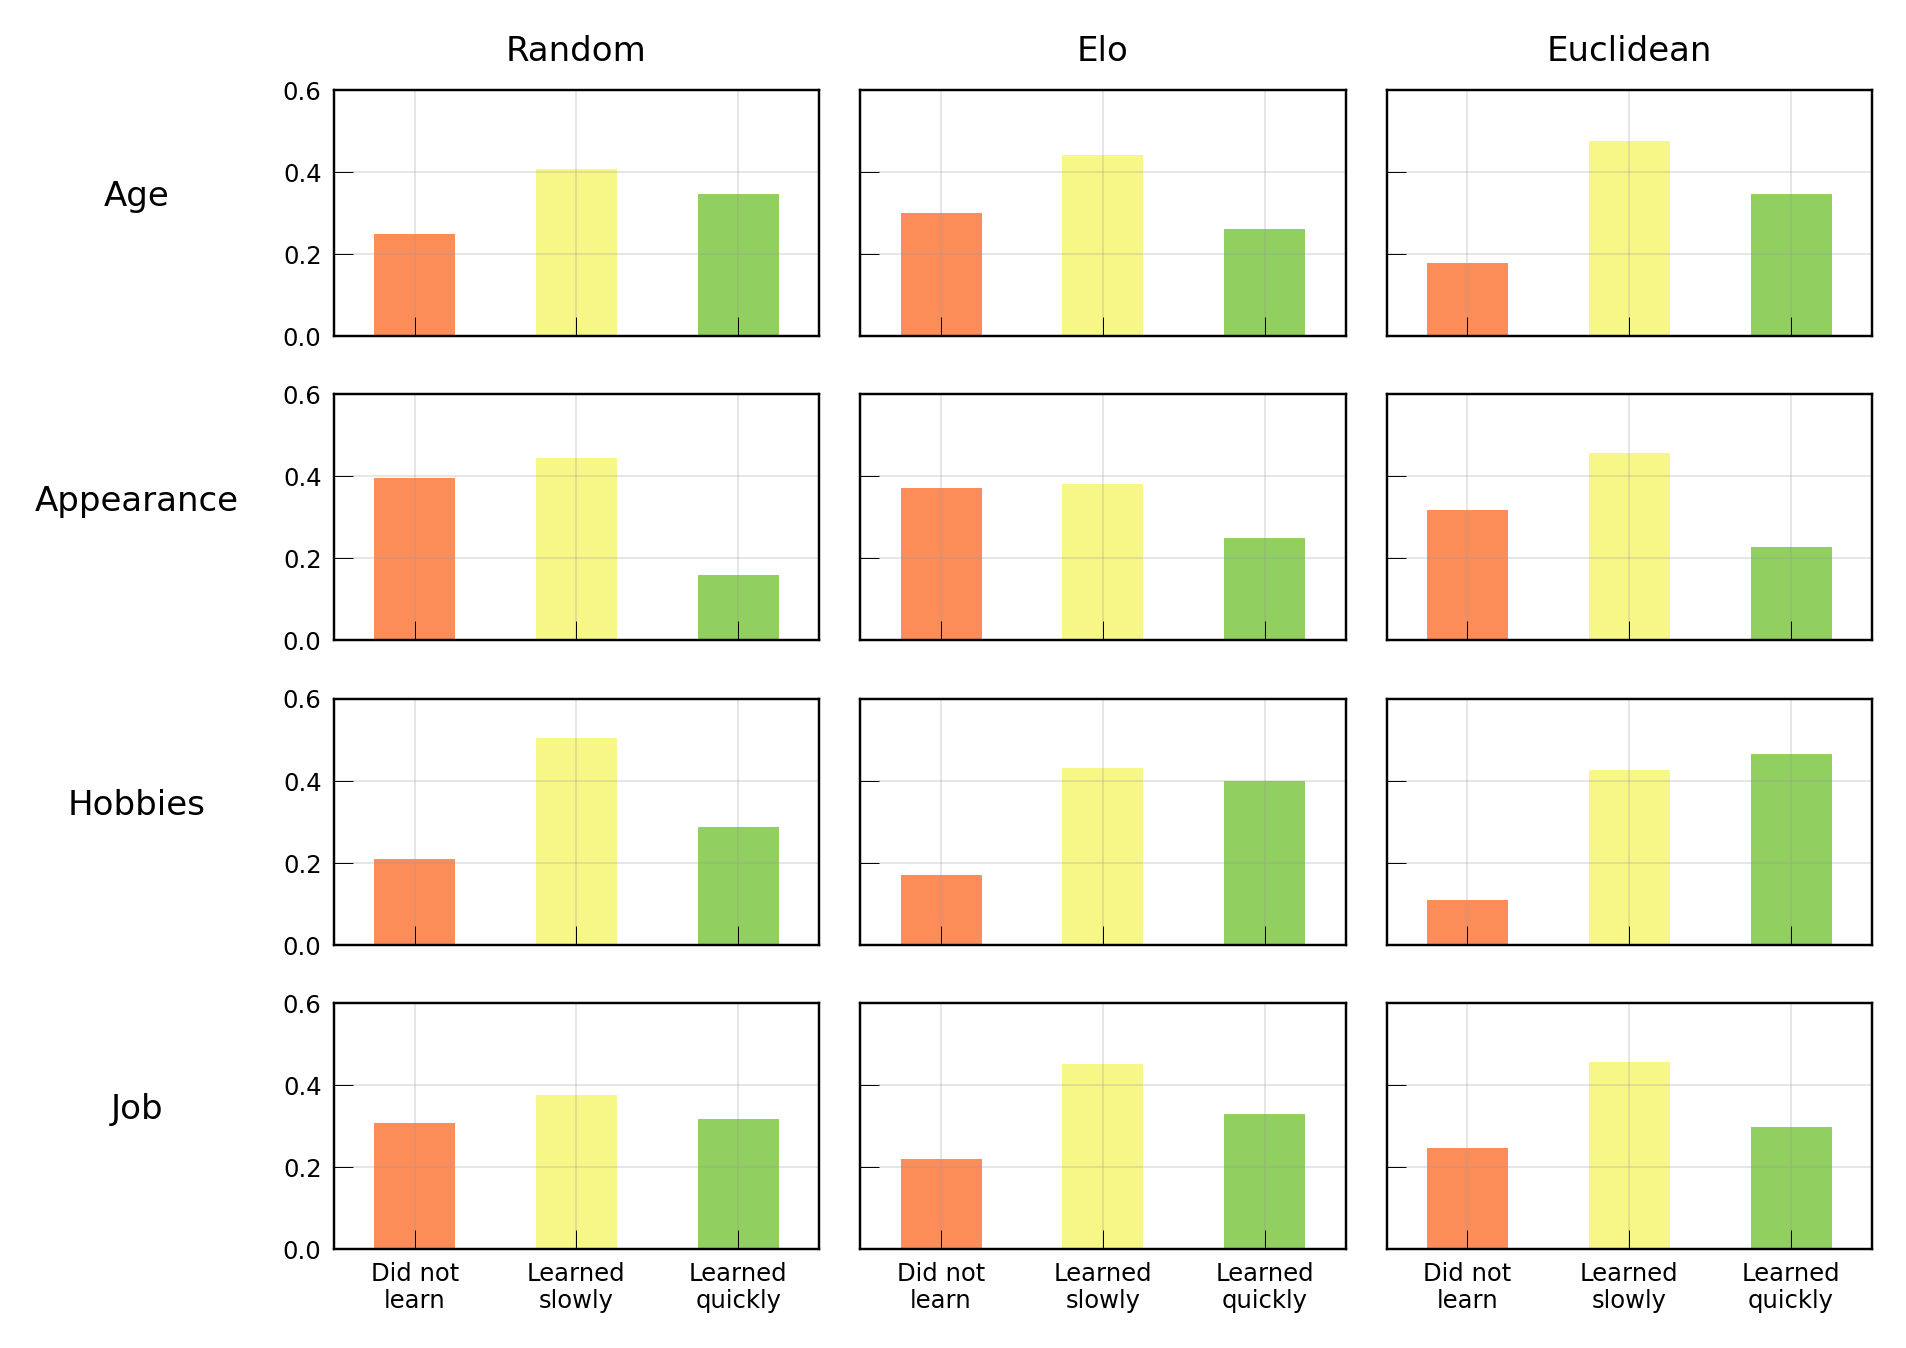

In [670]:
merged_df = endRecSystemSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')

attribute_columns = [col for col in endRecSystemSurvey_df.columns if 'algorithmLearntAttribute' in col]
attribute_categories = ['Did not learn', 'Learned slowly', 'Learned quickly']

rec_algorithms = merged_df['recAlgorithm'].unique()

colors = ['#fc8d59', '#f7f788', '#91cf60']

fig, axes = plt.subplots(len(attribute_columns), len(rec_algorithms), figsize=(5, 4), sharey=True, dpi=350)

for row, attribute in enumerate(attribute_columns):
    for col, algorithm in enumerate(rec_algorithms):
        filtered_df = merged_df[merged_df['recAlgorithm'] == algorithm]
        
        counts = filtered_df[attribute].value_counts(normalize=True).reindex(attribute_categories, fill_value=0)
        
        counts.plot(kind='bar', ax=axes[row, col], color=colors, legend=False)
        
        if row == len(attribute_columns) - 1:
            # Add \n for line breaks in plotted labels
            plotted_labels = ['Did not\nlearn', 'Learned\nslowly', 'Learned\nquickly']
            axes[row, col].set_xticklabels(plotted_labels, rotation=0)
        else:
            axes[row, col].set_xticklabels([])
        
        if col == 0:
            ylabel = attribute.replace('algorithmLearntAttribute-', '').replace('-', ' ')
            axes[row, col].set_ylabel(ylabel, rotation=0, labelpad=30)
        
        if row == 0:
            axes[row, col].set_title(algorithm.capitalize())
        
        axes[row, col].set_ylim(0, 0.6)

plt.tight_layout()
plt.subplots_adjust(top=0.9, left=0.1)
plt.savefig("visualisations/end_survey_what_did_recommender_learn.pdf", bbox_inches='tight')
plt.show()


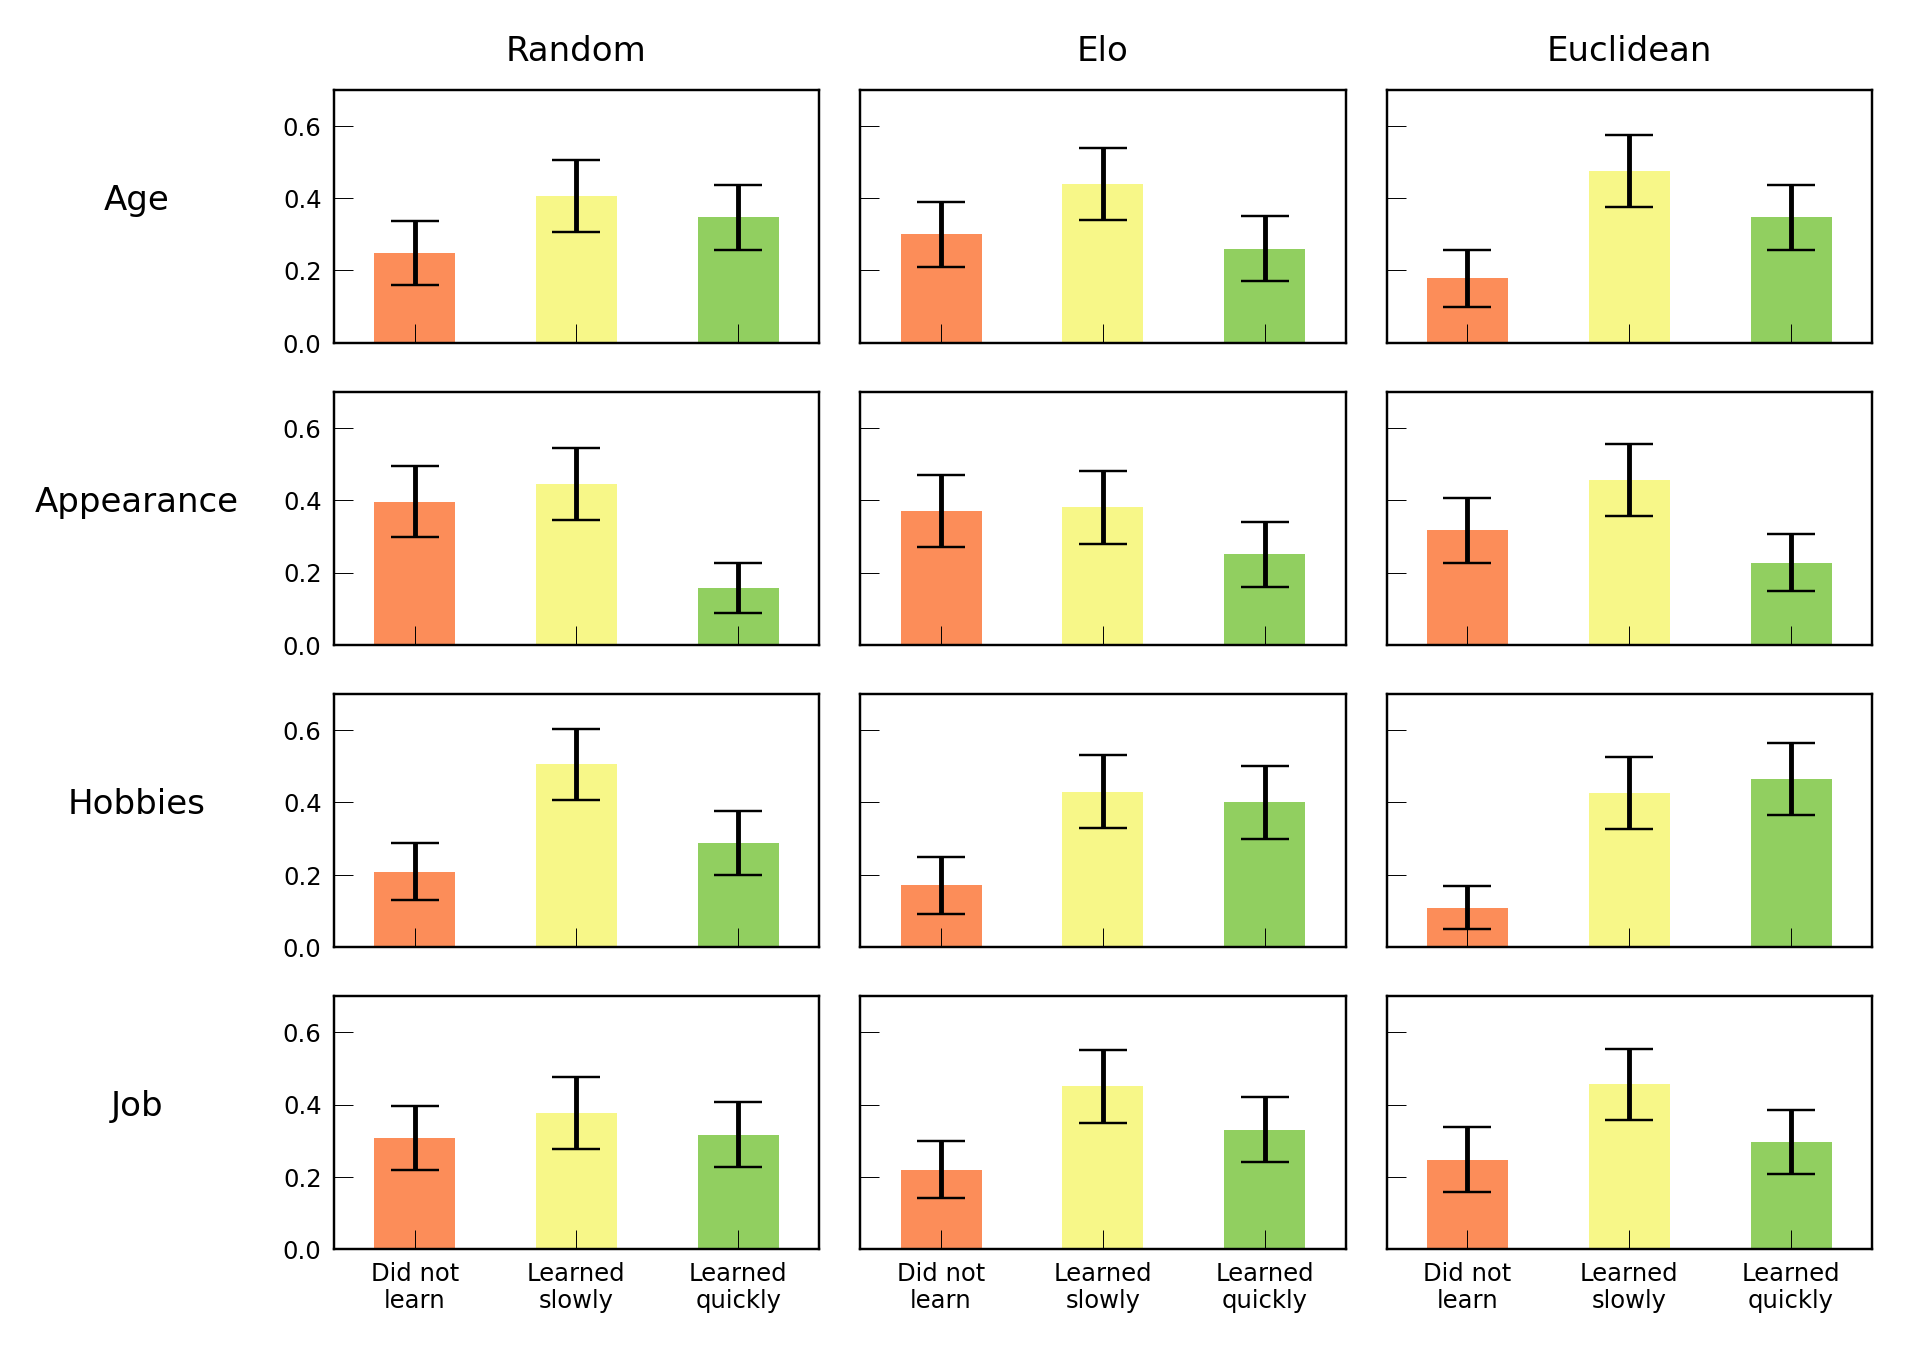

In [672]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming merged_df, attribute_columns, etc. are already defined as per your code

fig, axes = plt.subplots(len(attribute_columns), len(rec_algorithms), figsize=(5, 4), sharey=True, dpi=350)

for row, attribute in enumerate(attribute_columns):
    for col, algorithm in enumerate(rec_algorithms):
        filtered_df = merged_df[merged_df['recAlgorithm'] == algorithm]
        
        counts = filtered_df[attribute].value_counts(normalize=True).reindex(attribute_categories, fill_value=0)
        
        # Calculate confidence intervals
        n = len(filtered_df)
        conf_intervals = []
        for count in counts:
            if n == 0:
                conf_intervals.append((0, 0))  # No data case
            else:
                ci = stats.binom.interval(0.95, n, count, loc=0)
                conf_intervals.append((ci[1] - count * n) / n)  # Adjust to be relative to proportion
        
        # Convert conf_intervals list into an array for error bars
        error_bars = np.array(conf_intervals).T
        
        # Plot with error bars
        counts.plot(kind='bar', ax=axes[row, col], color=colors, legend=False, yerr=error_bars, capsize=5)
        
        # Remove the background grid
        axes[row, col].grid(False)
        
        if row == len(attribute_columns) - 1:
            # Add \n for line breaks in plotted labels
            plotted_labels = ['Did not\nlearn', 'Learned\nslowly', 'Learned\nquickly']
            axes[row, col].set_xticklabels(plotted_labels, rotation=0)
        else:
            axes[row, col].set_xticklabels([])
        
        if col == 0:
            ylabel = attribute.replace('algorithmLearntAttribute-', '').replace('-', ' ')
            axes[row, col].set_ylabel(ylabel, rotation=0, labelpad=30)
        
        if row == 0:
            axes[row, col].set_title(algorithm.capitalize())
        
        axes[row, col].set_ylim(0, 0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.9, left=0.1)
plt.savefig("visualisations/end_survey_what_did_recommender_learn.pdf", bbox_inches='tight')
plt.show()


### How did they perceive algorithm diversity?

Survey Question:
- Regarding the diversity of recommendations, do you think:

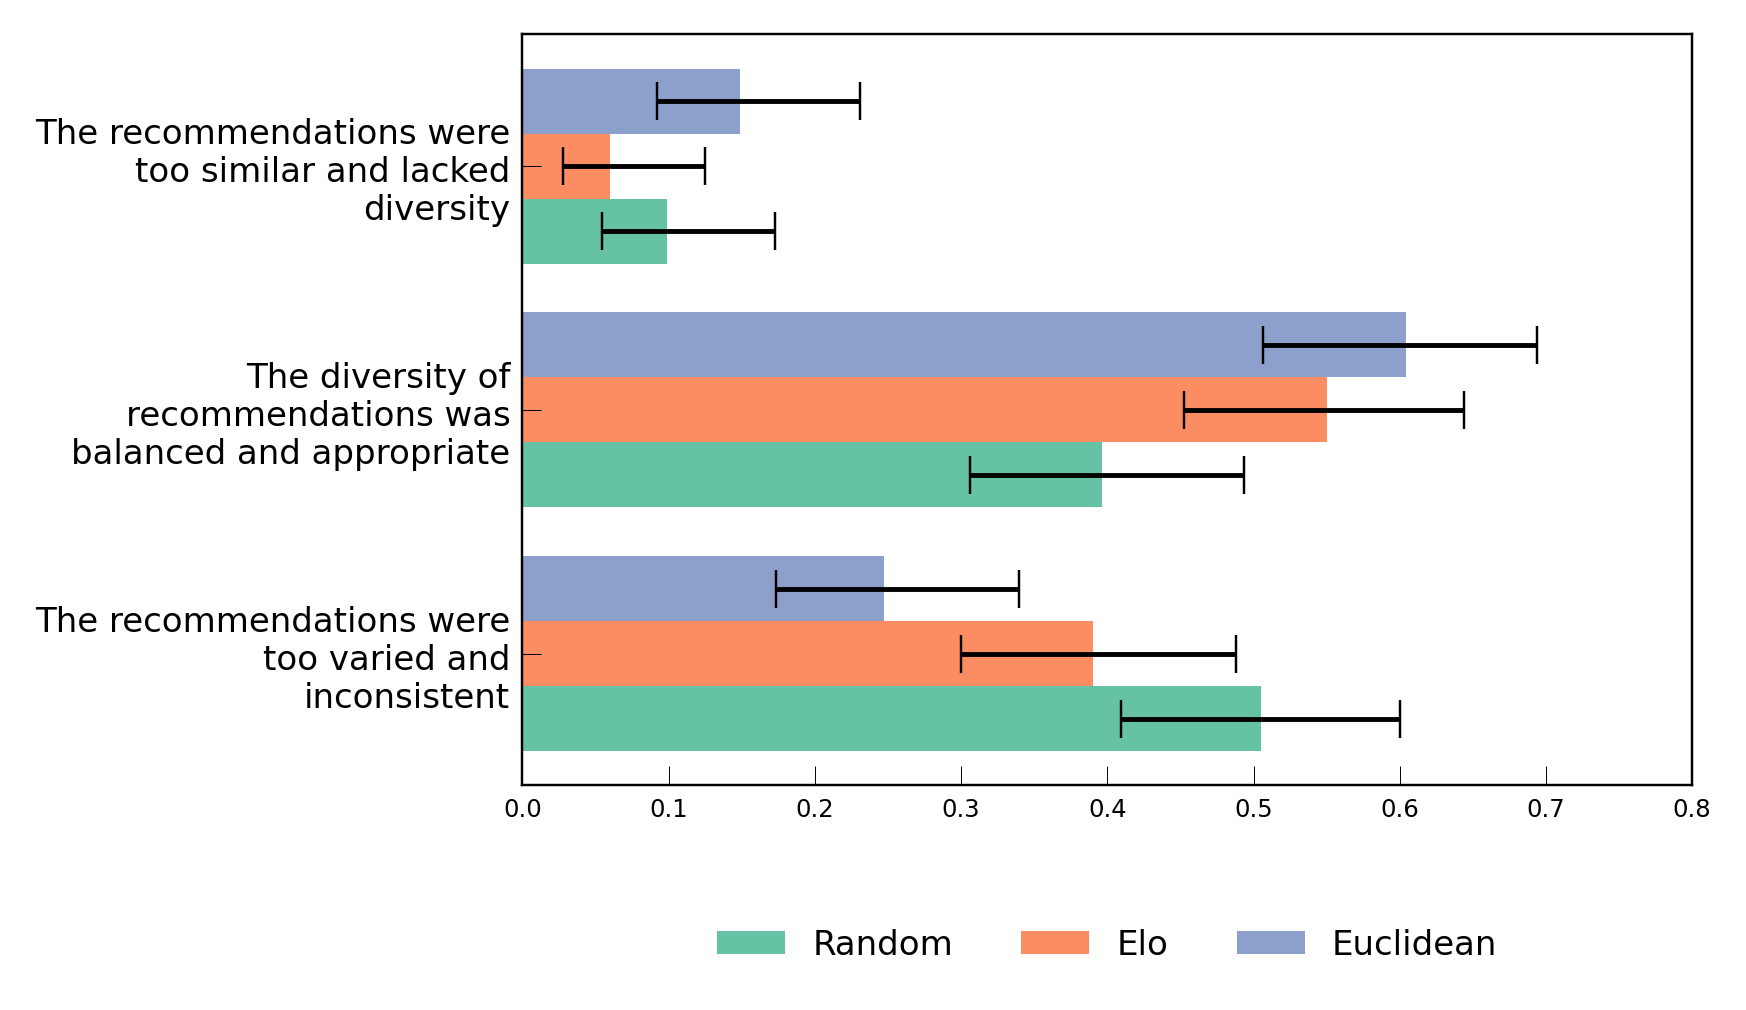

In [673]:
choice_column = 'recommendationDiversity'
choice_categories = [
    'The recommendations were too varied and inconsistent', 
    'The diversity of recommendations was balanced and appropriate', 
    'The recommendations were too similar and lacked diversity'
]
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=25)) for label in choice_categories]

rec_algorithms = merged_df['recAlgorithm'].unique()

# Calculate value counts normalized
grouped_counts = {
    algorithm: merged_df[merged_df['recAlgorithm'] == algorithm][choice_column].value_counts(normalize=True).reindex(choice_categories, fill_value=0)
    for algorithm in rec_algorithms
}

grouped_counts_df = pd.DataFrame(grouped_counts, index=choice_categories)

# Calculate confidence intervals
def wilson_score_interval(count, n, z=1.96):
    if n == 0:
        return 0, 0
    phat = count / n
    denominator = 1 + z**2 / n
    centre_adjusted_probability = phat + z**2 / (2*n)
    adjusted_standard_deviation = np.sqrt((phat*(1 - phat) + z**2 / (4*n)) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

ci_lower = pd.DataFrame(index=choice_categories, columns=rec_algorithms)
ci_upper = pd.DataFrame(index=choice_categories, columns=rec_algorithms)

for algorithm in rec_algorithms:
    counts = merged_df[merged_df['recAlgorithm'] == algorithm][choice_column].value_counts().reindex(choice_categories, fill_value=0)
    total = counts.sum()
    for category in choice_categories:
        lower, upper = wilson_score_interval(counts[category], total)
        ci_lower.loc[category, algorithm] = lower
        ci_upper.loc[category, algorithm] = upper

errors = [grouped_counts_df - ci_lower, ci_upper - grouped_counts_df]

# Plotting
fig, ax = plt.subplots(figsize=(5, 3), dpi=350)

n_categories = len(choice_categories)
n_algorithms = len(rec_algorithms)
bar_height = 0.8 / n_algorithms

bar_positions = range(n_categories)

for i, algorithm in enumerate(rec_algorithms):
    bar_offset = (i - (n_algorithms / 2)) * bar_height + bar_height / 2
    color = algorithm_colours.get(algorithm, '#000000')  # Default to black if algorithm is not found in the dictionary
    ax.barh(
        [pos + bar_offset for pos in bar_positions],
        grouped_counts_df[algorithm],
        height=bar_height,
        xerr=[errors[0][algorithm], errors[1][algorithm]],  # Adding error bars
        label=algorithm,
        color=color,  # Use the same color dictionary
        capsize=4
    )

ax.set_yticks(bar_positions)
ax.set_yticklabels(wrapped_labels, rotation=0, fontsize=7) 
ax.set_xlim(0, 0.8)
ax.grid(False)
ax.legend([label.capitalize() for label in rec_algorithms], bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(rec_algorithms))

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("visualisations/end_survey_algorithm_diversity.pdf", bbox_inches='tight')
plt.show()

### How did they perceive algorithm quality?

Survey Question:
- Regarding the quality of recommendations, do you think:

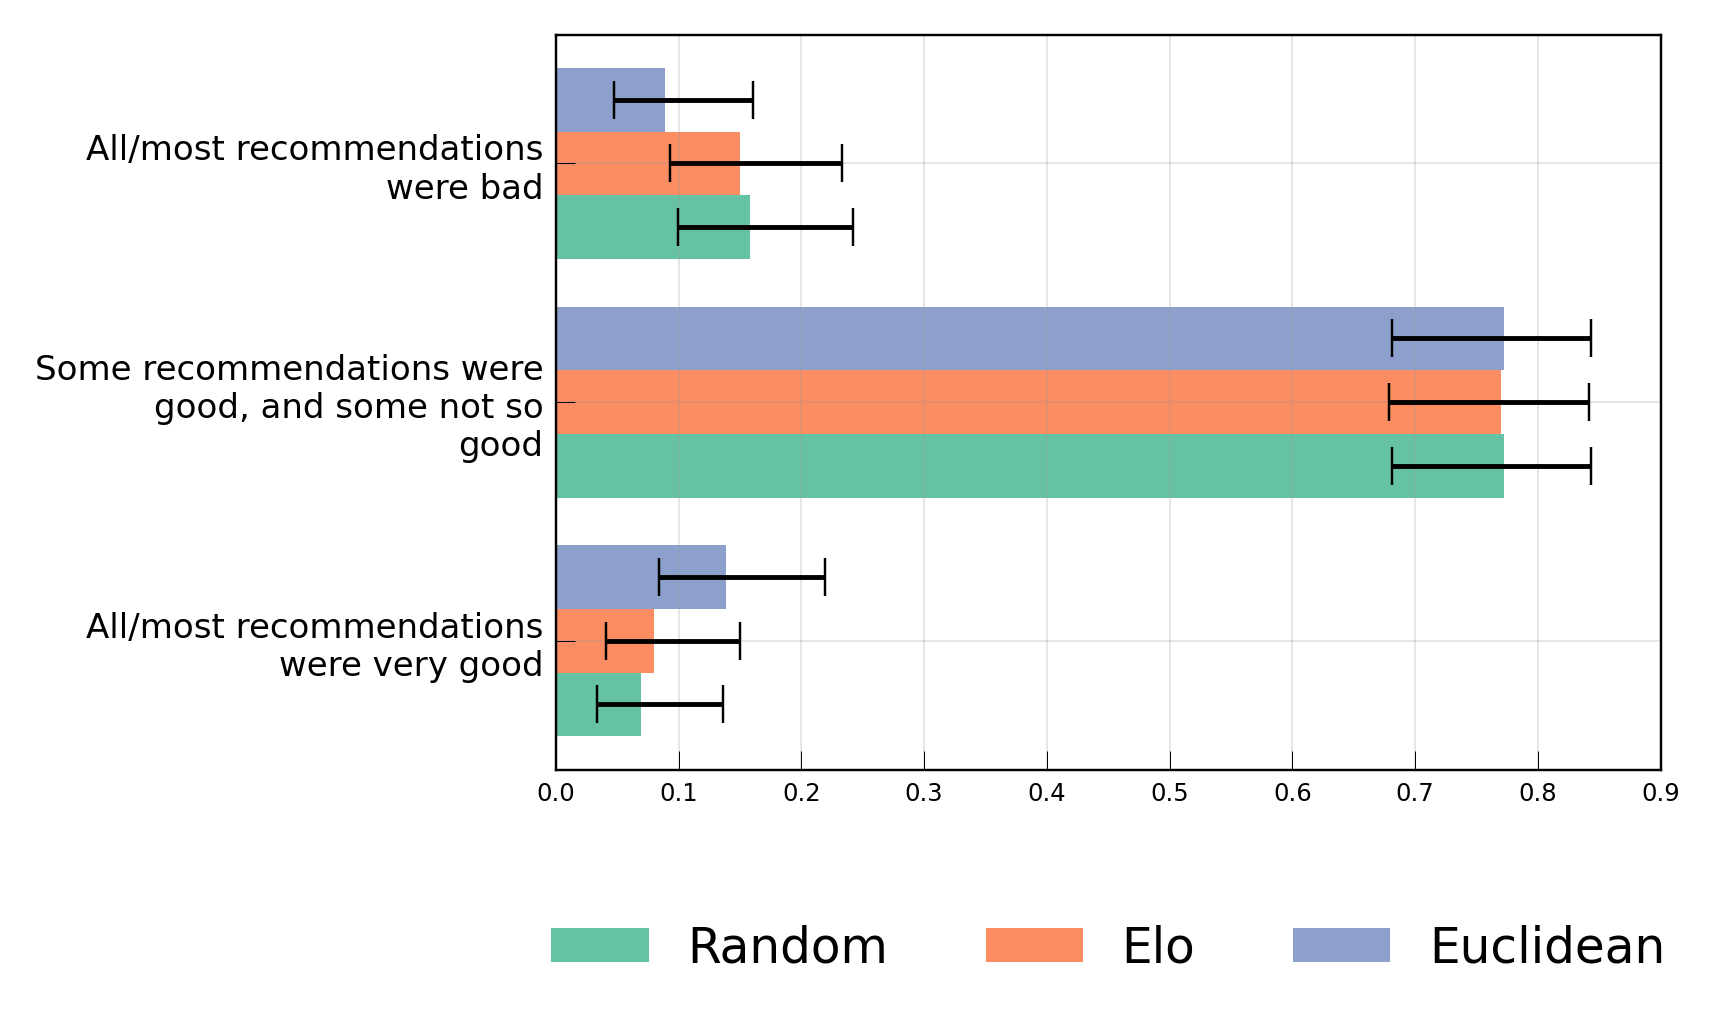

In [68]:
merged_df = endRecSystemSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')

choice_column = 'recommendationQuality'
choice_categories = [
    "All/most recommendations were very good", 
    "Some recommendations were good, and some not so good", 
    "All/most recommendations were bad"
]
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=25)) for label in choice_categories]

rec_algorithms = merged_df['recAlgorithm'].unique()

# Calculate value counts normalized
grouped_counts = {
    algorithm: merged_df[merged_df['recAlgorithm'] == algorithm][choice_column].value_counts(normalize=True).reindex(choice_categories, fill_value=0)
    for algorithm in rec_algorithms
}

grouped_counts_df = pd.DataFrame(grouped_counts, index=choice_categories)

# Calculate confidence intervals
def wilson_score_interval(count, n, z=1.96):
    if n == 0:
        return 0, 0
    phat = count / n
    denominator = 1 + z**2 / n
    centre_adjusted_probability = phat + z**2 / (2*n)
    adjusted_standard_deviation = np.sqrt((phat*(1 - phat) + z**2 / (4*n)) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

ci_lower = pd.DataFrame(index=choice_categories, columns=rec_algorithms)
ci_upper = pd.DataFrame(index=choice_categories, columns=rec_algorithms)

for algorithm in rec_algorithms:
    counts = merged_df[merged_df['recAlgorithm'] == algorithm][choice_column].value_counts().reindex(choice_categories, fill_value=0)
    total = counts.sum()
    for category in choice_categories:
        lower, upper = wilson_score_interval(counts[category], total)
        ci_lower.loc[category, algorithm] = lower
        ci_upper.loc[category, algorithm] = upper

errors = [grouped_counts_df - ci_lower, ci_upper - grouped_counts_df]

# Plotting
fig, ax = plt.subplots(figsize=(5, 3), dpi=350)

n_categories = len(choice_categories)
n_algorithms = len(rec_algorithms)
bar_height = 0.8 / n_algorithms

bar_positions = range(n_categories)

for i, algorithm in enumerate(rec_algorithms):
    bar_offset = (i - (n_algorithms / 2)) * bar_height + bar_height / 2
    color = algorithm_colours.get(algorithm, '#000000')
    ax.barh(
        [pos + bar_offset for pos in bar_positions],
        grouped_counts_df[algorithm],
        height=bar_height,
        xerr=[errors[0][algorithm], errors[1][algorithm]],  # Adding error bars
        label=algorithm,
        color=color, 
        capsize=4
    )

ax.set_yticks(bar_positions)
ax.set_yticklabels(wrapped_labels, rotation=0, fontsize=7)
ax.set_xlim(0, 0.9)
ax.legend([label.capitalize() for label in rec_algorithms], bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(rec_algorithms))

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("visualisations/end_survey_algorithm_quality.pdf", bbox_inches='tight')
plt.show()

### Which type of algorithm do they think they got?

Survey Question:
- Which of the following algorithms do you think was used to recommend profiles to you during the previous experiment?

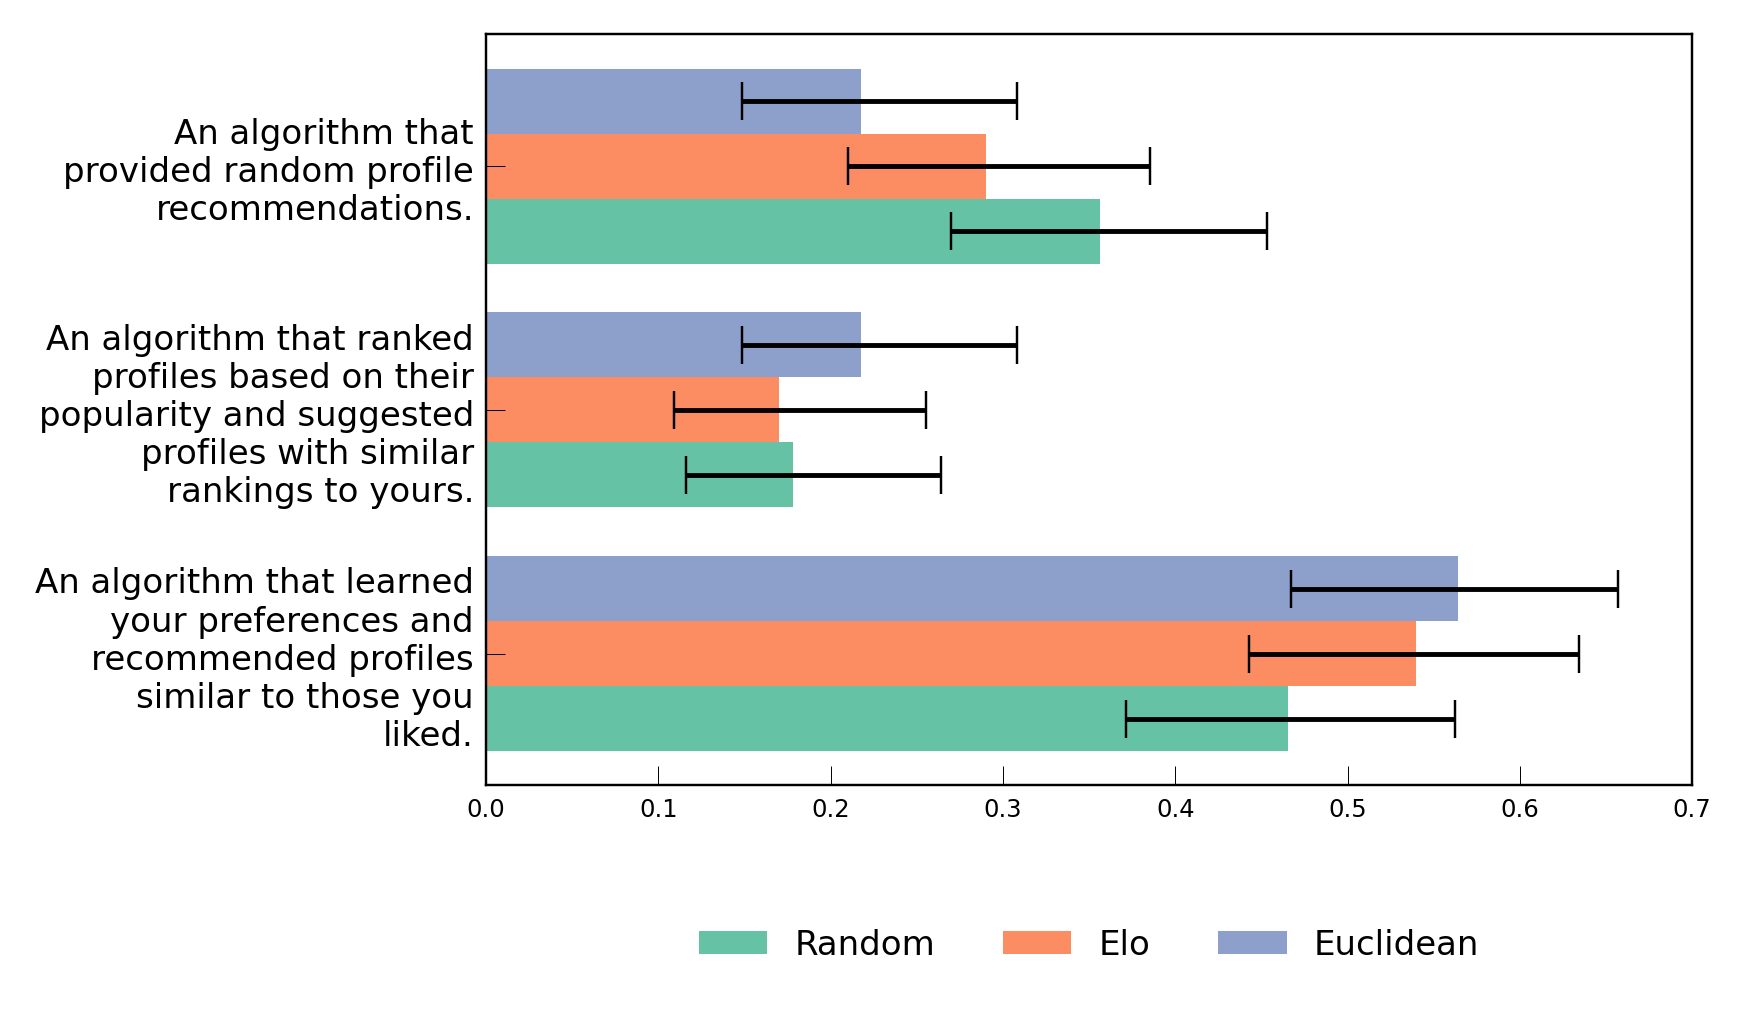

In [674]:
merged_df = endRecSystemSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')

choice_column = 'algorithmChoice'
choice_categories = [
    "An algorithm that learned your preferences and recommended profiles similar to those you liked.",
    "An algorithm that ranked profiles based on their popularity and suggested profiles with similar rankings to yours.",
    "An algorithm that provided random profile recommendations."
]
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=25)) for label in choice_categories]

rec_algorithms = merged_df['recAlgorithm'].unique()

# Calculate value counts normalized
grouped_counts = {
    algorithm: merged_df[merged_df['recAlgorithm'] == algorithm][choice_column].value_counts(normalize=True).reindex(choice_categories, fill_value=0)
    for algorithm in rec_algorithms
}

grouped_counts_df = pd.DataFrame(grouped_counts, index=choice_categories)

# Calculate confidence intervals
def wilson_score_interval(count, n, z=1.96):
    if n == 0:
        return 0, 0
    phat = count / n
    denominator = 1 + z**2 / n
    centre_adjusted_probability = phat + z**2 / (2*n)
    adjusted_standard_deviation = np.sqrt((phat*(1 - phat) + z**2 / (4*n)) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

ci_lower = pd.DataFrame(index=choice_categories, columns=rec_algorithms)
ci_upper = pd.DataFrame(index=choice_categories, columns=rec_algorithms)

for algorithm in rec_algorithms:
    counts = merged_df[merged_df['recAlgorithm'] == algorithm][choice_column].value_counts().reindex(choice_categories, fill_value=0)
    total = counts.sum()
    for category in choice_categories:
        lower, upper = wilson_score_interval(counts[category], total)
        ci_lower.loc[category, algorithm] = lower
        ci_upper.loc[category, algorithm] = upper

errors = [grouped_counts_df - ci_lower, ci_upper - grouped_counts_df]

# Plotting
fig, ax = plt.subplots(figsize=(5, 3), dpi=350)

n_categories = len(choice_categories)
n_algorithms = len(rec_algorithms)
bar_height = 0.8 / n_algorithms

bar_positions = range(n_categories)

for i, algorithm in enumerate(rec_algorithms):
    bar_offset = (i - (n_algorithms / 2)) * bar_height + bar_height / 2
    color = algorithm_colours.get(algorithm, '#000000')
    ax.barh(
        [pos + bar_offset for pos in bar_positions],
        grouped_counts_df[algorithm],
        height=bar_height,
        xerr=[errors[0][algorithm], errors[1][algorithm]],  # Adding error bars
        label=algorithm,
        color=color, 
        capsize=4
    )

ax.set_yticks(bar_positions)
ax.set_yticklabels(wrapped_labels, rotation=0, fontsize=7)
ax.set_xlim(0, 0.7)
ax.grid(False)
ax.legend([label.capitalize() for label in rec_algorithms], bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(rec_algorithms))

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("visualisations/end_survey_which_algorithm.pdf", bbox_inches='tight')
plt.show()

### What types of factors do they consider when dating? What factors do they think an algorithm should be allowed to consider?

Survey Questions:
- What factors would you consider when determining if someone is a good match on a dating app? Rank each:
- Dating apps use various aspects of user profiles to make recommendations. From an ethical standpoint, which of the following factors do you believe should be permissible for them to consider? Rank each:

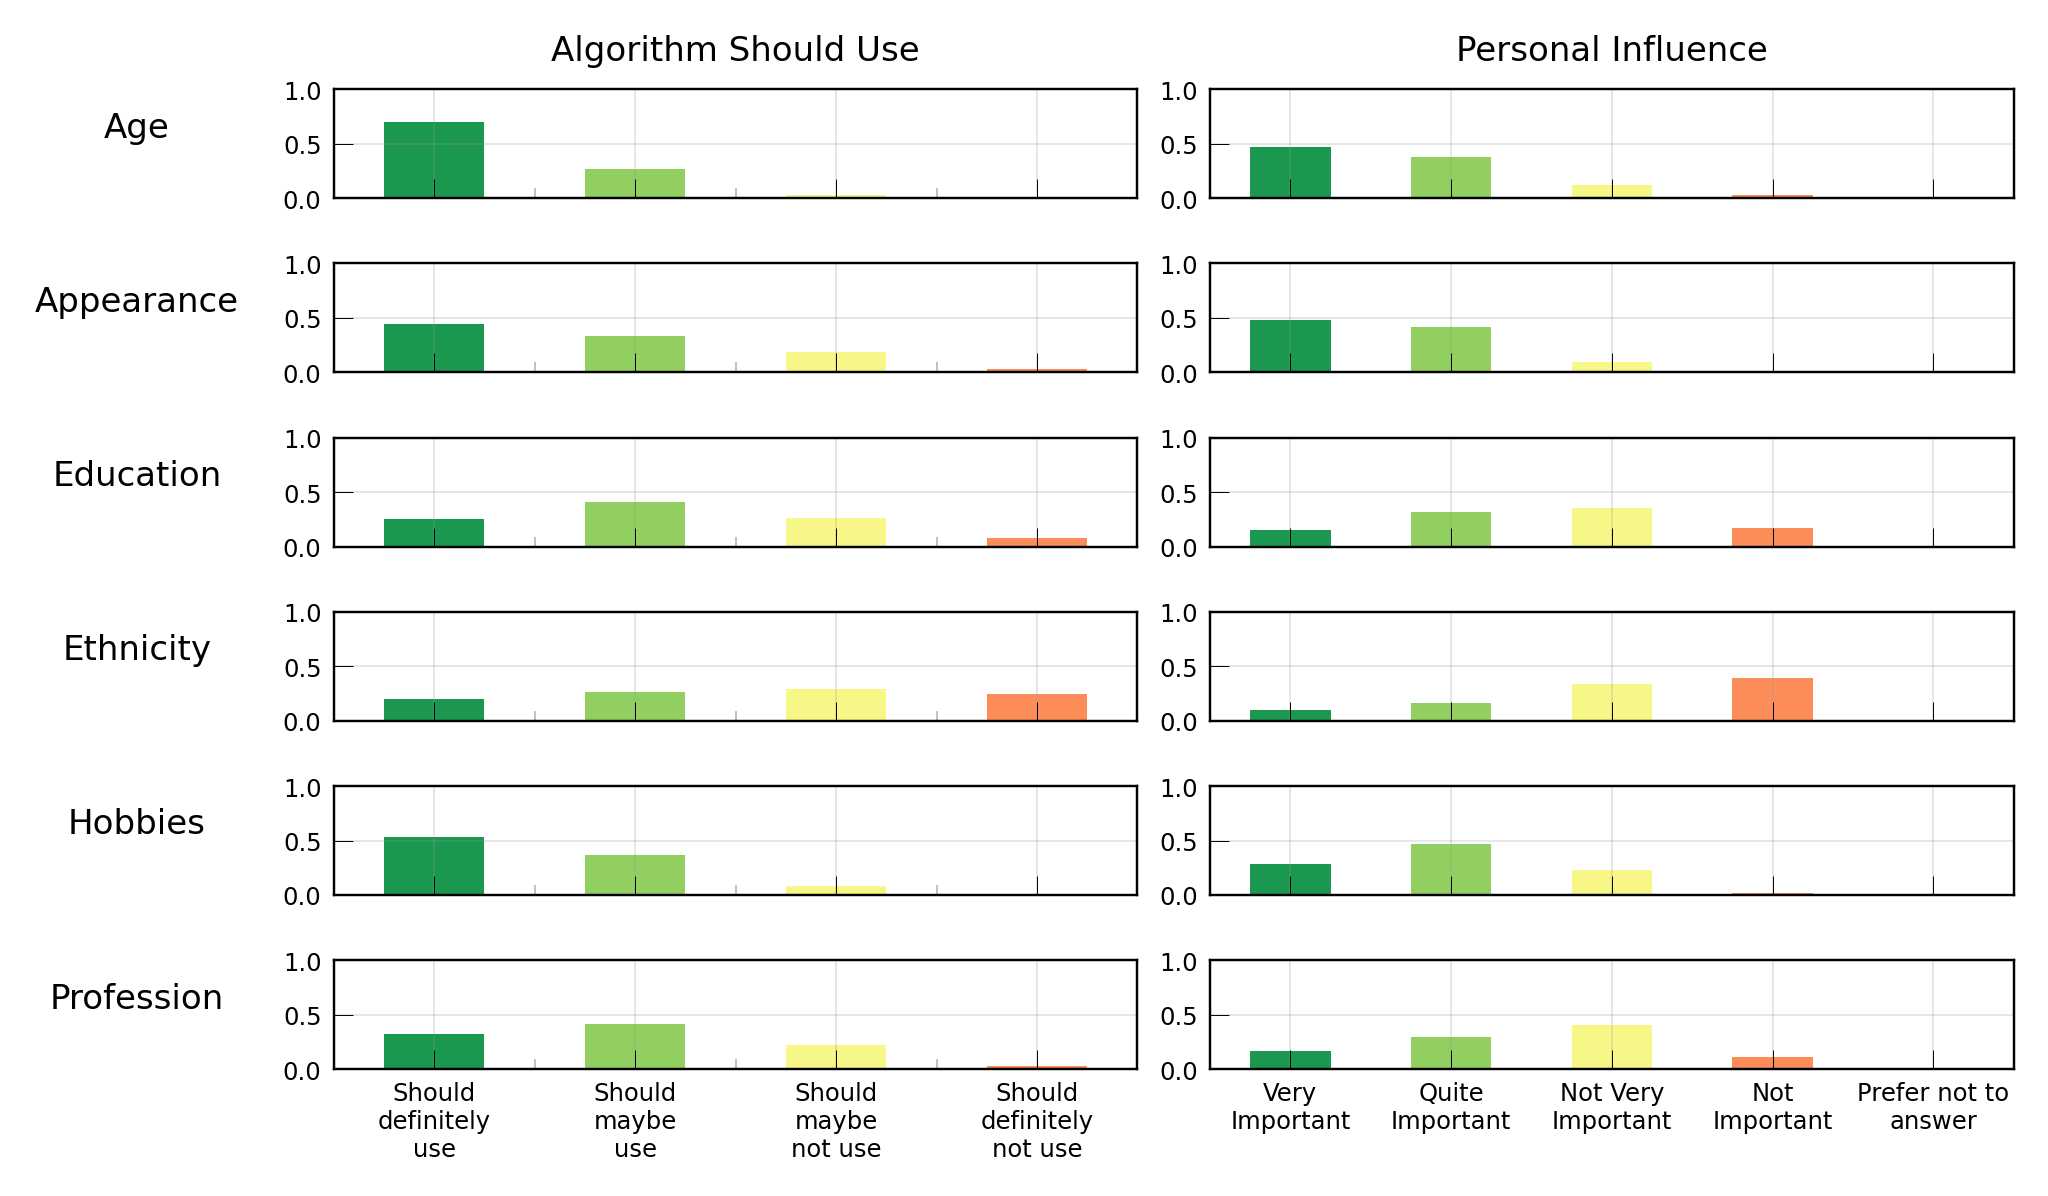

In [70]:
algorithm_columns = [col for col in endDatingAppSurvey_df.columns if 'AlgorithmShouldUse' in col]
influence_columns = [col for col in endDatingAppSurvey_df.columns if 'PersonalInfluence' in col]

algorithm_categories = ['Should definitely use', 'Should maybe use', 'Should maybe not use', 'Should definitely not use']
influence_categories = ['Very Important', 'Quite Important', 'Not Very Important', 'Not Important', 'Prefer not to answer']

algorithm_counts = {col: endDatingAppSurvey_df[col].value_counts(normalize=True).reindex(algorithm_categories, fill_value=0) for col in algorithm_columns}
influence_counts = {col: endDatingAppSurvey_df[col].value_counts(normalize=True).reindex(influence_categories, fill_value=0) for col in influence_columns}

colors_algorithm = ['#1a9850', '#91cf60', '#f7f788', '#fc8d59']
colors_influence = ['#1a9850', '#91cf60', '#f7f788', '#fc8d59', 'gray']

def split_labels(labels):
    split_points = {
        'Should definitely use': 'Should\ndefinitely\nuse',
        'Should maybe use': 'Should\nmaybe\nuse',
        'Should maybe not use': 'Should\nmaybe\nnot use',
        'Should definitely not use': 'Should\ndefinitely\nnot use',
        'Very Important': 'Very\nImportant',
        'Quite Important': 'Quite\nImportant',
        'Not Very Important': 'Not Very\nImportant',
        'Not Important': 'Not\nImportant',
        'Prefer not to answer': 'Prefer not to\nanswer'
    }
    return [split_points[label] for label in labels]
fig, axs = plt.subplots(len(algorithm_columns), 2, figsize=(8, 4), sharex='col', dpi=350)

for row, (col, counts) in enumerate(algorithm_counts.items()):
    counts.plot(kind='bar', ax=axs[row, 0], color=colors_algorithm, legend=False)
    axs[row, 0].set_ylabel(col.replace('AlgorithmShouldUse-', ''), rotation=0, labelpad=30)
    axs[row, 0].set_xlabel('')
    if row == len(algorithm_columns) - 1:
        axs[row, 0].set_xticklabels(split_labels(algorithm_categories), rotation=0)
    axs[row, 0].set_ylim(0, 1)

for row, (col, counts) in enumerate(influence_counts.items()):
    counts.plot(kind='bar', ax=axs[row, 1], color=colors_influence, legend=False)
    axs[row, 1].set_xlabel('')
    if row == len(influence_columns) - 1:
        axs[row, 1].set_xticklabels(split_labels(influence_categories), rotation=0)
    axs[row, 1].set_ylim(0, 1)

axs[0, 0].set_title('Algorithm Should Use')
axs[0, 1].set_title('Personal Influence')

plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.2)

plt.savefig("visualisations/end_survey_which_factors_real_dating_alls_should_use.pdf", bbox_inches='tight')
plt.show()



### What dating apps have they used before?

Survey Question:
- Which dating apps have you used before? (Check all that apply)

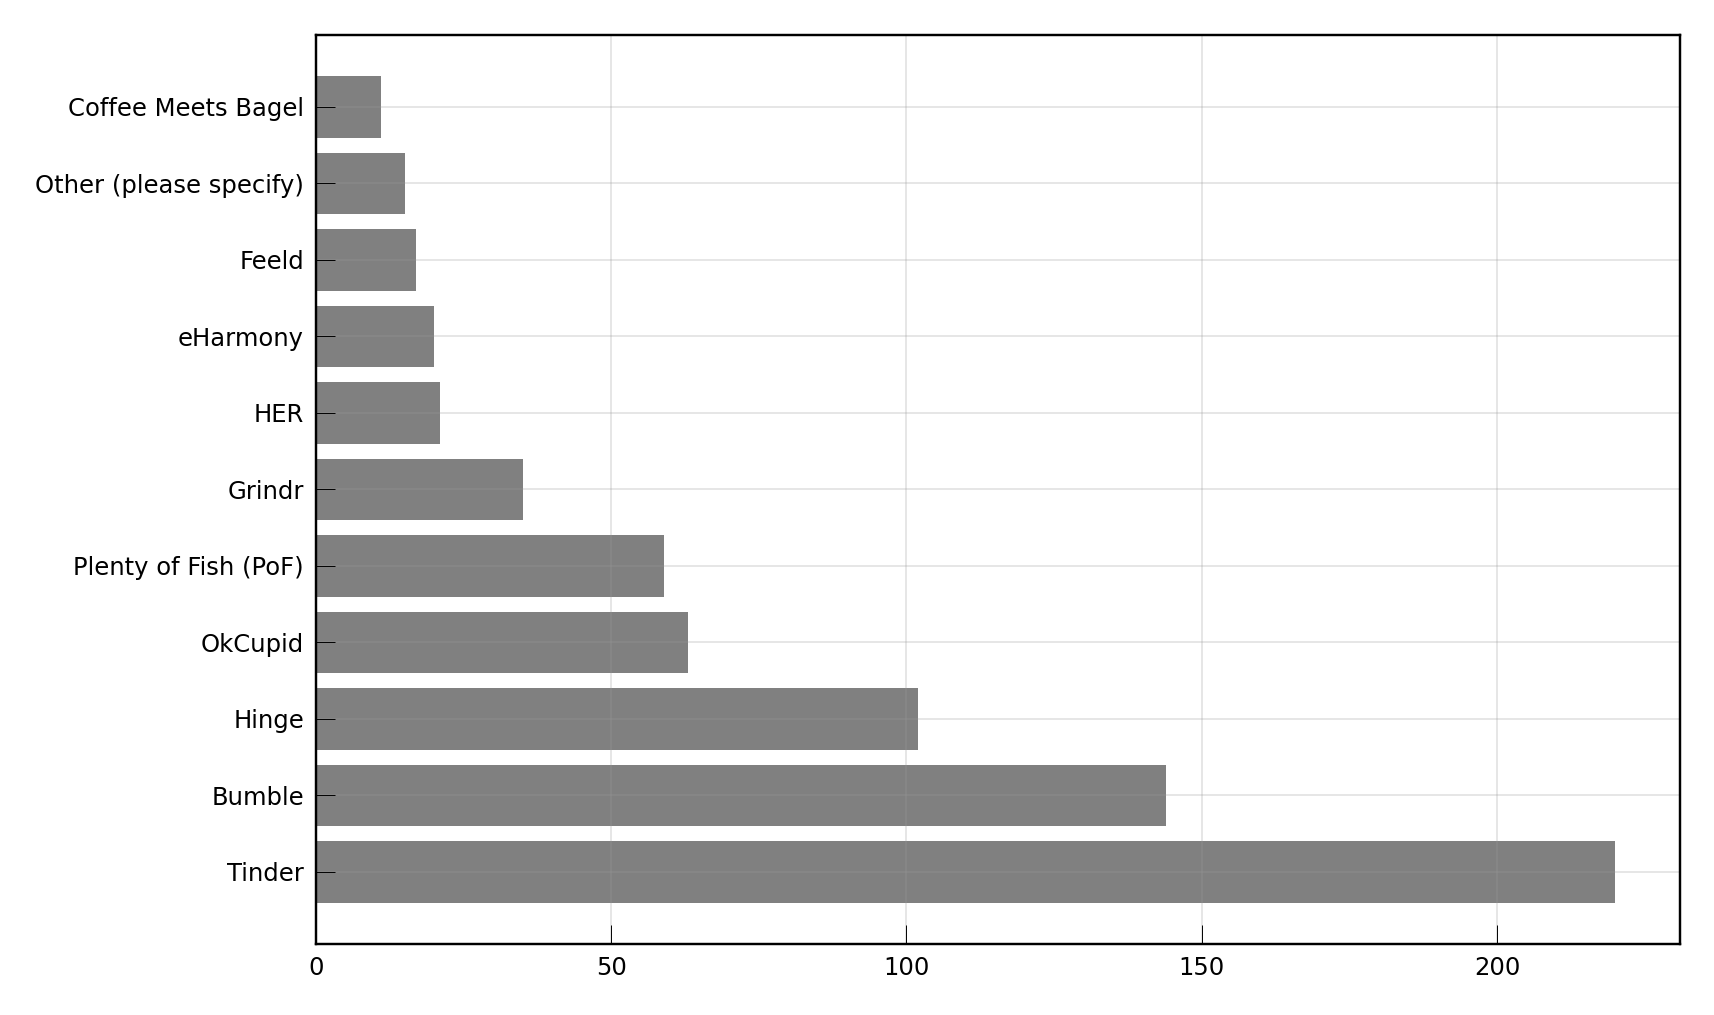

In [71]:
app_counts = {}
for apps in endDatingAppSurvey_df['datingAppsUsed']:
    app_list = ast.literal_eval(apps)
    for app in app_list:
        if app in app_counts:
            app_counts[app] += 1
        else:
            app_counts[app] = 1

app_counts_df = pd.DataFrame(list(app_counts.items()), columns=['App', 'Count'])

app_counts_df = app_counts_df.sort_values(by='Count', ascending=False)
plt.figure(figsize=(5, 3), dpi=350)
plt.barh(app_counts_df['App'], app_counts_df['Count'], color='grey')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.tight_layout()
plt.savefig("visualisations/end_survey_which_dating_apps_have_they_used.pdf", bbox_inches='tight')
plt.show()